In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import HuberRegressor

In [2]:
#constants
semilla = 40 #ramdom seed for data splitting

In [3]:
#FUNCTIONS

#header standarization
def header_data_std(dataframe): 
    cols = []
    for i in range (len(dataframe.columns)):
        cols.append(dataframe.columns[i].lower().replace(" ","_"))
    dataframe.columns = cols
    return(dataframe)

#file operation
def read_file(path, name):
    frame = pd.read_csv(path+name)
    return frame

#Index Fixing
def index_fix(dataframe):
    dataframe = dataframe.rename(columns={dataframe.columns[0]:'index'})
    return dataframe.set_index(dataframe.columns[0])
    
           
#datatype fixing
#check datatypes
def check_dtypes(dataframe):
    test =dataframe.dtypes
    x=0
    for i in range (len(dataframe.columns)):
        print(test[x]," ", dataframe.iloc[0][dataframe.columns[i]]," ",dataframe.columns[i])
        x+=1
    return()
    
#check datatypes
def check_dtypes2(dataframe):
    test =dataframe.dtypes
    x=0
    for i in range (len(dataframe.columns)):
        print("COL NAME: ",dataframe.columns[i])
        print("  TYPE: ",test[x])
        print("  % OF UNIQUE VALUES: ", (len(pd.unique(dataframe[dataframe.columns[i]]))/len(dataframe[dataframe.columns[i]]))*100 )
        print("  Values: ",pd.unique(dataframe[dataframe.columns[i]]))
        print("  SAMPLE: ",dataframe.iloc[0][dataframe.columns[i]])
        print()
        x+=1
    return()
#dealing with null values

#null values info
def null_find(dataframe):
    null_df = pd.DataFrame(round(dataframe.isna().sum()/len(dataframe),4)*100)
    null_df = null_df.reset_index()
    null_df.columns = ['header','percentage_nulls']
    return(null_df)
           
#null values reduction
def null_reduction(dataframe,porcentage):
    null_df=null_find(dataframe)
    columns_drop = null_df[null_df['percentage_nulls']>porcentage]['header']
    return dataframe.drop(columns_drop,axis=1)

# print non zero null columns

def print_nan(dataframe):
    null_df = null_find(dataframe)
    null_df = null_df[null_df['percentage_nulls']>0]
    print(null_df)
    return()

#train linear regresion model
def linear(dataframe,target,test,seed):
    Xf=numerical.drop([target], axis=1)
    yf=numerical[target]
    X_train, X_test, y_train, y_test = train_test_split(Xf, yf, test_size=test, random_state=seed)
    modelf = LinearRegression()
    modelf.fit( X_train, y_train )
    return(modelf)


In [84]:
#Variables
filename1 = './data/regression_data.xls'

In [85]:
#loading file to dataframe
data =  pd.read_excel(filename1)

In [86]:
#viewing dataframe sample data and size
data

id       date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520 2014-10-13         3       1.00         1180      5650   
1      6414100192 2014-12-09         3       2.25         2570      7242   
2      5631500400 2015-02-25         2       1.00          770     10000   
3      2487200875 2014-12-09         4       3.00         1960      5000   
4      1954400510 2015-02-18         3       2.00         1680      8080   
...           ...        ...       ...        ...          ...       ...   
21592   263000018 2014-05-21         3       2.50         1530      1131   
21593  6600060120 2015-02-23         4       2.50         2310      5813   
21594  1523300141 2014-06-23         2       0.75         1020      1350   
21595   291310100 2015-01-16         3       2.50         1600      2388   
21596  1523300157 2014-10-15         2       0.75         1020      1076   

       floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
0         1.0           0     0          3  ...        1180              0   
1         2.0           0     0          3  ...        2170            400   
2         1.0           0     0          3  ...         770              0   
3         1.0           0     0          5  ...        1050            910   
4         1.0           0     0          3  ...        1680              0   
...       ...         ...   ...        ...  ...         ...            ...   
21592     3.0           0     0          3  ...        1530              0   
21593     2.0           0     0          3  ...        2310              0   
21594     2.0           0     0          3  ...        1020              0   
21595     2.0           0     0          3  ...        1600              0   
21596     2.0           0     0          3  ...        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955             0    98178  47.5112 -122.257           1340   
1          1951          1991    98125  47.7210 -122.319           1690   
2          1933             0    98028  47.7379 -122.233           2720   
3          1965             0    98136  47.5208 -122.393           1360   
4          1987             0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21592      2009             0    98103  47.6993 -122.346           1530   
21593      2014             0    98146  47.5107 -122.362           1830   
21594      2009             0    98144  47.5944 -122.299           1020   
21595      2004             0    98027  47.5345 -122.069           1410   
21596      2008             0    98144  47.5941 -122.299           1020   

       sqft_lot15   price  
0            5650  221900  
1            7639  538000  
2            8062  180000  
3            5000  604000  
4            7503  510000  
...           ...     ...  
21592        1509  360000  
21593        7200  400000  
21594        2007  402101  
21595        1287  400000  
21596        1357  325000  

[21597 rows x 21 columns]

In [7]:
#checking data types for each column
check_dtypes(data)


int64   7129300520   id
datetime64[ns]   2014-10-13 00:00:00   date
int64   3   bedrooms
float64   1.0   bathrooms
int64   1180   sqft_living
int64   5650   sqft_lot
float64   1.0   floors
int64   0   waterfront
int64   0   view
int64   3   condition
int64   7   grade
int64   1180   sqft_above
int64   0   sqft_basement
int64   1955   yr_built
int64   0   yr_renovated
int64   98178   zipcode
float64   47.5112   lat
float64   -122.257   long
int64   1340   sqft_living15
int64   5650   sqft_lot15
int64   221900   price


()

In [8]:
#checking porcentage of unique values for each column
check_dtypes2(data)


COL NAME:  id
  TYPE:  int64
  % OF UNIQUE VALUES:  99.18044172801778
  Values:  [7129300520 6414100192 5631500400 ... 1523300141  291310100 1523300157]
  SAMPLE:  7129300520

COL NAME:  date
  TYPE:  datetime64[ns]
  % OF UNIQUE VALUES:  1.7224614529795803
  Values:  ['2014-10-13T00:00:00.000000000' '2014-12-09T00:00:00.000000000'
 '2015-02-25T00:00:00.000000000' '2015-02-18T00:00:00.000000000'
 '2014-05-12T00:00:00.000000000' '2014-06-27T00:00:00.000000000'
 '2015-01-15T00:00:00.000000000' '2015-04-15T00:00:00.000000000'
 '2015-03-12T00:00:00.000000000' '2015-04-03T00:00:00.000000000'
 '2014-05-27T00:00:00.000000000' '2014-05-28T00:00:00.000000000'
 '2014-10-07T00:00:00.000000000' '2015-01-24T00:00:00.000000000'
 '2014-07-31T00:00:00.000000000' '2014-05-29T00:00:00.000000000'
 '2014-12-05T00:00:00.000000000' '2015-04-24T00:00:00.000000000'
 '2014-05-14T00:00:00.000000000' '2014-08-26T00:00:00.000000000'
 '2014-07-03T00:00:00.000000000' '2014-05-16T00:00:00.000000000'
 '2014-11-20T00:

()

In [9]:
#checking null values
null_find(data)

header  percentage_nulls
0              id               0.0
1            date               0.0
2        bedrooms               0.0
3       bathrooms               0.0
4     sqft_living               0.0
5        sqft_lot               0.0
6          floors               0.0
7      waterfront               0.0
8            view               0.0
9       condition               0.0
10          grade               0.0
11     sqft_above               0.0
12  sqft_basement               0.0
13       yr_built               0.0
14   yr_renovated               0.0
15        zipcode               0.0
16            lat               0.0
17           long               0.0
18  sqft_living15               0.0
19     sqft_lot15               0.0
20          price               0.0

In [91]:
#Normalize (numerical).
def normaizer(dataframe):
    transformer = MinMaxScaler().fit(dataframe) ### THIS IS THE ONE FOR NORMALIZING
    x_minmax = transformer.transform(dataframe)
    return(pd.DataFrame(x_minmax, index=dataframe.index, columns=dataframe.columns))

#quick test linear regresion model for imported data
def linearTest(dataframe,target,test,seed):
    
    Xf=dataframe.drop([target], axis=1)
    yf=dataframe[target]

    Xf_num=normaizer(Xf.select_dtypes(include = np.number))
    #Xf_cat = pd.get_dummies(Xf.select_dtypes(include = 'object'), drop_first=True)
    
    
    #Xf=pd.concat([Xf_num, Xf_cat], axis=1) 
    Xf = Xf_num
    
    X_train, X_test, y_train, y_test = train_test_split(Xf, yf, test_size=test, random_state=seed)
    modelf = LinearRegression()
    modelf.fit( X_train, y_train )
    
    predictions = modelf.predict(X_test)
    
    MAE = mean_absolute_error(y_test,predictions)
    MSE = mean_squared_error(y_test,predictions)
    RMSE = np.sqrt(MSE)
    print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
    print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
    print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
    print("R2:",r2_score(y_test, modelf.predict(X_test)))
    sns.scatterplot(y = predictions, x = y_test)
    plt.show()
    return(modelf)

#general linear regresion model
def linear(dataframe,target,test,seed):
    
    Xf=dataframe.drop([target], axis=1)
    yf=dataframe[target]

    Xf_num=normaizer(Xf.select_dtypes(include = np.number))
    Xf_cat = pd.get_dummies(Xf.select_dtypes(include = 'object'), drop_first=True)
    
    Xf=pd.concat([Xf_num, Xf_cat], axis=1) 

    
    X_train, X_test, y_train, y_test = train_test_split(Xf, yf, test_size=test, random_state=seed)
    modelf = LinearRegression()
    modelf.fit( X_train, y_train )
    print("R2:",r2_score(y_test, modelf.predict(X_test)))
    
    predictions = modelf.predict(X_test)
    sns.scatterplot(y = predictions, x = y_test)
    plt.show()
    
    MAE = mean_absolute_error(y_test,predictions)
    MSE = mean_squared_error(y_test,predictions)
    RMSE = np.sqrt(MSE)
    print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
    print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
    print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
    print("R2:",r2_score(y_test, modelf.predict(X_test)))

    return(r2_score(y_test, modelf.predict(X_test)))


#general MLP regresion model
def neuro(dataframe,target,test,seed):
    
    Xf=dataframe.drop([target], axis=1)
    yf=dataframe[target]

    Xf_num=normaizer(Xf.select_dtypes(include = np.number))
    Xf_cat = pd.get_dummies(Xf.select_dtypes(include = 'object'), drop_first=True)
    
    Xf=pd.concat([Xf_num, Xf_cat], axis=1) 

    
    X_train, X_test, y_train, y_test = train_test_split(Xf, yf, test_size=test, random_state=seed)

    model = MLPRegressor(
        hidden_layer_sizes=(6,2),  activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
        learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=10000, shuffle=True,
        random_state=1, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
        early_stopping=False,beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.fit(X_train, y_train)    
    

    predictions = model.predict(X_test)
    MAE = mean_absolute_error(y_test,predictions)
    MSE = mean_squared_error(y_test,predictions)
    RMSE = np.sqrt(MSE)

    print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
    print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
    print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
    print("R2:",r2_score(y_test, model.predict(X_test)))
    
    sns.scatterplot(y = predictions, x = y_test)
    plt.show()
    return(model)



#general MLP regresion model
def Huber(dataframe,target,test,seed):
    
    Xf=dataframe.drop([target], axis=1)
    yf=dataframe[target]

    Xf_num=normaizer(Xf.select_dtypes(include = np.number))
    Xf_cat = pd.get_dummies(Xf.select_dtypes(include = 'object'), drop_first=True)
    
    Xf=pd.concat([Xf_num, Xf_cat], axis=1) 

    
    X_train, X_test, y_train, y_test = train_test_split(Xf, yf, test_size=test, random_state=seed)

    model = HuberRegressor(max_iter=10000)
    model.fit(X_train, y_train)    
    

    predictions = model.predict(X_test)
    MAE = mean_absolute_error(y_test,predictions)
    MSE = mean_squared_error(y_test,predictions)
    RMSE = np.sqrt(MSE)

    print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
    print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
    print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
    print("R2:",r2_score(y_test, model.predict(X_test)))
    
    sns.scatterplot(y = predictions, x = y_test)
    plt.show()
    return(model)


#general MLP regresion model
def KNN(dataframe,target,test,seed):
    
    Xf=dataframe.drop([target], axis=1)
    yf=dataframe[target]

    Xf_num=normaizer(Xf.select_dtypes(include = np.number))
    Xf_cat = pd.get_dummies(Xf.select_dtypes(include = 'object'), drop_first=True)
    
    Xf=pd.concat([Xf_num, Xf_cat], axis=1) 

    
    X_train, X_test, y_train, y_test = train_test_split(Xf, yf, test_size=test, random_state=seed)

    model = KNeighborsRegressor(n_neighbors=3) 
    model.fit(X_train, y_train)    
    

    predictions = model.predict(X_test)
    MAE = mean_absolute_error(y_test,predictions)
    MSE = mean_squared_error(y_test,predictions)
    RMSE = np.sqrt(MSE)

    print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
    print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
    print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
    print("R2:",r2_score(y_test, model.predict(X_test)))
    
    sns.scatterplot(y = predictions, x = y_test)
    plt.show()
    return(model)

The mean absolute error of the model in the test set is: 125749.52
The mean squared error of the model in the test set is: 39350992633.39
The root mean squared error of the model in the test set is: 198370.85
R2: 0.7068628847266542


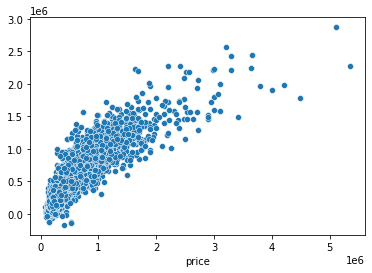

In [92]:
#Preliminar generic model test without data cleaning or feature extraction for use as start refference point
modelx =  linearTest(data.drop(['id'], axis=1),'price',0.3,semilla)

In [12]:
#dropping id 
data = data.drop(['id'], axis =1)

In [13]:
#Dropping lat and long because geographic position is a unique atribute of each property and is not usefull for the model
data =  data.drop(['long','lat'], axis=1)

In [14]:
#checking progress after operation
modelx =  linearTest(data,'price',0.3,semilla)

R2: 0.6590361534474751


Creating a new column age based on 'date' and 'year_built'


In [15]:
#changing yr_built from int to datetype
data.yr_built = pd.to_datetime(data.yr_built, format='%Y')


In [16]:
#checking changes
check_dtypes(data)


datetime64[ns]   2014-10-13 00:00:00   date
int64   3   bedrooms
float64   1.0   bathrooms
int64   1180   sqft_living
int64   5650   sqft_lot
float64   1.0   floors
int64   0   waterfront
int64   0   view
int64   3   condition
int64   7   grade
int64   1180   sqft_above
int64   0   sqft_basement
datetime64[ns]   1955-01-01 00:00:00   yr_built
int64   0   yr_renovated
int64   98178   zipcode
int64   1340   sqft_living15
int64   5650   sqft_lot15
int64   221900   price


()

In [17]:
#creating the new column 'age'
data['age'] = data.date-data.yr_built

In [18]:
#transforming 'age' to integer
data['age'] = data['age'].dt.days.astype('int')


In [19]:
check_dtypes(data)


datetime64[ns]   2014-10-13 00:00:00   date
int64   3   bedrooms
float64   1.0   bathrooms
int64   1180   sqft_living
int64   5650   sqft_lot
float64   1.0   floors
int64   0   waterfront
int64   0   view
int64   3   condition
int64   7   grade
int64   1180   sqft_above
int64   0   sqft_basement
datetime64[ns]   1955-01-01 00:00:00   yr_built
int64   0   yr_renovated
int64   98178   zipcode
int64   1340   sqft_living15
int64   5650   sqft_lot15
int64   221900   price
int32   21835   age


()

In [20]:
#droppin date
data =  data.drop(['date','yr_built'], axis=1)

In [21]:
#checking progress after operation
modelx =  linearTest(data,'price',0.3,semilla)

R2: 0.659199770531854


Changing categorical columns to object type

In [22]:
data = data.astype({'bedrooms': object,'bathrooms': object,'waterfront': object,'view': object,'condition': object,'grade': object,'zipcode': object})


In [23]:
check_dtypes(data)


object   3   bedrooms
object   1.0   bathrooms
int64   1180   sqft_living
int64   5650   sqft_lot
float64   1.0   floors
object   0   waterfront
object   0   view
object   3   condition
object   7   grade
int64   1180   sqft_above
int64   0   sqft_basement
int64   0   yr_renovated
object   98178   zipcode
int64   1340   sqft_living15
int64   5650   sqft_lot15
int64   221900   price
int32   21835   age


()

R2: 0.8425967888023023


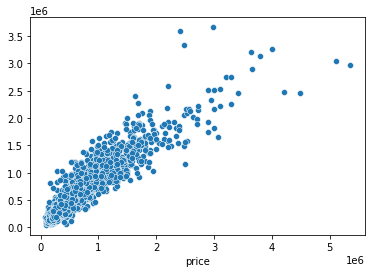

The mean absolute error of the model in the test set is: 86814.50
The mean squared error of the model in the test set is: 21129950052.68
The root mean squared error of the model in the test set is: 145361.45
R2: 0.8425967888023023


In [24]:
#checking progress after operation
modelx =  linear(data,'price',0.3,semilla)

Creating new boolean column for renovated properties

In [25]:
#function for testing renovation status
def  renovated_propertie(row):
    return (row.yr_renovated != 0 or row.sqft_living != row.sqft_living15 or row.sqft_lot != row.sqft_lot15)
    

In [26]:
#aplying function
data['renovated'] = data.apply(lambda x: renovated_propertie(x),axis = 1)

#Exploring the data

In [27]:
categoricals = data.select_dtypes(object)
numerical = data.select_dtypes(include = np.number)

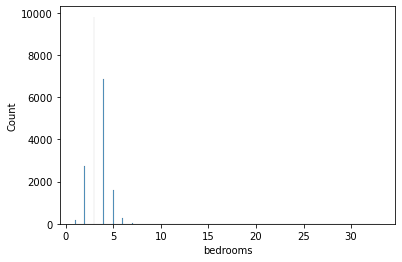

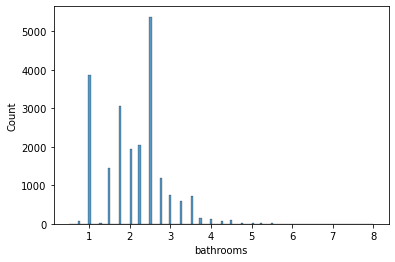

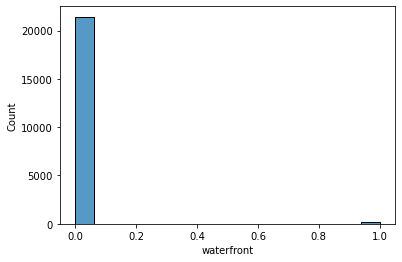

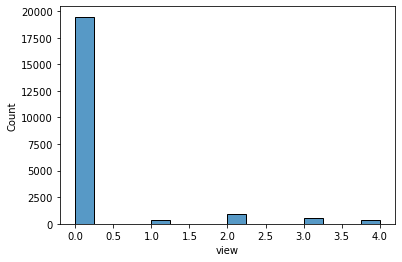

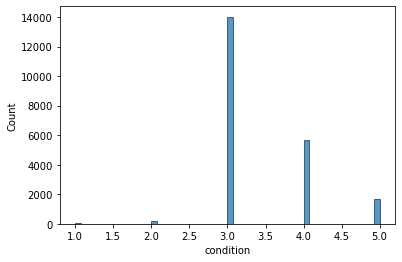

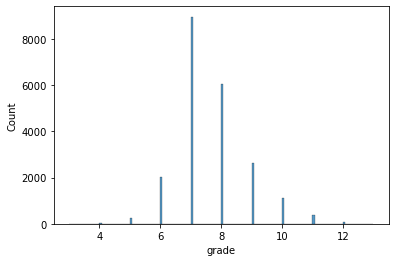

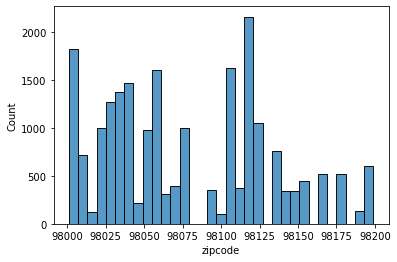

<Figure size 432x288 with 0 Axes>

In [28]:
for i in categoricals.columns:
    sns.histplot(categoricals[i])
    plt.figure(i)

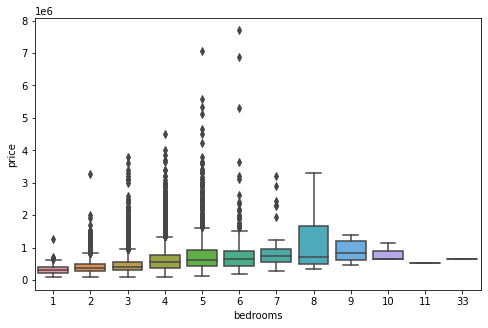

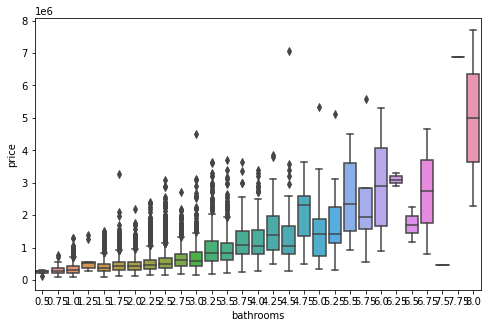

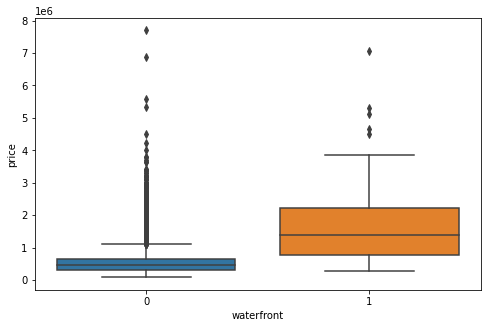

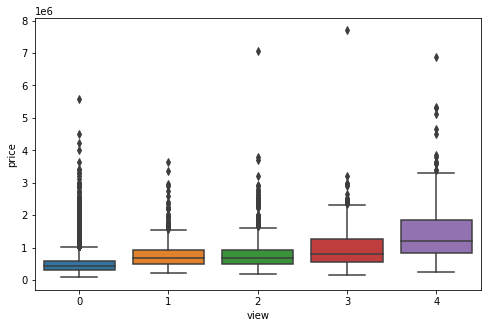

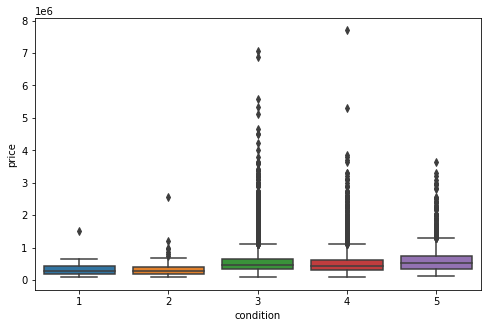

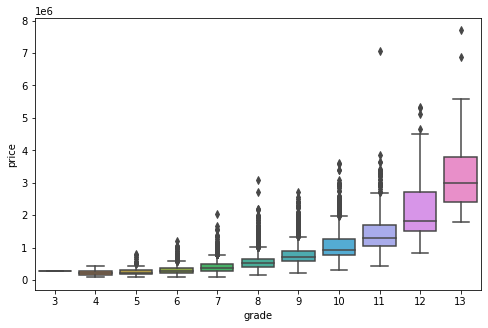

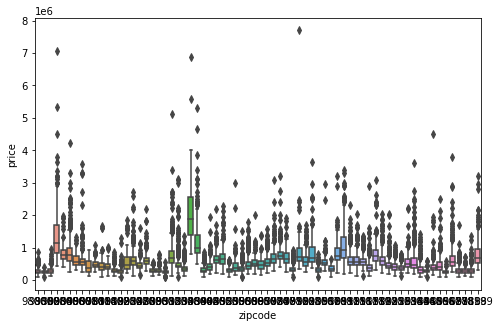

In [29]:
for col in categoricals:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=categoricals[col], y=data['price'])
    plt.show()

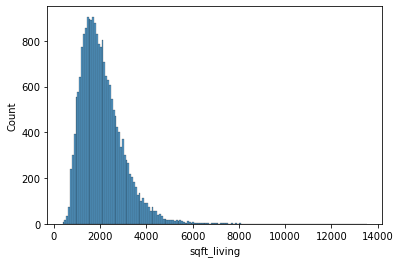

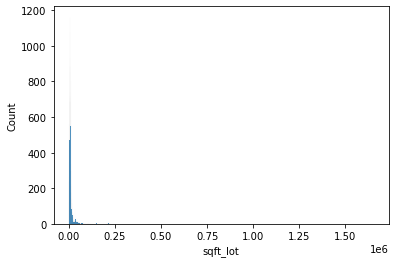

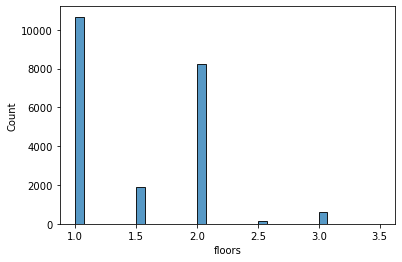

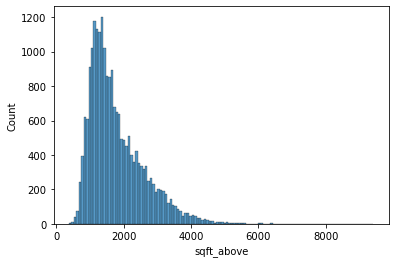

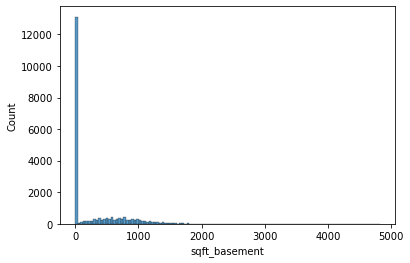

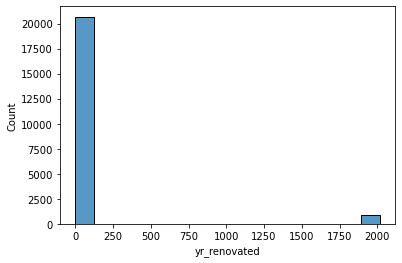

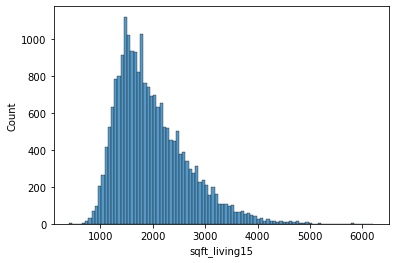

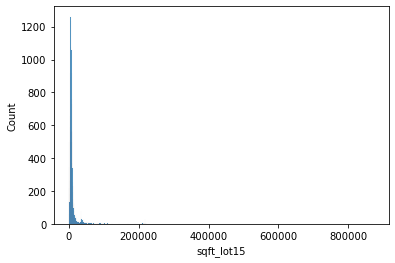

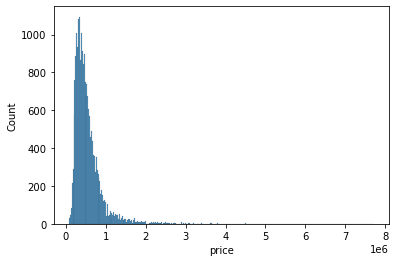

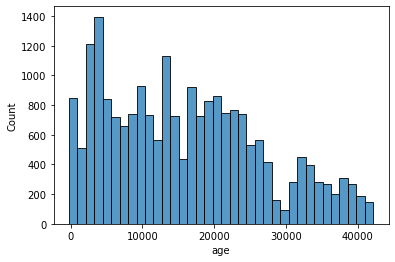

In [30]:
for head in numerical.columns:
    sns.histplot(numerical[head])
    plt.show()

In [31]:
data

bedrooms bathrooms  sqft_living  sqft_lot  floors waterfront view  \
0            3       1.0         1180      5650     1.0          0    0   
1            3      2.25         2570      7242     2.0          0    0   
2            2       1.0          770     10000     1.0          0    0   
3            4       3.0         1960      5000     1.0          0    0   
4            3       2.0         1680      8080     1.0          0    0   
...        ...       ...          ...       ...     ...        ...  ...   
21592        3       2.5         1530      1131     3.0          0    0   
21593        4       2.5         2310      5813     2.0          0    0   
21594        2      0.75         1020      1350     2.0          0    0   
21595        3       2.5         1600      2388     2.0          0    0   
21596        2      0.75         1020      1076     2.0          0    0   

      condition grade  sqft_above  sqft_basement  yr_renovated zipcode  \
0             3     7        1180              0             0   98178   
1             3     7        2170            400          1991   98125   
2             3     6         770              0             0   98028   
3             5     7        1050            910             0   98136   
4             3     8        1680              0             0   98074   
...         ...   ...         ...            ...           ...     ...   
21592         3     8        1530              0             0   98103   
21593         3     8        2310              0             0   98146   
21594         3     7        1020              0             0   98144   
21595         3     8        1600              0             0   98027   
21596         3     7        1020              0             0   98144   

       sqft_living15  sqft_lot15   price    age  renovated  
0               1340        5650  221900  21835       True  
1               1690        7639  538000  23353       True  
2               2720        8062  180000  30005       True  
3               1360        5000  604000  18239       True  
4               1800        7503  510000  10275       True  
...              ...         ...     ...    ...        ...  
21592           1530        1509  360000   1966       True  
21593           1830        7200  400000    418       True  
21594           1020        2007  402101   1999       True  
21595           1410        1287  400000   4033       True  
21596           1020        1357  325000   2479       True  

[21597 rows x 18 columns]

In [32]:
check_dtypes2(data)


COL NAME:  bedrooms
  TYPE:  object
  % OF UNIQUE VALUES:  0.055563272676760665
  Values:  [3 2 4 5 1 6 7 8 9 11 10 33]
  SAMPLE:  3

COL NAME:  bathrooms
  TYPE:  object
  % OF UNIQUE VALUES:  0.13427790896883826
  Values:  [1.0 2.25 3.0 2.0 4.5 1.5 2.5 1.75 2.75 3.25 4.0 3.5 0.75 4.75 5.0 4.25
 3.75 1.25 5.25 6.0 0.5 5.5 6.75 5.75 8.0 7.5 7.75 6.25 6.5]
  SAMPLE:  1.0

COL NAME:  sqft_living
  TYPE:  int64
  % OF UNIQUE VALUES:  4.787701995647543
  Values:  [1180 2570  770 ... 3087 3118 1425]
  SAMPLE:  1180

COL NAME:  sqft_lot
  TYPE:  int64
  % OF UNIQUE VALUES:  45.26554614066768
  Values:  [ 5650  7242 10000 ...  5813  2388  1076]
  SAMPLE:  5650

COL NAME:  floors
  TYPE:  float64
  % OF UNIQUE VALUES:  0.027781636338380333
  Values:  [1.  2.  1.5 3.  2.5 3.5]
  SAMPLE:  1.0

COL NAME:  waterfront
  TYPE:  object
  % OF UNIQUE VALUES:  0.009260545446126776
  Values:  [0 1]
  SAMPLE:  0

COL NAME:  view
  TYPE:  object
  % OF UNIQUE VALUES:  0.02315136361531694
  Values:  [0 3 4

()

In [33]:
#exploring non renovated data
data[data['renovated'] == False]

bedrooms bathrooms  sqft_living  sqft_lot  floors waterfront view  \
52           3      1.75         1410      4080     1.0          0    0   
54           5      2.25         2730      6000     1.5          0    0   
97           4       1.5         1160      6400     1.0          0    0   
141          5       2.5         2820      9375     1.0          0    0   
142          3       1.0         1610      8579     1.0          0    0   
...        ...       ...          ...       ...     ...        ...  ...   
21419        5      2.75         2670      3800     2.0          0    0   
21424        3       1.5         1270      1413     3.0          0    0   
21464        2       2.5         1460      1296     2.0          0    0   
21491        3       2.5         1350       886     3.0          0    0   
21589        4       2.5         2520      6023     2.0          0    0   

      condition grade  sqft_above  sqft_basement  yr_renovated zipcode  \
52            4     7        1000            410             0   98117   
54            3     8        2130            600             0   98105   
97            4     7        1160              0             0   98023   
141           4     8        1550           1270             0   98006   
142           4     7        1010            600             0   98058   
...         ...   ...         ...            ...           ...     ...   
21419         3     8        2670              0             0   98059   
21424         3     8        1270              0             0   98115   
21464         3     8        1160            300             0   98144   
21491         3     8        1270             80             0   98136   
21589         3     9        2520              0             0   98056   

       sqft_living15  sqft_lot15   price    age  renovated  
52              1410        4080  600000  23740      False  
54              2730        6000  920000  32203      False  
97              1160        6400  199000  14499      False  
141             2820        9375  527700  16990      False  
142             1610        8579  205000  19485      False  
...              ...         ...     ...    ...        ...  
21419           2670        3800  494995    153      False  
21424           1270        1413  440000   2746      False  
21464           1460        1296  449000   2446      False  
21491           1350         886  377500   3141      False  
21589           2520        6023  610685    286      False  

[505 rows x 18 columns]

In [34]:
#dropping columns after new column is created
data = data.drop(['sqft_living','sqft_lot','yr_renovated'], axis=1)

In [35]:
data


bedrooms bathrooms  floors waterfront view condition grade  sqft_above  \
0            3       1.0     1.0          0    0         3     7        1180   
1            3      2.25     2.0          0    0         3     7        2170   
2            2       1.0     1.0          0    0         3     6         770   
3            4       3.0     1.0          0    0         5     7        1050   
4            3       2.0     1.0          0    0         3     8        1680   
...        ...       ...     ...        ...  ...       ...   ...         ...   
21592        3       2.5     3.0          0    0         3     8        1530   
21593        4       2.5     2.0          0    0         3     8        2310   
21594        2      0.75     2.0          0    0         3     7        1020   
21595        3       2.5     2.0          0    0         3     8        1600   
21596        2      0.75     2.0          0    0         3     7        1020   

       sqft_basement zipcode  sqft_living15  sqft_lot15   price    age  \
0                  0   98178           1340        5650  221900  21835   
1                400   98125           1690        7639  538000  23353   
2                  0   98028           2720        8062  180000  30005   
3                910   98136           1360        5000  604000  18239   
4                  0   98074           1800        7503  510000  10275   
...              ...     ...            ...         ...     ...    ...   
21592              0   98103           1530        1509  360000   1966   
21593              0   98146           1830        7200  400000    418   
21594              0   98144           1020        2007  402101   1999   
21595              0   98027           1410        1287  400000   4033   
21596              0   98144           1020        1357  325000   2479   

       renovated  
0           True  
1           True  
2           True  
3           True  
4           True  
...          ...  
21592       True  
21593       True  
21594       True  
21595       True  
21596       True  

[21597 rows x 15 columns]

R2: 0.8423003657749386


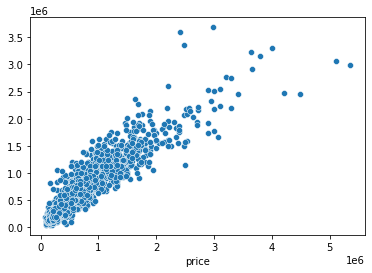

The mean absolute error of the model in the test set is: 86995.21
The mean squared error of the model in the test set is: 21169742149.14
The root mean squared error of the model in the test set is: 145498.25
R2: 0.8423003657749386


In [36]:
#testing progress
modelx =  linear(data,'price',0.3,semilla)

R2: 0.8423003657749386


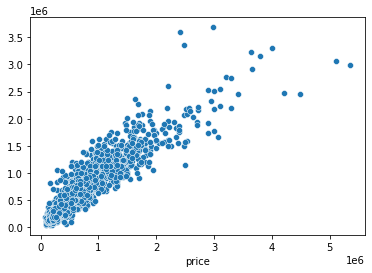

The mean absolute error of the model in the test set is: 86995.21
The mean squared error of the model in the test set is: 21169742149.14
The root mean squared error of the model in the test set is: 145498.25
R2: 0.8423003657749386


In [37]:
modelx =  linear(data.drop(['renovated'], axis=1),'price',0.3,semilla)

#the renovated column is very squed and does not affect the model

In [38]:
#dropping the column
data = data.drop(['renovated'], axis=1)

98178
R2: 0.7682853863874544


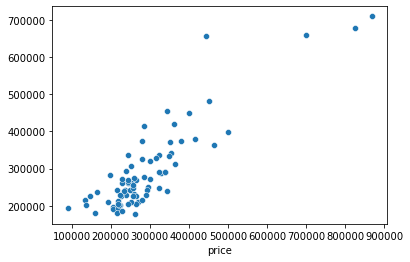

The mean absolute error of the model in the test set is: 45626.79
The mean squared error of the model in the test set is: 3668525763.46
The root mean squared error of the model in the test set is: 60568.36
R2: 0.7682853863874544
98125
R2: 0.8164740701302045


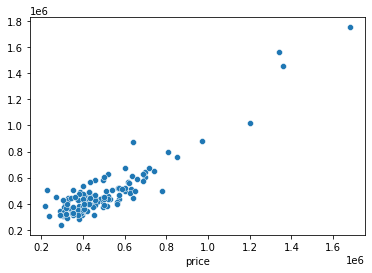

The mean absolute error of the model in the test set is: 74188.42
The mean squared error of the model in the test set is: 8586201139.57
The root mean squared error of the model in the test set is: 92661.76
R2: 0.8164740701302045
98028
R2: 0.6703132499973758


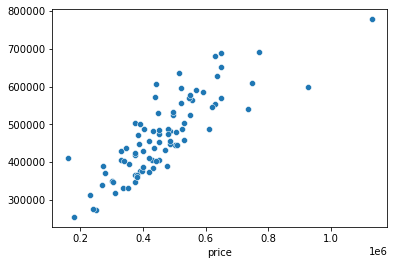

The mean absolute error of the model in the test set is: 60397.00
The mean squared error of the model in the test set is: 7550832177.37
The root mean squared error of the model in the test set is: 86895.52
R2: 0.6703132499973758
98136
R2: 0.8150368899746264


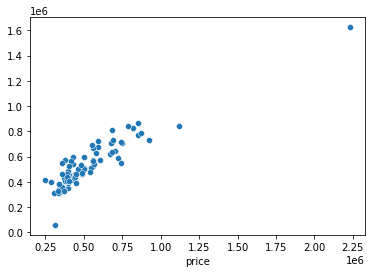

The mean absolute error of the model in the test set is: 69030.87
The mean squared error of the model in the test set is: 12280475698.25
The root mean squared error of the model in the test set is: 110817.31
R2: 0.8150368899746264
98074
R2: 0.6729011253310184


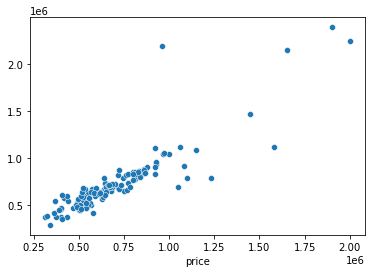

The mean absolute error of the model in the test set is: 80417.87
The mean squared error of the model in the test set is: 24518756425.46
The root mean squared error of the model in the test set is: 156584.66
R2: 0.6729011253310184
98053
R2: 0.8139001935115932


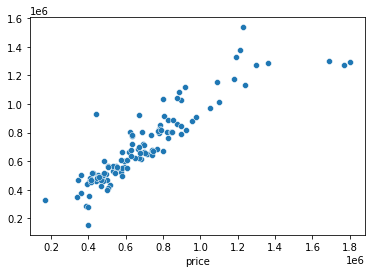

The mean absolute error of the model in the test set is: 80751.45
The mean squared error of the model in the test set is: 15029416404.05
The root mean squared error of the model in the test set is: 122594.52
R2: 0.8139001935115932
98003
R2: 0.6139233227605083


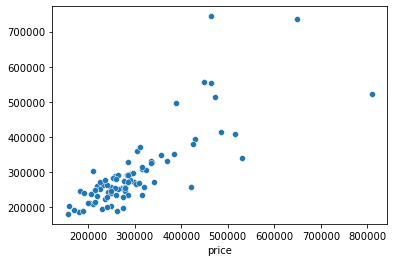

The mean absolute error of the model in the test set is: 42491.33
The mean squared error of the model in the test set is: 4408699533.86
The root mean squared error of the model in the test set is: 66398.04
R2: 0.6139233227605083
98198
R2: 0.4470665262506869


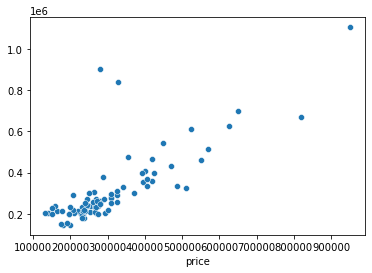

The mean absolute error of the model in the test set is: 57264.13
The mean squared error of the model in the test set is: 11036453254.46
The root mean squared error of the model in the test set is: 105054.53
R2: 0.4470665262506869
98146
R2: 0.6235044309911342


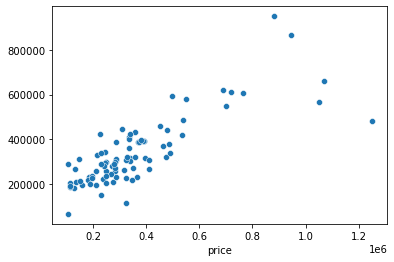

The mean absolute error of the model in the test set is: 83274.65
The mean squared error of the model in the test set is: 18047973999.46
The root mean squared error of the model in the test set is: 134342.75
R2: 0.6235044309911342
98038
R2: -2.5622794860959683e+25


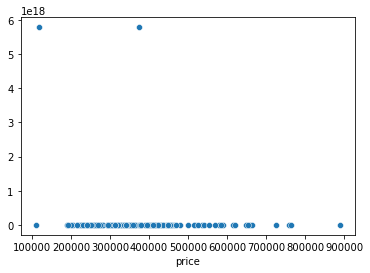

The mean absolute error of the model in the test set is: 65414402241516176.00
The mean squared error of the model in the test set is: 377958381405258511101255194119241728.00
The root mean squared error of the model in the test set is: 614783198701183232.00
R2: -2.5622794860959683e+25
98007
R2: 0.8135953825999599


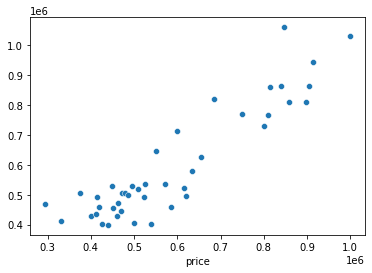

The mean absolute error of the model in the test set is: 61036.79
The mean squared error of the model in the test set is: 6038452804.72
The root mean squared error of the model in the test set is: 77707.48
R2: 0.8135953825999599
98115
R2: 0.6476836947104219


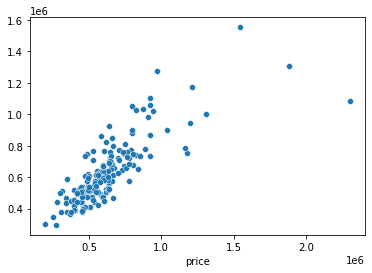

The mean absolute error of the model in the test set is: 94256.37
The mean squared error of the model in the test set is: 23211993092.58
The root mean squared error of the model in the test set is: 152354.83
R2: 0.6476836947104219
98107
R2: 0.4174526686324447


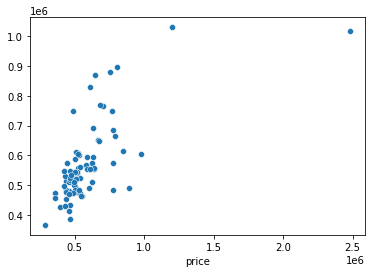

The mean absolute error of the model in the test set is: 95895.47
The mean squared error of the model in the test set is: 38866902294.00
The root mean squared error of the model in the test set is: 197146.91
R2: 0.4174526686324447
98126
R2: 0.602516201312931


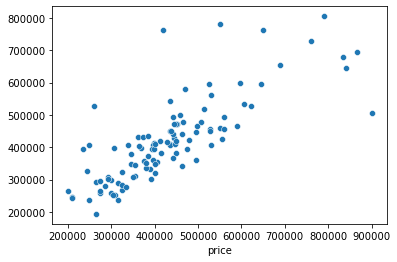

The mean absolute error of the model in the test set is: 61093.38
The mean squared error of the model in the test set is: 8022457268.09
The root mean squared error of the model in the test set is: 89568.17
R2: 0.602516201312931
98019
R2: 0.4565249259198456


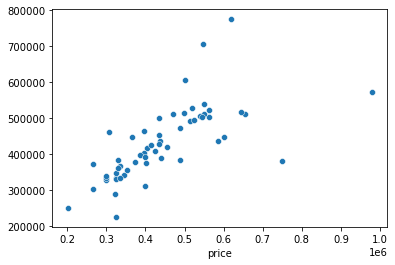

The mean absolute error of the model in the test set is: 61162.78
The mean squared error of the model in the test set is: 9737139536.90
The root mean squared error of the model in the test set is: 98676.95
R2: 0.4565249259198456
98103
R2: 0.6903753679580149


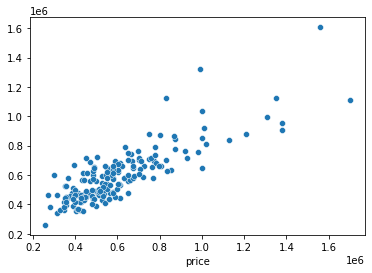

The mean absolute error of the model in the test set is: 96128.21
The mean squared error of the model in the test set is: 17509400368.23
The root mean squared error of the model in the test set is: 132323.09
R2: 0.6903753679580149
98002
R2: 0.5021146958233741


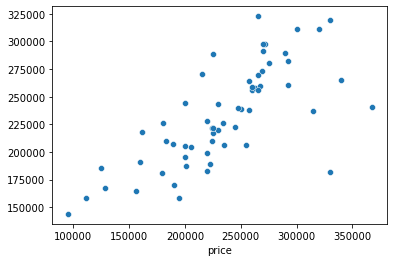

The mean absolute error of the model in the test set is: 26738.37
The mean squared error of the model in the test set is: 1542565113.88
The root mean squared error of the model in the test set is: 39275.50
R2: 0.5021146958233741
98133
R2: 0.39995184880766343


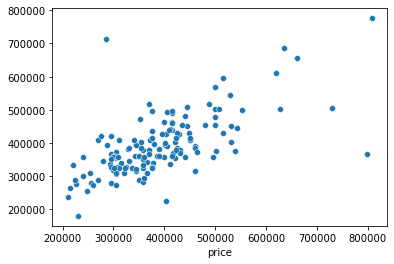

The mean absolute error of the model in the test set is: 54863.09
The mean squared error of the model in the test set is: 6607042633.10
The root mean squared error of the model in the test set is: 81283.72
R2: 0.39995184880766343
98040
R2: 0.728696113531953


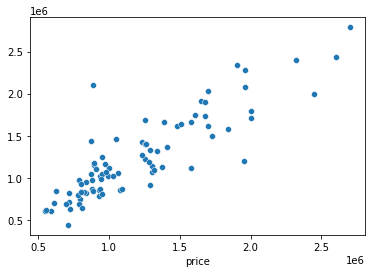

The mean absolute error of the model in the test set is: 174980.37
The mean squared error of the model in the test set is: 62967397370.26
The root mean squared error of the model in the test set is: 250933.05
R2: 0.728696113531953
98092
R2: 0.6430748235353652


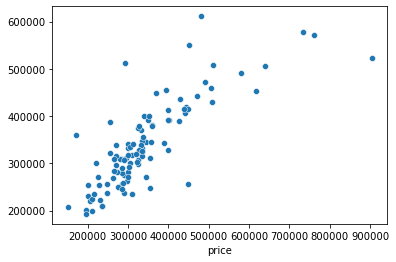

The mean absolute error of the model in the test set is: 45212.80
The mean squared error of the model in the test set is: 5188200290.03
The root mean squared error of the model in the test set is: 72029.16
R2: 0.6430748235353652
98030
R2: 0.538603570483519


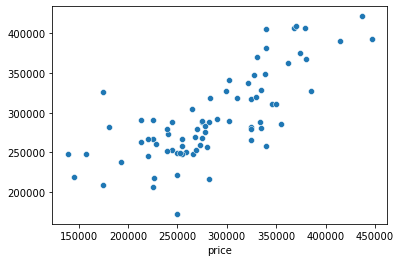

The mean absolute error of the model in the test set is: 33347.05
The mean squared error of the model in the test set is: 1950670592.72
The root mean squared error of the model in the test set is: 44166.40
R2: 0.538603570483519
98119
R2: 0.7568673942318185


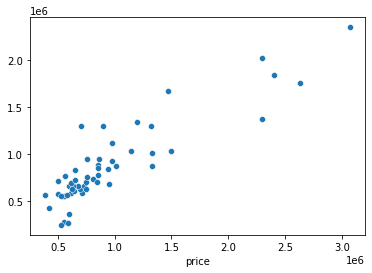

The mean absolute error of the model in the test set is: 183645.38
The mean squared error of the model in the test set is: 78682893530.93
The root mean squared error of the model in the test set is: 280504.71
R2: 0.7568673942318185
98112
R2: 0.809638345086507


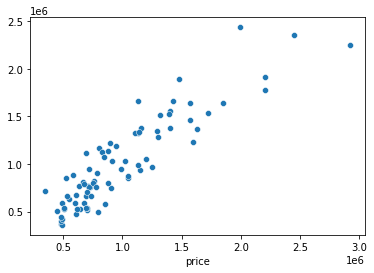

The mean absolute error of the model in the test set is: 172020.13
The mean squared error of the model in the test set is: 46766923126.95
The root mean squared error of the model in the test set is: 216256.61
R2: 0.809638345086507
98052
R2: 0.5533920031704118


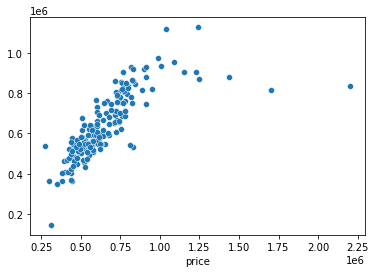

The mean absolute error of the model in the test set is: 79575.64
The mean squared error of the model in the test set is: 24627861620.89
The root mean squared error of the model in the test set is: 156932.67
R2: 0.5533920031704118
98027
R2: 0.7572758538600698


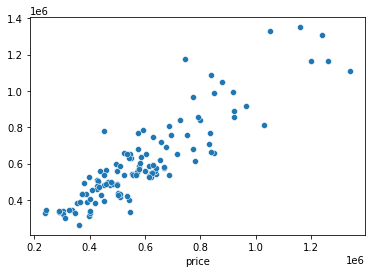

The mean absolute error of the model in the test set is: 80863.80
The mean squared error of the model in the test set is: 11313936235.23
The root mean squared error of the model in the test set is: 106366.99
R2: 0.7572758538600698
98117
R2: 0.7100577133867716


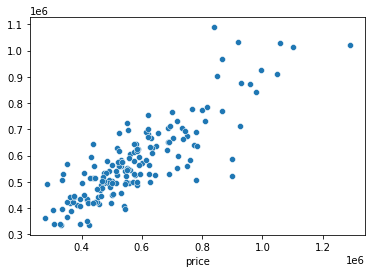

The mean absolute error of the model in the test set is: 69976.30
The mean squared error of the model in the test set is: 9036736971.20
The root mean squared error of the model in the test set is: 95061.75
R2: 0.7100577133867716
98058
R2: -6.09392342373232e+22


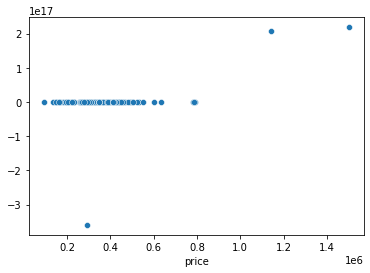

The mean absolute error of the model in the test set is: 5741078138442389.00
The mean squared error of the model in the test set is: 1609330986652088497840439850696704.00
The root mean squared error of the model in the test set is: 40116467773871720.00
R2: -6.09392342373232e+22
98001
R2: 0.6541455402403722


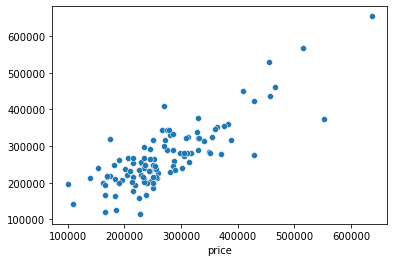

The mean absolute error of the model in the test set is: 40550.14
The mean squared error of the model in the test set is: 2701849952.47
The root mean squared error of the model in the test set is: 51979.32
R2: 0.6541455402403722
98056
R2: 0.8672877863533476


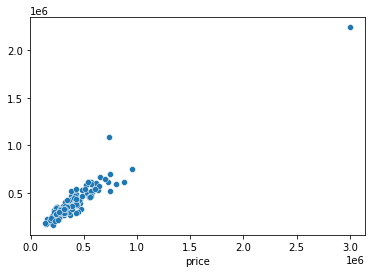

The mean absolute error of the model in the test set is: 62083.49
The mean squared error of the model in the test set is: 10597080815.60
The root mean squared error of the model in the test set is: 102942.12
R2: 0.8672877863533476
98166
R2: 0.7387466957111808


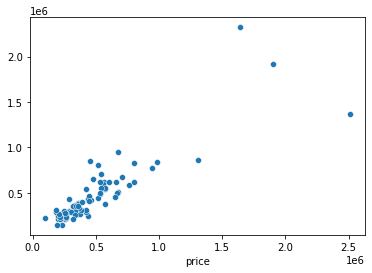

The mean absolute error of the model in the test set is: 102219.37
The mean squared error of the model in the test set is: 37037479130.00
The root mean squared error of the model in the test set is: 192451.24
R2: 0.7387466957111808
98023
R2: 0.7246616533735569


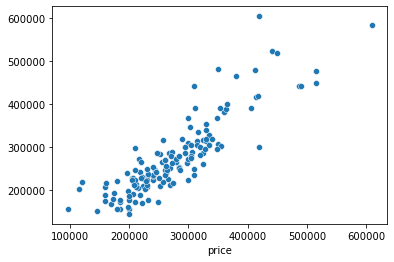

The mean absolute error of the model in the test set is: 31186.51
The mean squared error of the model in the test set is: 1834591010.47
The root mean squared error of the model in the test set is: 42832.13
R2: 0.7246616533735569
98070
R2: 0.4367568828700794


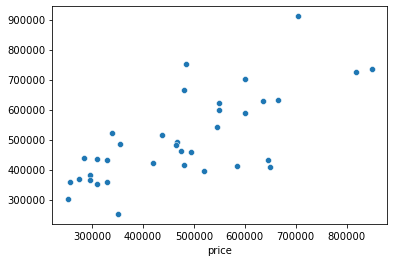

The mean absolute error of the model in the test set is: 94282.06
The mean squared error of the model in the test set is: 13807633877.46
The root mean squared error of the model in the test set is: 117505.89
R2: 0.4367568828700794
98148
R2: -0.8143473025126613


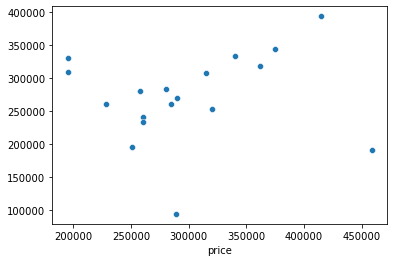

The mean absolute error of the model in the test set is: 60627.87
The mean squared error of the model in the test set is: 8629692000.01
The root mean squared error of the model in the test set is: 92896.14
R2: -0.8143473025126613
98105
R2: 0.8186341882576061


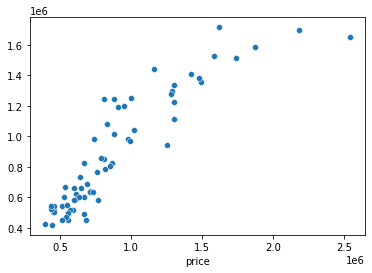

The mean absolute error of the model in the test set is: 119826.06
The mean squared error of the model in the test set is: 34411242566.02
The root mean squared error of the model in the test set is: 185502.68
R2: 0.8186341882576061
98042
R2: 0.6494805246624185


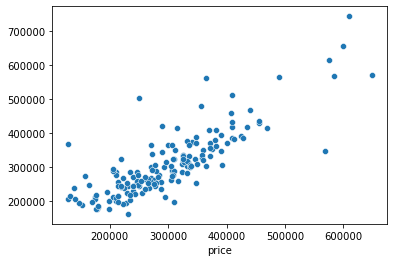

The mean absolute error of the model in the test set is: 38836.34
The mean squared error of the model in the test set is: 3257333458.15
The root mean squared error of the model in the test set is: 57073.05
R2: 0.6494805246624185
98008
R2: 0.8816152756416455


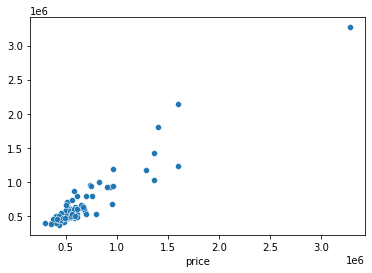

The mean absolute error of the model in the test set is: 92464.84
The mean squared error of the model in the test set is: 18071825184.33
The root mean squared error of the model in the test set is: 134431.49
R2: 0.8816152756416455
98059
R2: 0.788477631021128


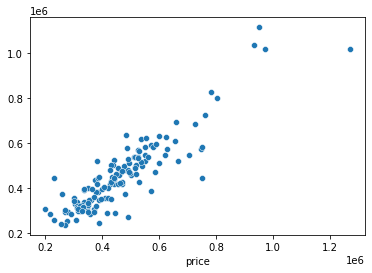

The mean absolute error of the model in the test set is: 49992.06
The mean squared error of the model in the test set is: 5472545562.18
The root mean squared error of the model in the test set is: 73976.66
R2: 0.788477631021128
98122
R2: 0.7142741656092312


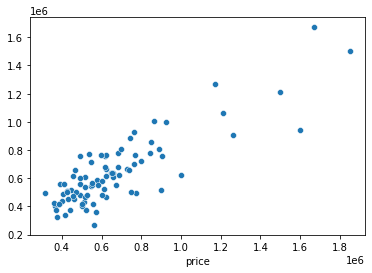

The mean absolute error of the model in the test set is: 110017.34
The mean squared error of the model in the test set is: 24029343352.47
The root mean squared error of the model in the test set is: 155014.01
R2: 0.7142741656092312
98144
R2: 0.8244853638429823


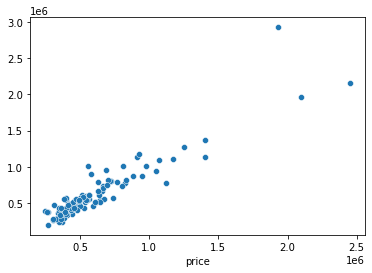

The mean absolute error of the model in the test set is: 91208.97
The mean squared error of the model in the test set is: 22807661813.73
The root mean squared error of the model in the test set is: 151022.06
R2: 0.8244853638429823
98004
R2: 0.8024369940173521


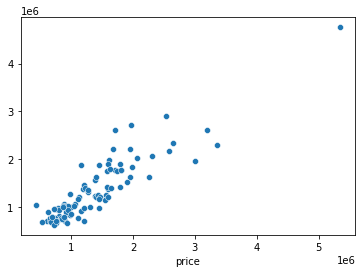

The mean absolute error of the model in the test set is: 234340.06
The mean squared error of the model in the test set is: 102478319772.42
The root mean squared error of the model in the test set is: 320122.35
R2: 0.8024369940173521
98005
R2: -0.07471588267122464


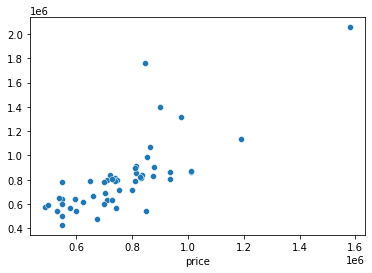

The mean absolute error of the model in the test set is: 121678.38
The mean squared error of the model in the test set is: 38282585086.11
The root mean squared error of the model in the test set is: 195659.36
R2: -0.07471588267122464
98034
R2: 0.7939734241894125


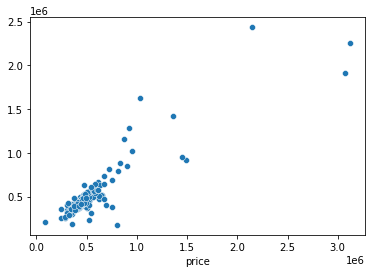

The mean absolute error of the model in the test set is: 77388.46
The mean squared error of the model in the test set is: 27539070699.32
The root mean squared error of the model in the test set is: 165949.00
R2: 0.7939734241894125
98075
R2: 0.7831548296424208


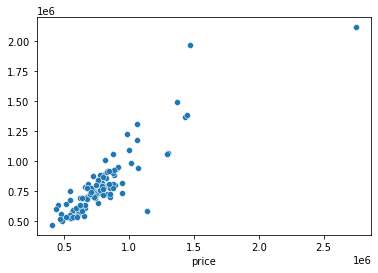

The mean absolute error of the model in the test set is: 83552.17
The mean squared error of the model in the test set is: 17003251745.10
The root mean squared error of the model in the test set is: 130396.52
R2: 0.7831548296424208
98116
R2: 0.8121746683587939


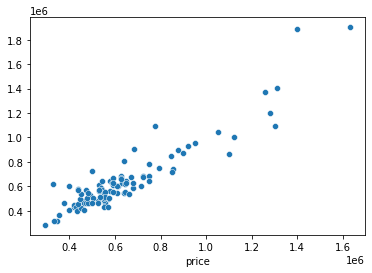

The mean absolute error of the model in the test set is: 71626.22
The mean squared error of the model in the test set is: 11343954512.50
The root mean squared error of the model in the test set is: 106508.00
R2: 0.8121746683587939
98010
R2: 0.6403701490936968


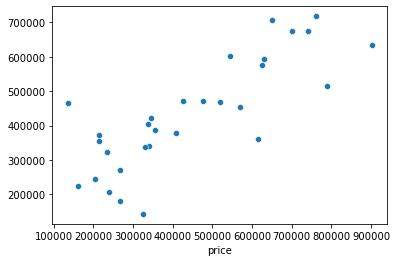

The mean absolute error of the model in the test set is: 89963.73
The mean squared error of the model in the test set is: 15708529976.48
The root mean squared error of the model in the test set is: 125333.67
R2: 0.6403701490936968
98118
R2: 0.5849391288682295


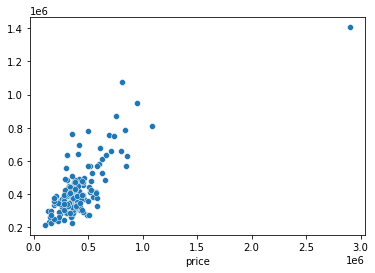

The mean absolute error of the model in the test set is: 100244.94
The mean squared error of the model in the test set is: 28387741817.53
The root mean squared error of the model in the test set is: 168486.62
R2: 0.5849391288682295
98199
R2: 0.7046794696519467


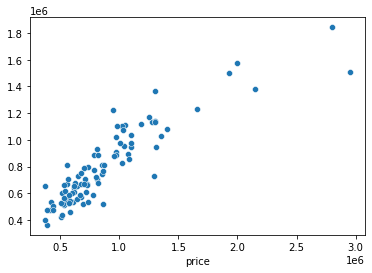

The mean absolute error of the model in the test set is: 141240.83
The mean squared error of the model in the test set is: 60896452526.19
The root mean squared error of the model in the test set is: 246772.07
R2: 0.7046794696519467
98032
R2: 0.44525004224822995


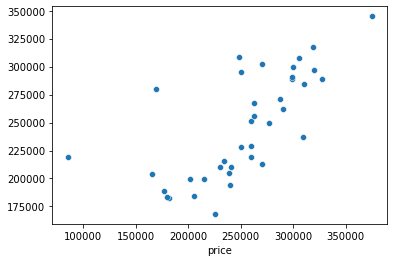

The mean absolute error of the model in the test set is: 29942.70
The mean squared error of the model in the test set is: 1703815888.81
The root mean squared error of the model in the test set is: 41277.30
R2: 0.44525004224822995
98045
R2: 0.7793389837486259


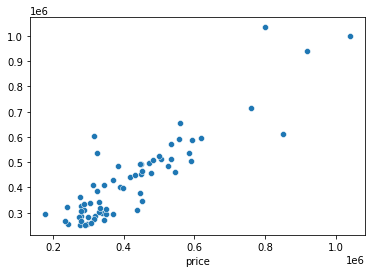

The mean absolute error of the model in the test set is: 54564.99
The mean squared error of the model in the test set is: 6197121926.04
The root mean squared error of the model in the test set is: 78721.80
R2: 0.7793389837486259
98102
R2: 0.59797173324816


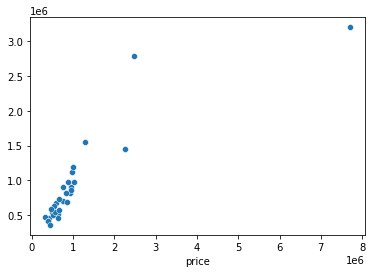

The mean absolute error of the model in the test set is: 256861.66
The mean squared error of the model in the test set is: 665241320636.44
The root mean squared error of the model in the test set is: 815623.27
R2: 0.59797173324816
98077
R2: 0.8135367987136265


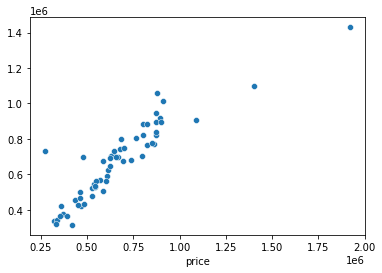

The mean absolute error of the model in the test set is: 68806.69
The mean squared error of the model in the test set is: 13434915861.36
The root mean squared error of the model in the test set is: 115909.08
R2: 0.8135367987136265
98108
R2: 0.6052876248308505


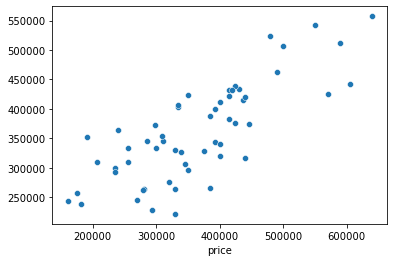

The mean absolute error of the model in the test set is: 54784.58
The mean squared error of the model in the test set is: 4628673489.24
The root mean squared error of the model in the test set is: 68034.36
R2: 0.6052876248308505
98168
R2: 0.5132122210687694


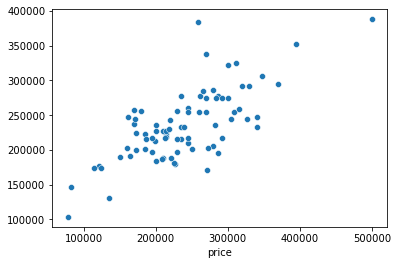

The mean absolute error of the model in the test set is: 39027.79
The mean squared error of the model in the test set is: 2387824024.14
The root mean squared error of the model in the test set is: 48865.37
R2: 0.5132122210687694
98177
R2: 0.5327118389373884


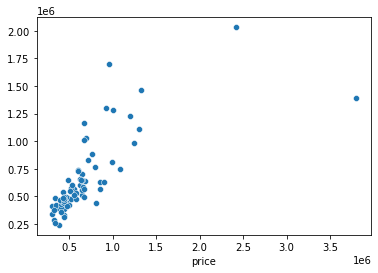

The mean absolute error of the model in the test set is: 147275.39
The mean squared error of the model in the test set is: 105905646559.85
The root mean squared error of the model in the test set is: 325431.48
R2: 0.5327118389373884
98065
R2: 0.7961361935027771


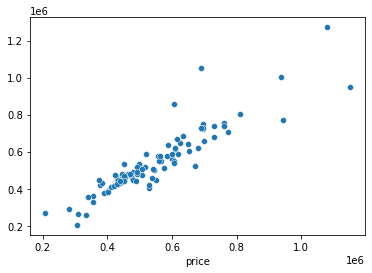

The mean absolute error of the model in the test set is: 44737.50
The mean squared error of the model in the test set is: 5215009763.70
The root mean squared error of the model in the test set is: 72215.02
R2: 0.7961361935027771
98029
R2: 0.6876142988180044


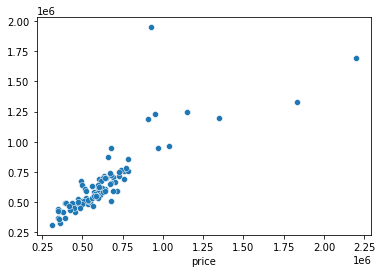

The mean absolute error of the model in the test set is: 72828.06
The mean squared error of the model in the test set is: 22055866480.57
The root mean squared error of the model in the test set is: 148512.18
R2: 0.6876142988180044
98006
R2: -1.6860101700127954e+24


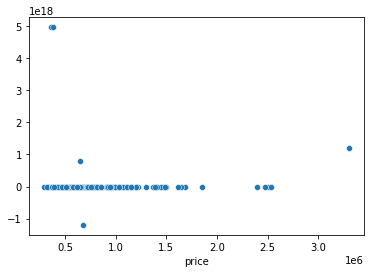

The mean absolute error of the model in the test set is: 87331356947795392.00
The mean squared error of the model in the test set is: 351514332727558041493758869298479104.00
The root mean squared error of the model in the test set is: 592886441679650816.00
R2: -1.6860101700127954e+24
98109
R2: 0.5709924606224641


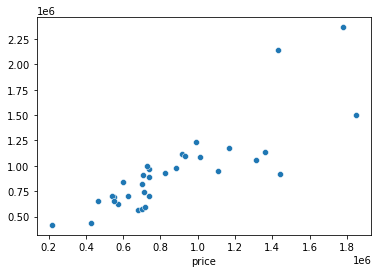

The mean absolute error of the model in the test set is: 190198.66
The mean squared error of the model in the test set is: 60024421840.12
The root mean squared error of the model in the test set is: 244998.82
R2: 0.5709924606224641
98022
R2: 0.6804633822997486


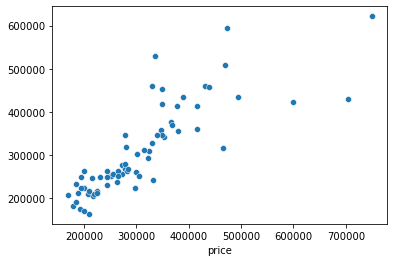

The mean absolute error of the model in the test set is: 39120.51
The mean squared error of the model in the test set is: 4132303346.85
The root mean squared error of the model in the test set is: 64282.99
R2: 0.6804633822997486
98033
R2: 0.7864668403809554


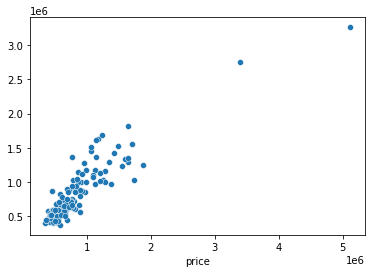

The mean absolute error of the model in the test set is: 156063.82
The mean squared error of the model in the test set is: 66043471075.40
The root mean squared error of the model in the test set is: 256989.24
R2: 0.7864668403809554
98155
R2: 0.5020845870263535


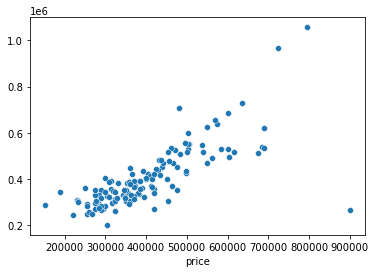

The mean absolute error of the model in the test set is: 55800.95
The mean squared error of the model in the test set is: 7902342941.25
The root mean squared error of the model in the test set is: 88895.12
R2: 0.5020845870263535
98024
R2: -3.1787518719993306e+27


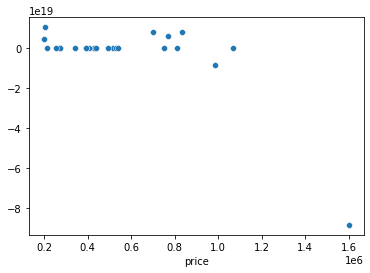

The mean absolute error of the model in the test set is: 5527649572975225856.00
The mean squared error of the model in the test set is: 339078259940169731705274556297271836672.00
The root mean squared error of the model in the test set is: 18414077765127684096.00
R2: -3.1787518719993306e+27
98011
R2: 0.43526115846296565


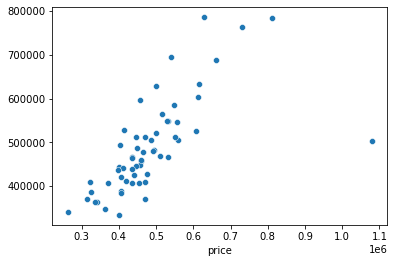

The mean absolute error of the model in the test set is: 52874.27
The mean squared error of the model in the test set is: 8947269736.78
The root mean squared error of the model in the test set is: 94590.01
R2: 0.43526115846296565
98031
R2: 0.6344756046552599


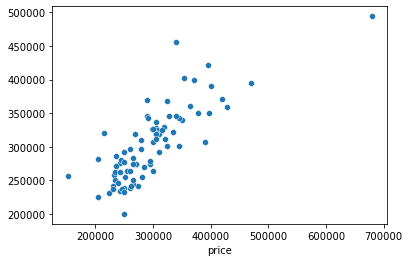

The mean absolute error of the model in the test set is: 30533.17
The mean squared error of the model in the test set is: 1829017496.25
The root mean squared error of the model in the test set is: 42767.01
R2: 0.6344756046552599
98106
R2: 0.293026259649379


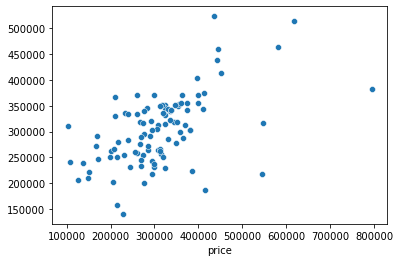

The mean absolute error of the model in the test set is: 59556.51
The mean squared error of the model in the test set is: 7736359437.30
The root mean squared error of the model in the test set is: 87956.58
R2: 0.293026259649379
98072
R2: -6.64972869526998e+26


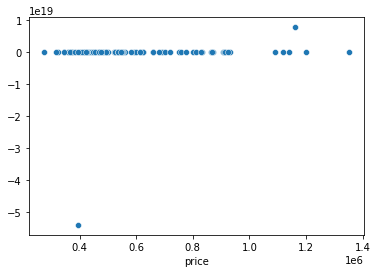

The mean absolute error of the model in the test set is: 752520375067097984.00
The mean squared error of the model in the test set is: 36298244165162817688146358089734422528.00
The root mean squared error of the model in the test set is: 6024802417105711104.00
R2: -6.64972869526998e+26
98188
R2: 0.6159338873380567


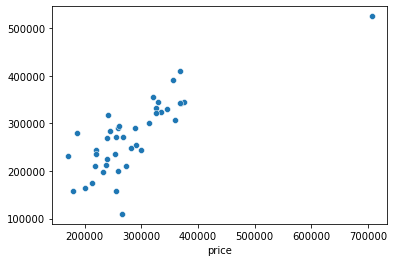

The mean absolute error of the model in the test set is: 39390.60
The mean squared error of the model in the test set is: 2896007536.14
The root mean squared error of the model in the test set is: 53814.57
R2: 0.6159338873380567
98014
R2: 0.7271762501646779


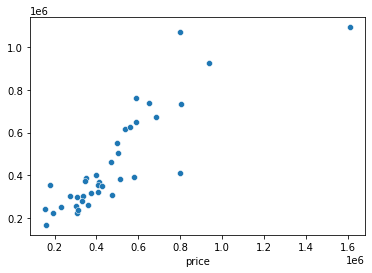

The mean absolute error of the model in the test set is: 89895.73
The mean squared error of the model in the test set is: 19022481192.35
The root mean squared error of the model in the test set is: 137922.01
R2: 0.7271762501646779
98055
R2: 0.61744707708081


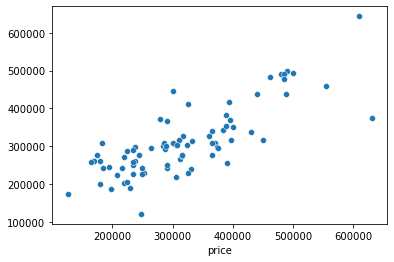

The mean absolute error of the model in the test set is: 49241.86
The mean squared error of the model in the test set is: 4309418443.31
The root mean squared error of the model in the test set is: 65646.16
R2: 0.61744707708081
98039
R2: -1.294386576443069


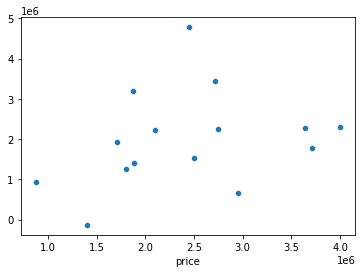

The mean absolute error of the model in the test set is: 1073279.83
The mean squared error of the model in the test set is: 1705222264479.29
The root mean squared error of the model in the test set is: 1305841.59
R2: -1.294386576443069


In [39]:
#checkin linear regresion model for each ZIPCODE
for x in data['zipcode'].unique():
    print(x)
    linear(data[data['zipcode']==x],'price',0.3,semilla)

In [40]:
data['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=object)

The mean absolute error of the model in the test set is: 72181.64
The mean squared error of the model in the test set is: 14867449385.27
The root mean squared error of the model in the test set is: 121932.15
R2: 0.8892479977602616


C:\Users\Kyre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


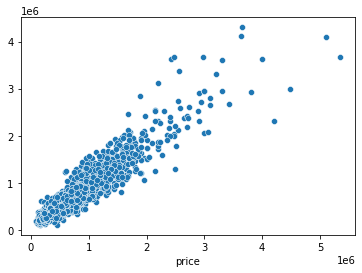

In [41]:
model_ne = neuro(data,'price',0.3,semilla)

neuro(data,'price',0.3,semilla)

<AxesSubplot:>

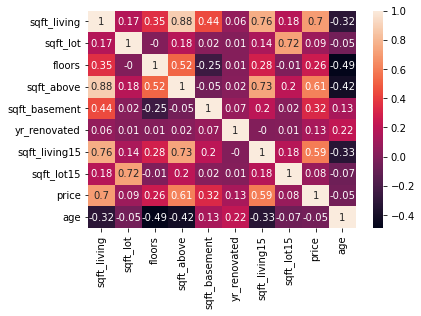

In [42]:
#Checking multicolinearity
fig, ax = plt.subplots()
sns.heatmap(round(numerical.corr(),2), annot=True, ax=ax)
#plt.show()

In [43]:
#No colinearity is aparent


In [44]:
def plotting(dataframe,target):
    codes = dataframe['zipcode'].unique()
    for zipc in codes:
        temp = dataframe[dataframe['zipcode'] == zipc]
        #print(temp)
        temp = temp.reset_index()
        num=temp.select_dtypes(include = np.number)
        cat = temp.select_dtypes(include = 'object')
    
        for col in cat:
            plt.figure(figsize=(8,5))
            print(zipc)
            sns.boxplot(x=cat[col], y=num['price'])
            plt.show()
  
    return()

98178


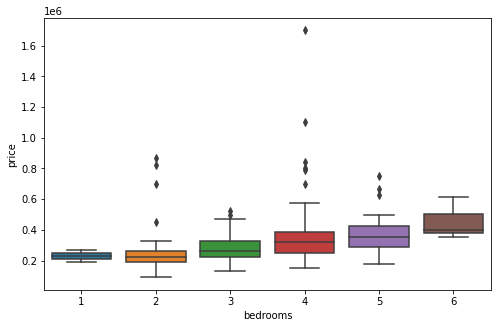

98178


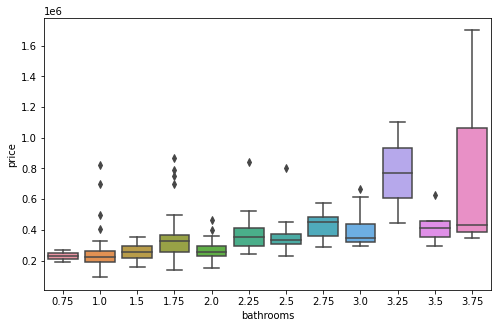

98178


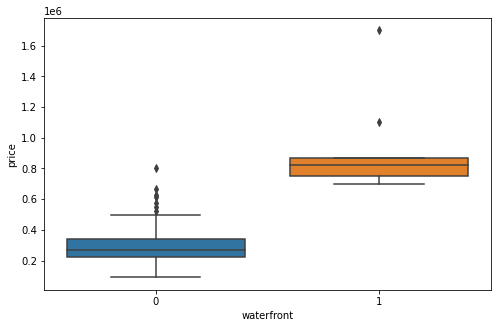

98178


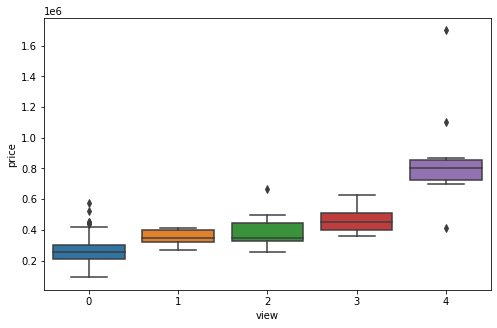

98178


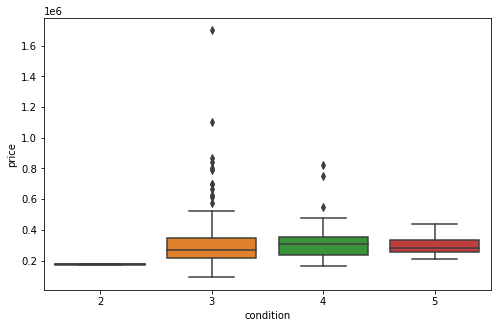

98178


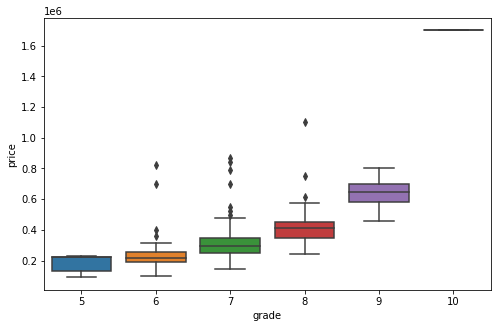

98178


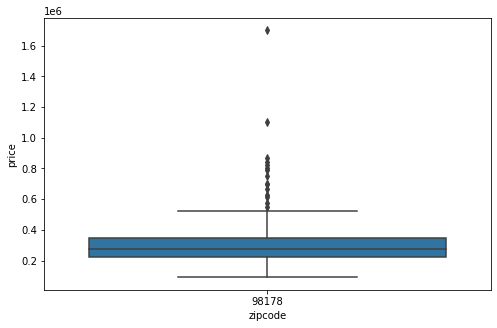

98125


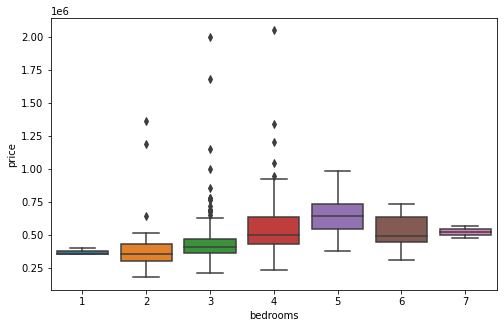

98125


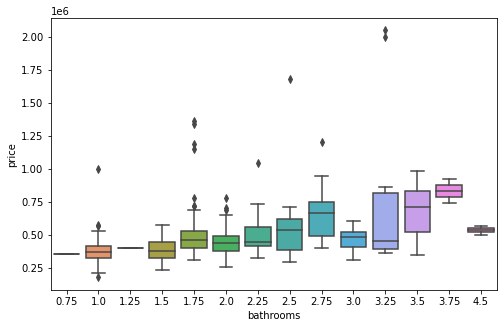

98125


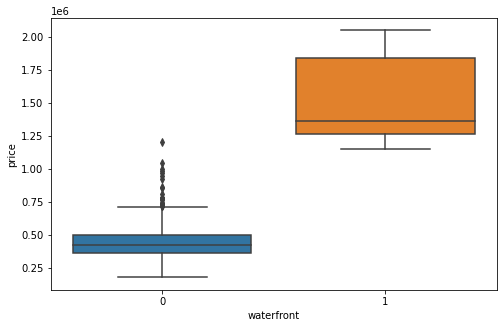

98125


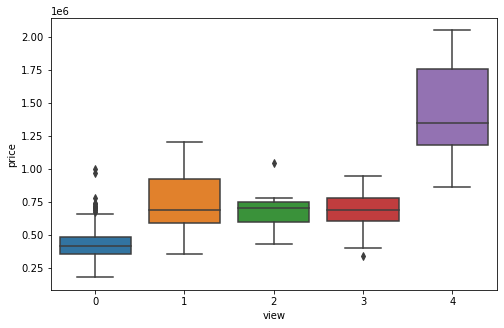

98125


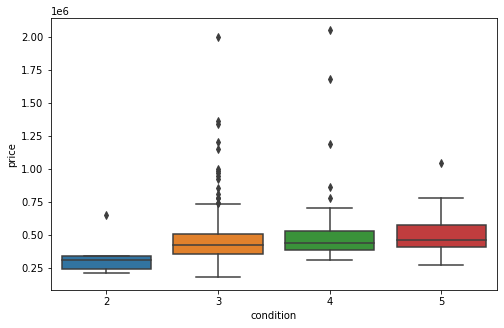

98125


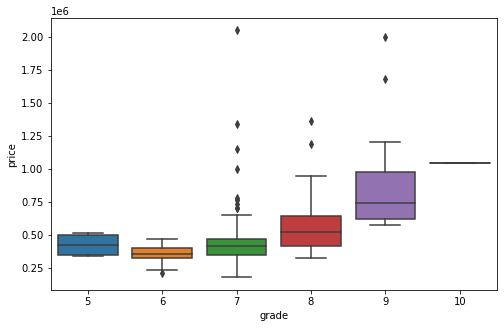

98125


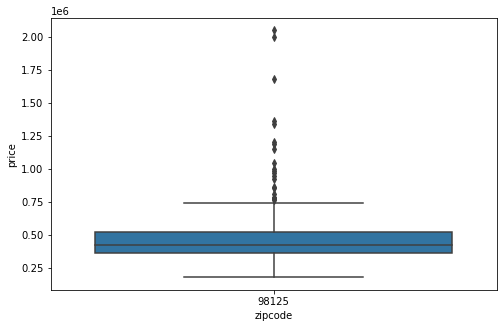

98028


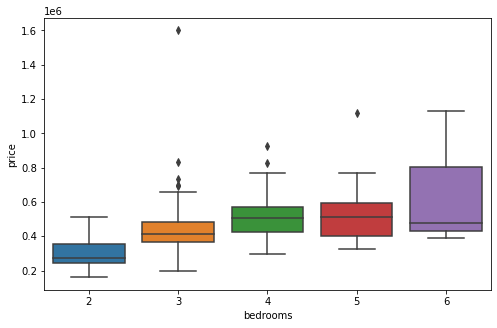

98028


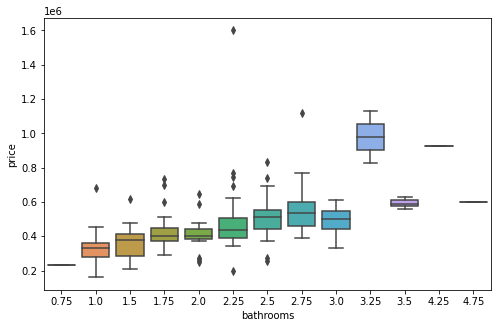

98028


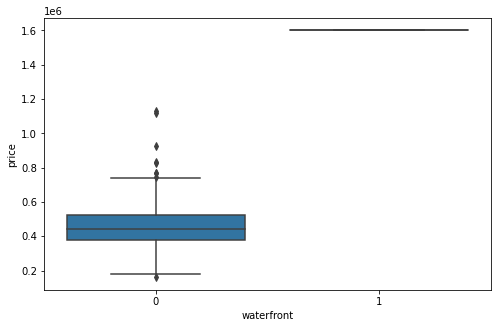

98028


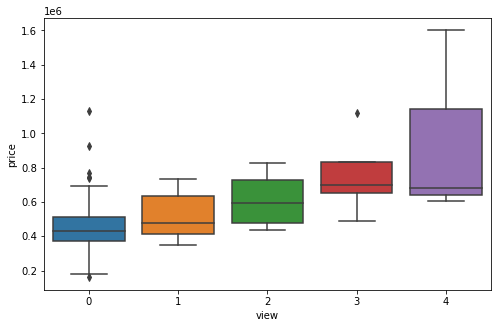

98028


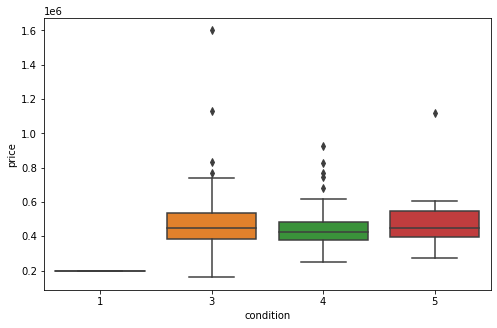

98028


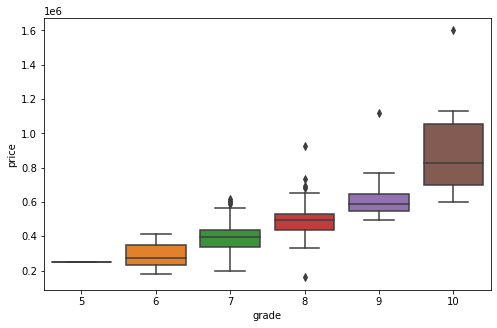

98028


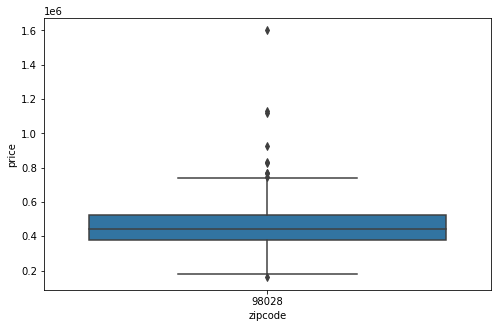

98136


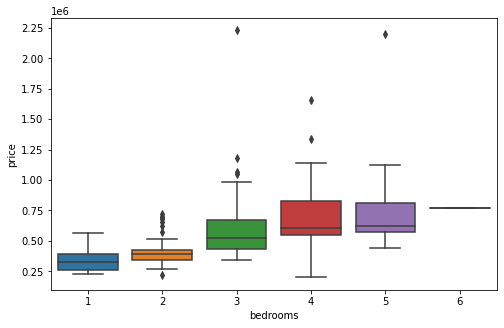

98136


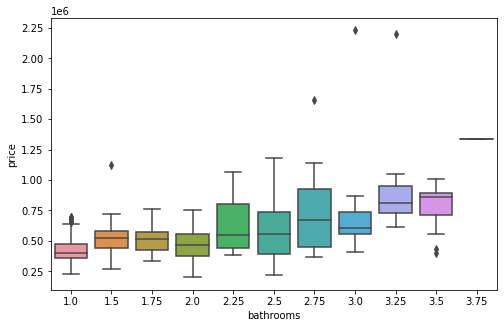

98136


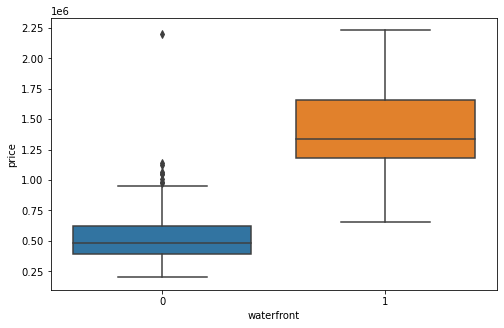

98136


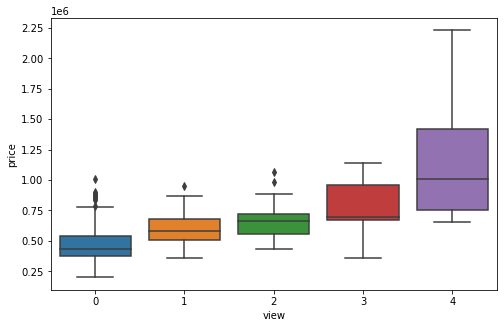

98136


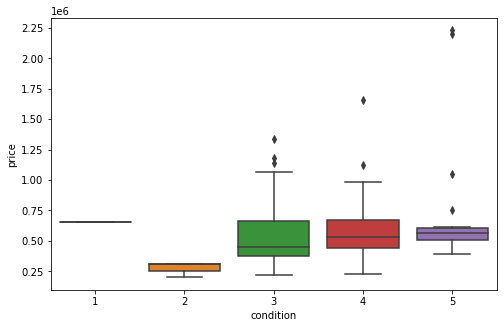

98136


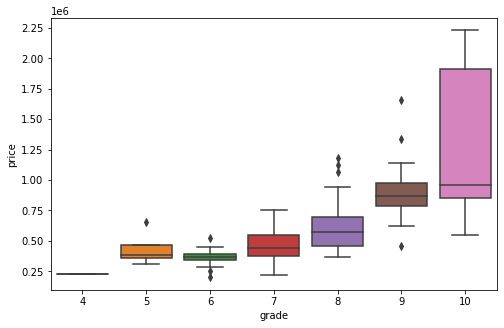

98136


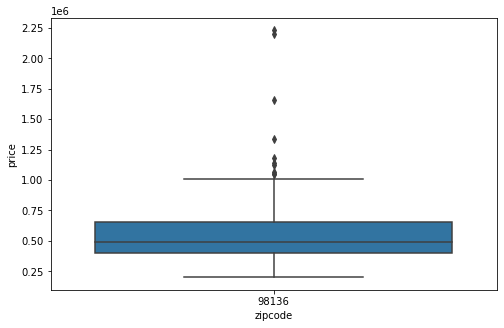

98074


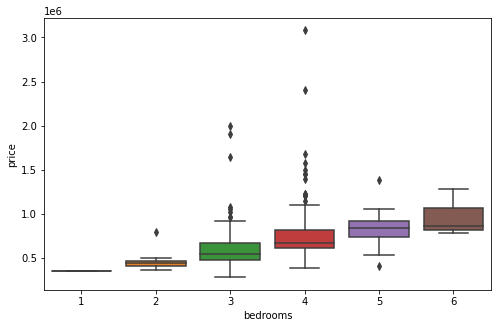

98074


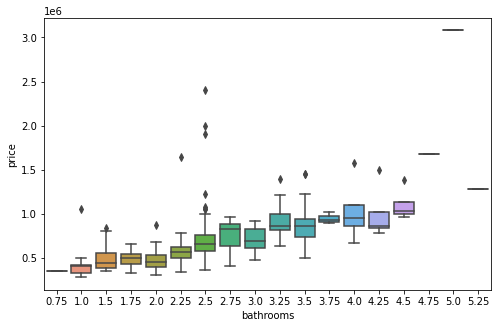

98074


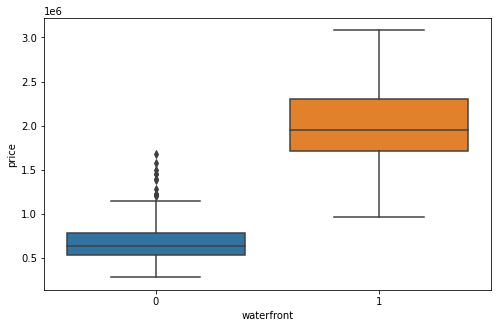

98074


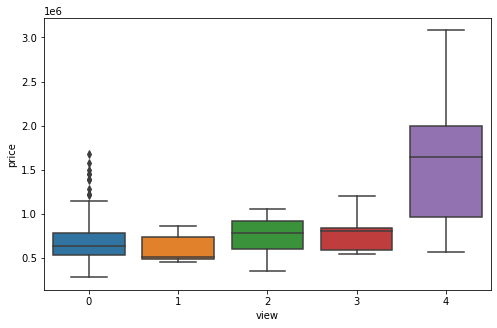

98074


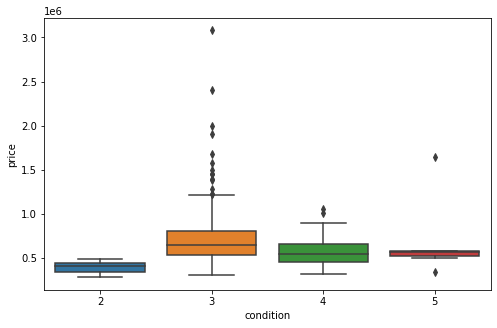

98074


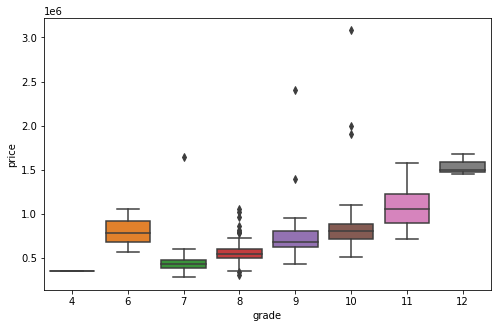

98074


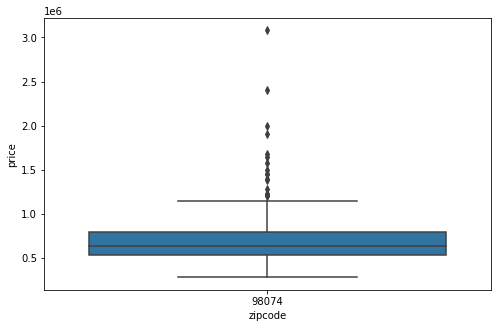

98053


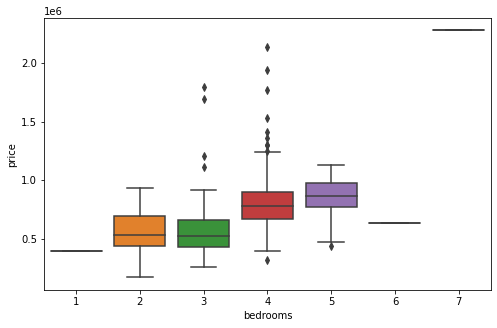

98053


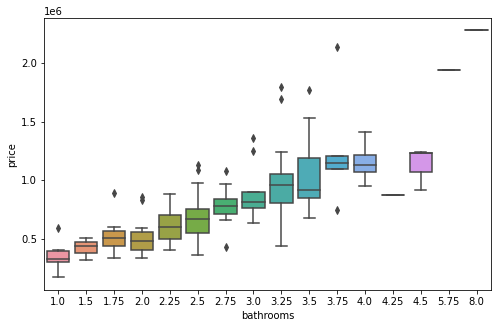

98053


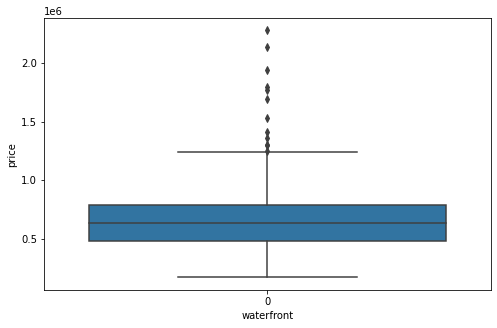

98053


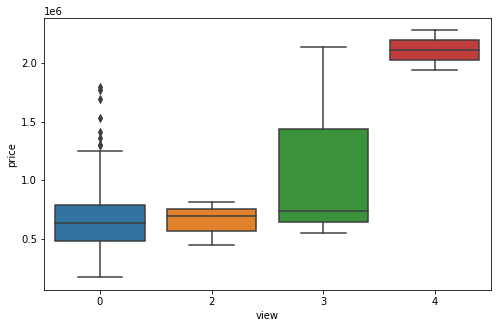

98053


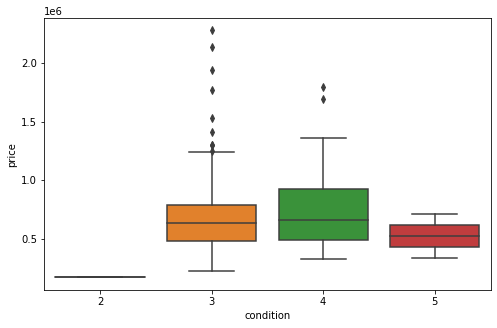

98053


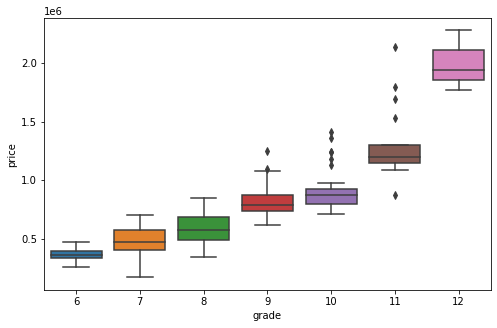

98053


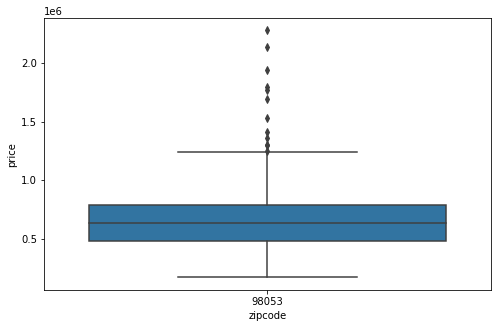

98003


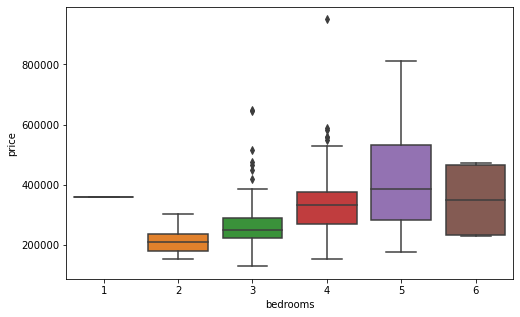

98003


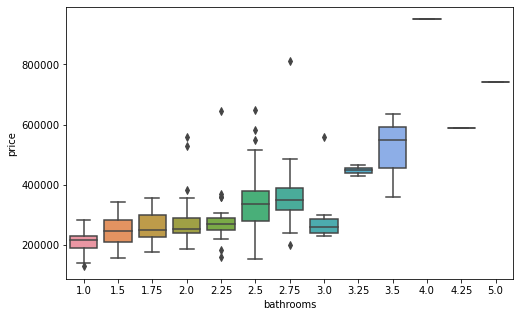

98003


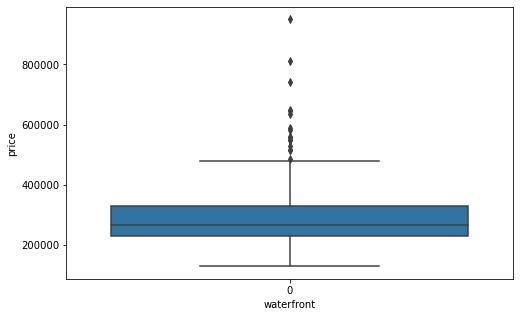

98003


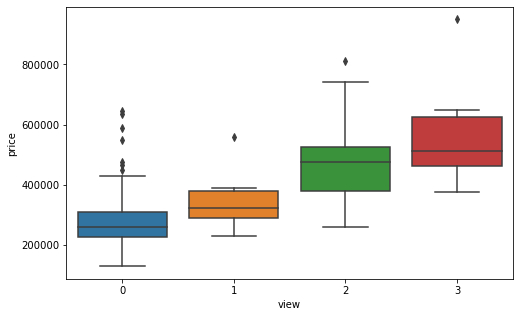

98003


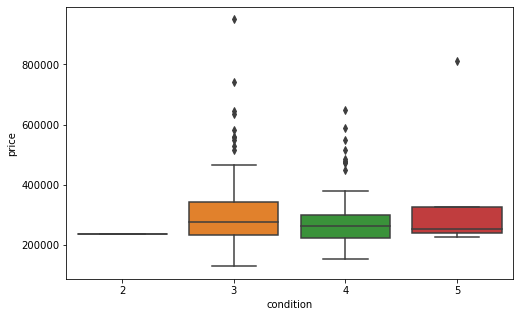

98003


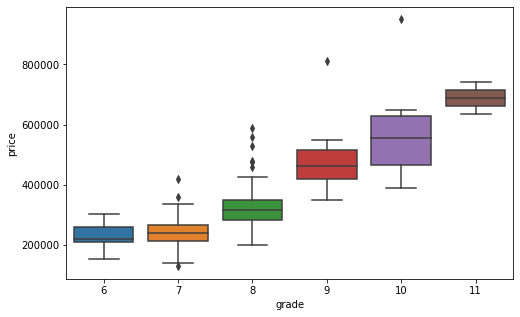

98003


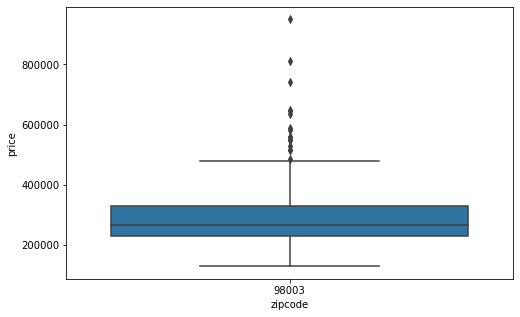

98198


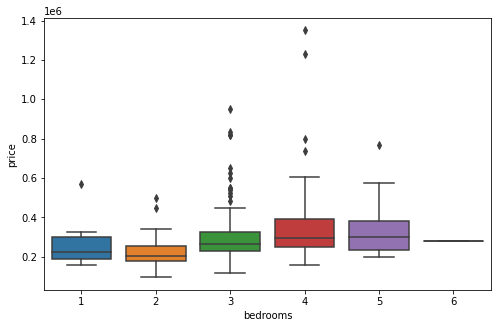

98198


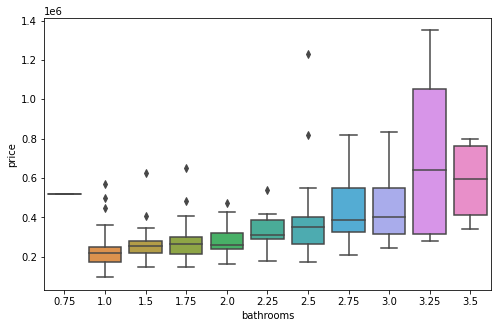

98198


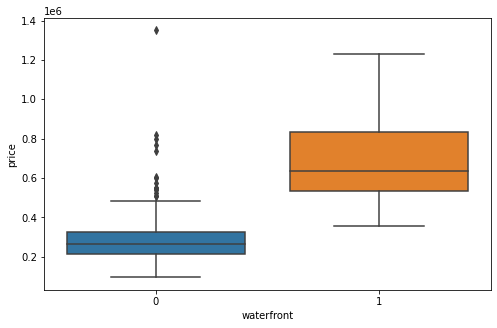

98198


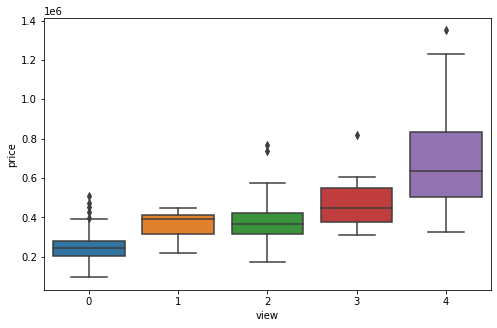

98198


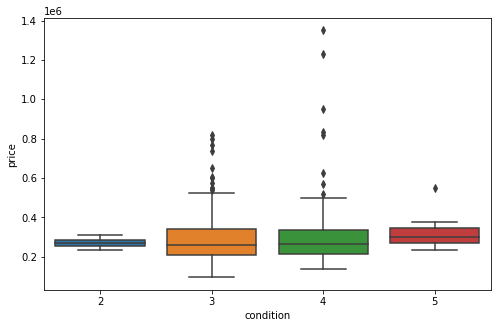

98198


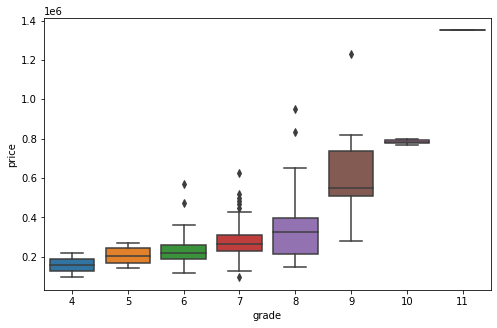

98198


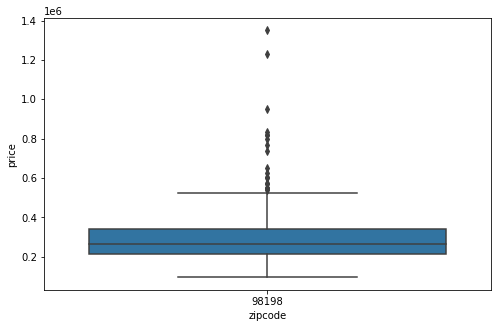

98146


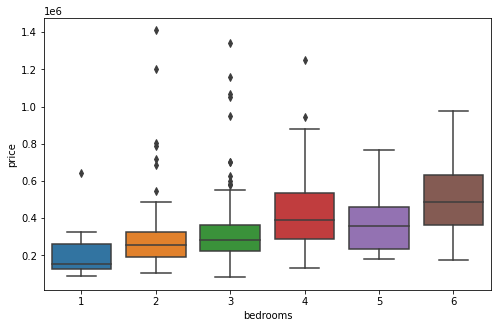

98146


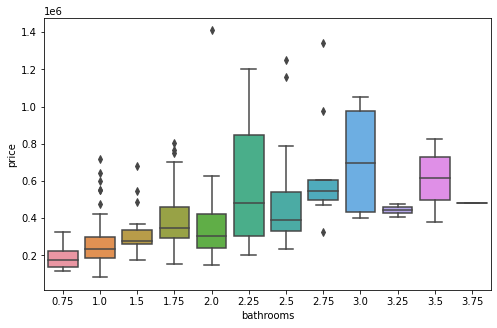

98146


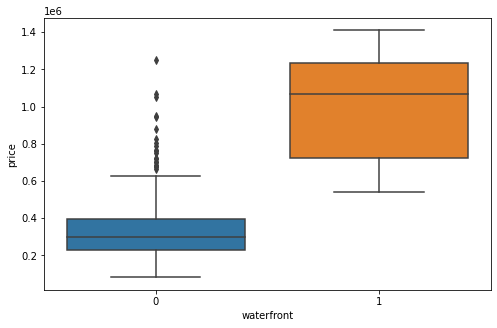

98146


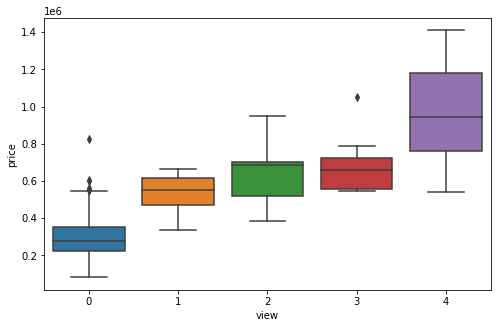

98146


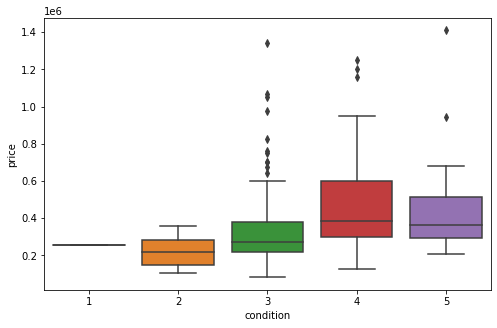

98146


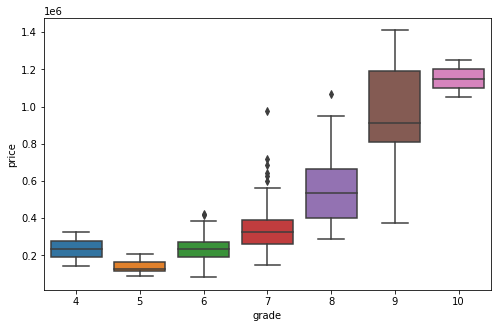

98146


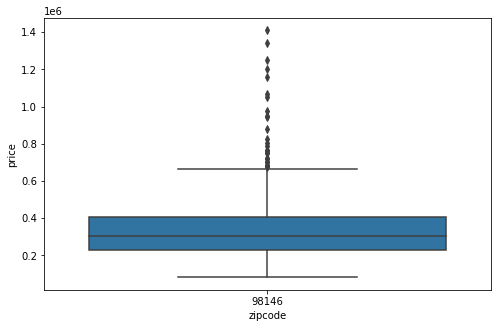

98038


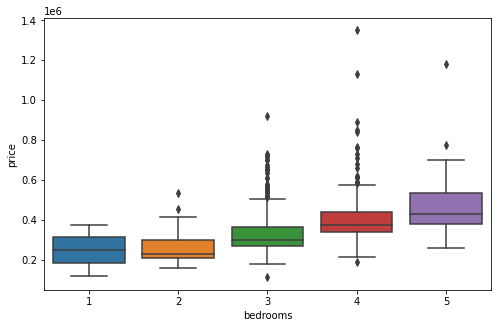

98038


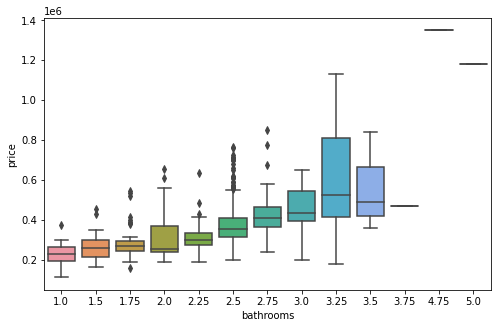

98038


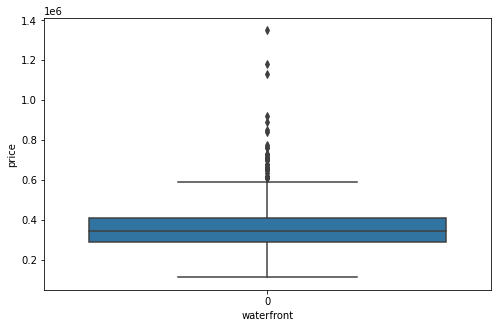

98038


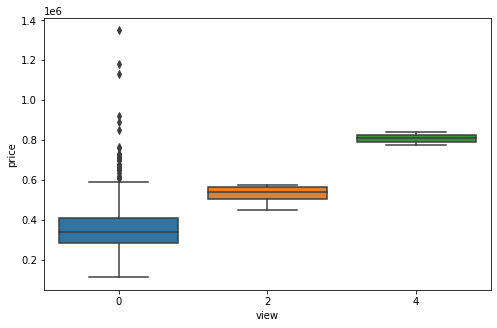

98038


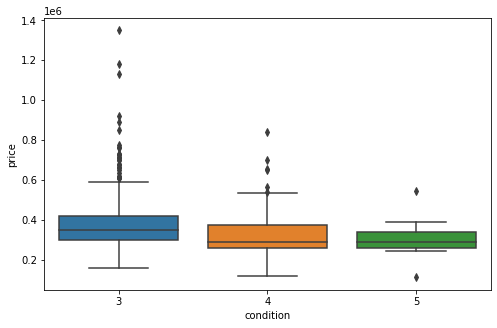

98038


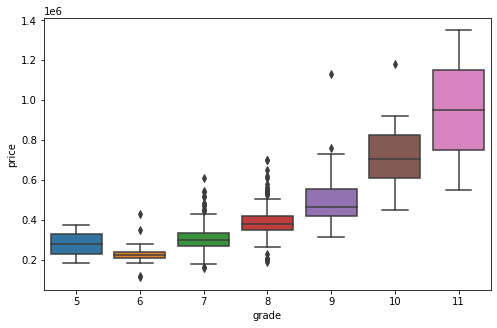

98038


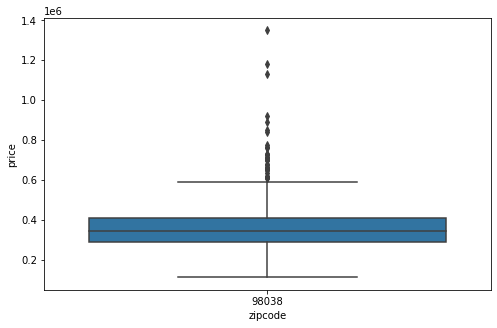

98007


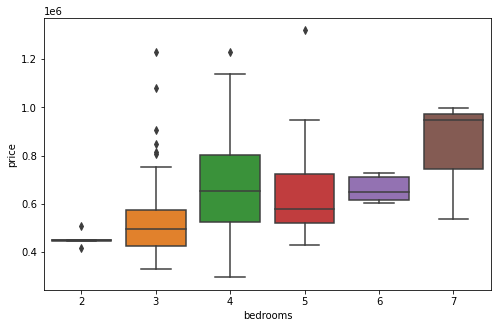

98007


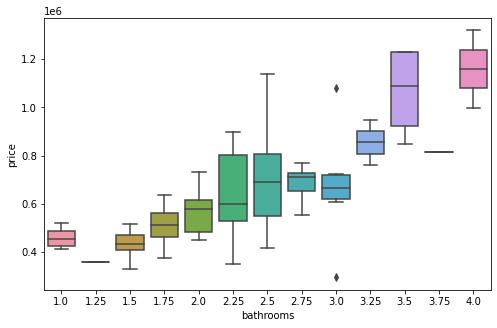

98007


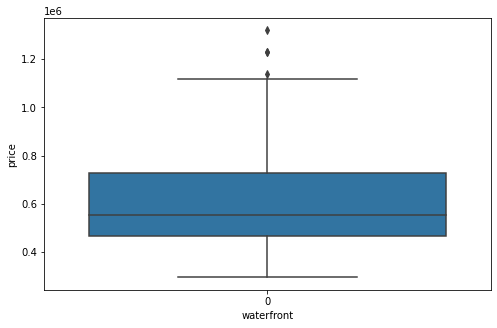

98007


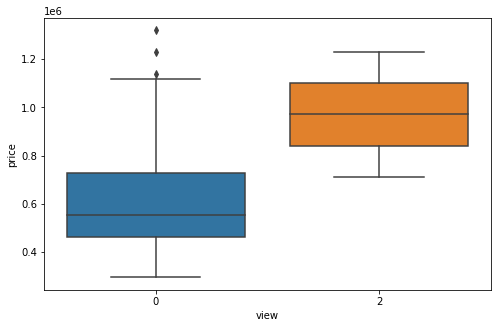

98007


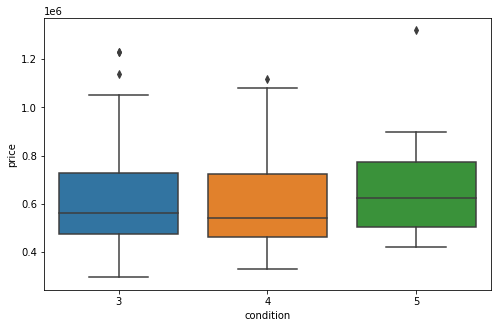

98007


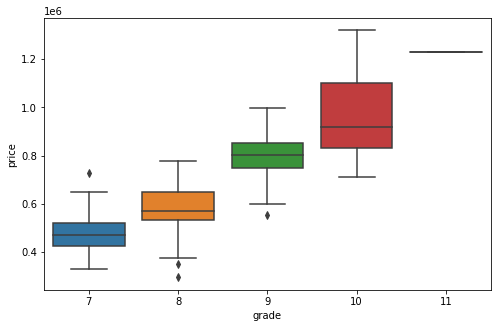

98007


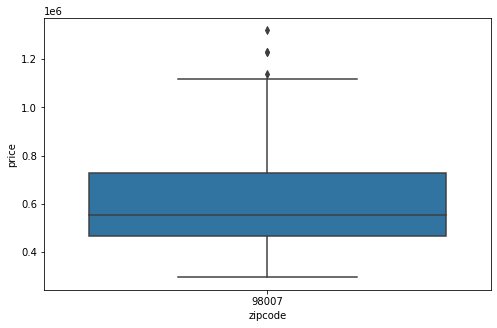

98115


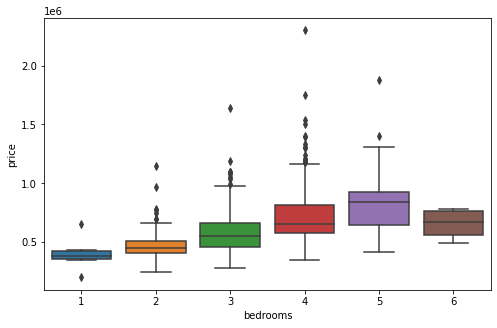

98115


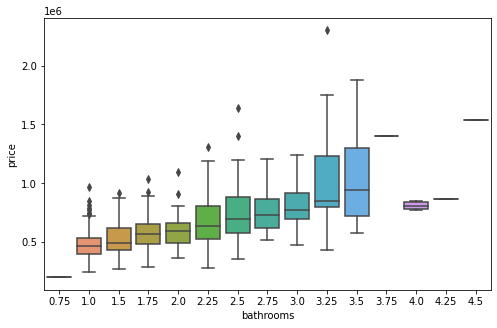

98115


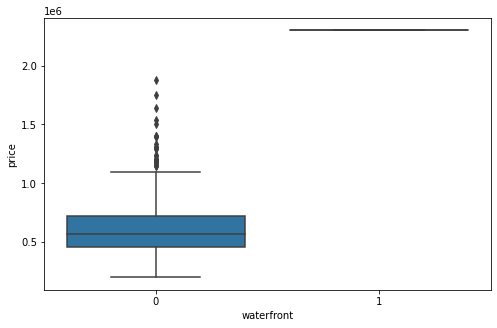

98115


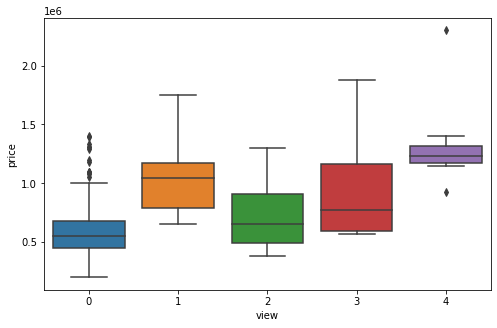

98115


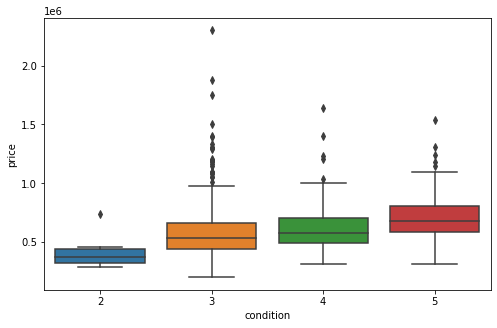

98115


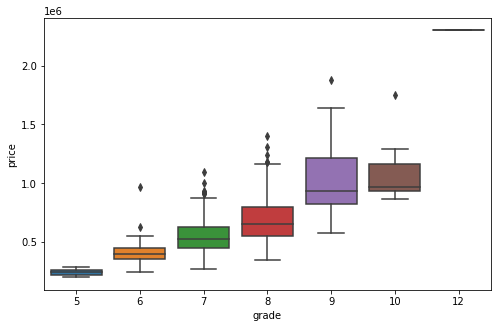

98115


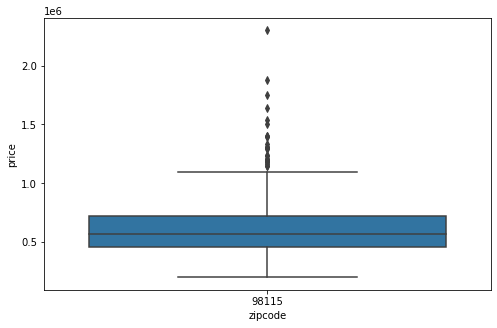

98107


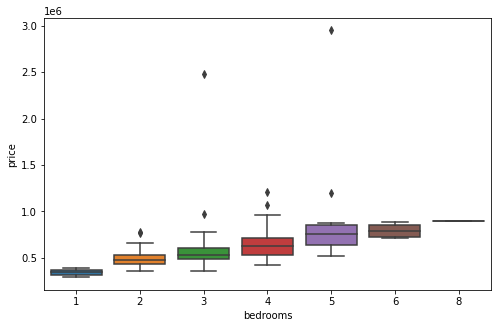

98107


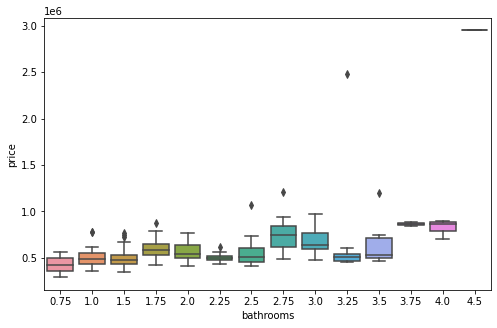

98107


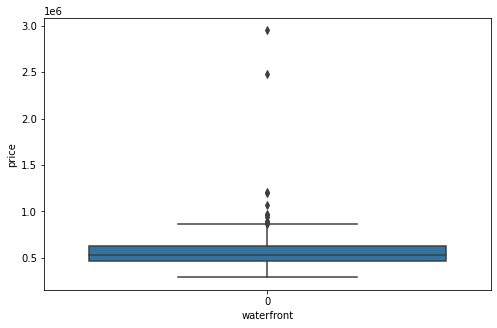

98107


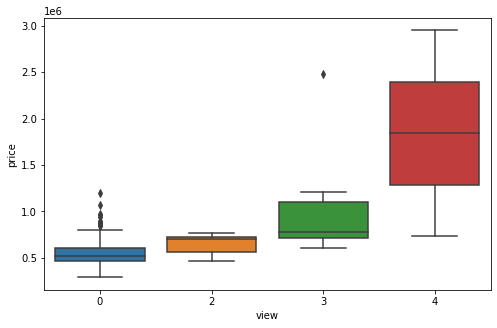

98107


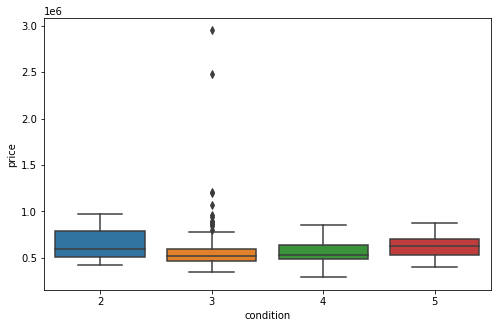

98107


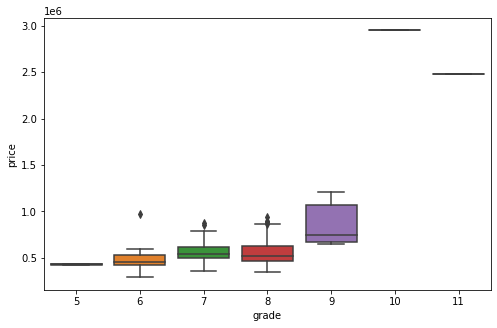

98107


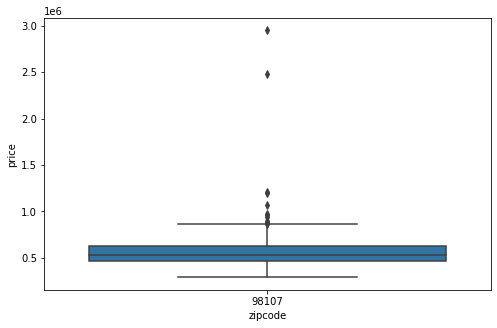

98126


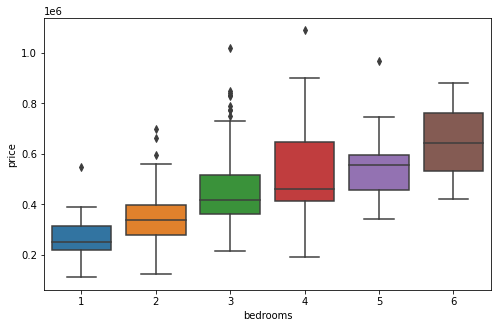

98126


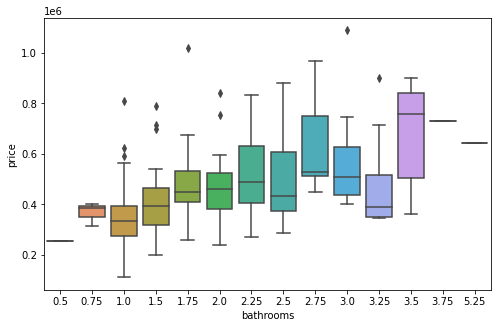

98126


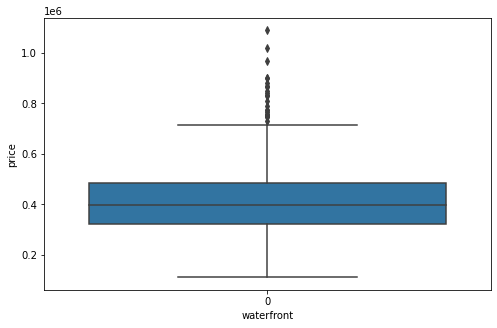

98126


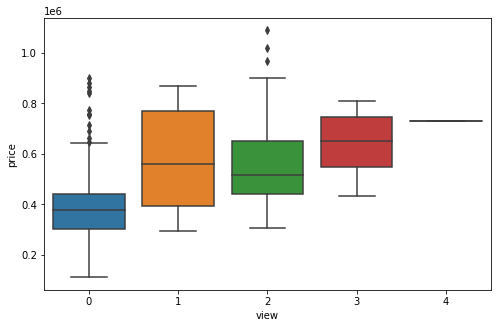

98126


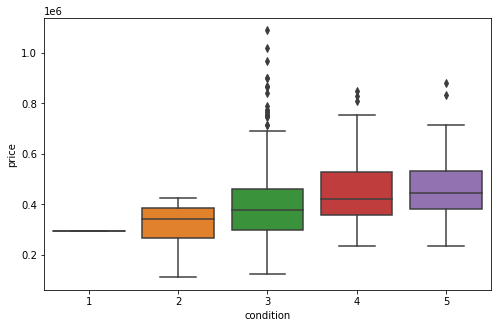

98126


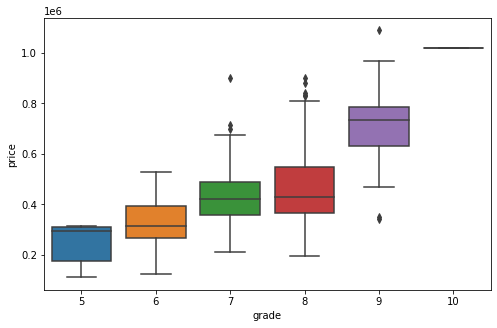

98126


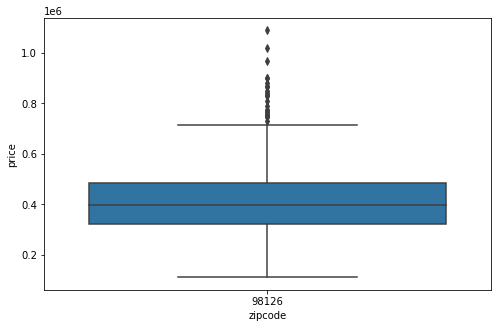

98019


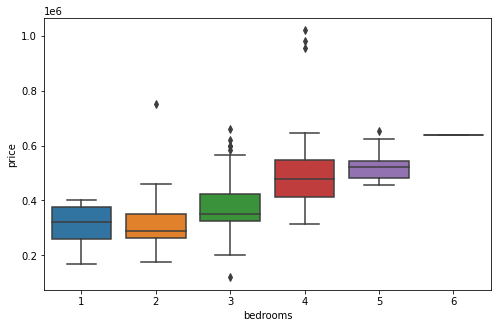

98019


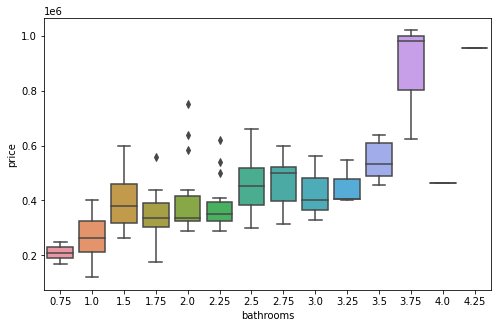

98019


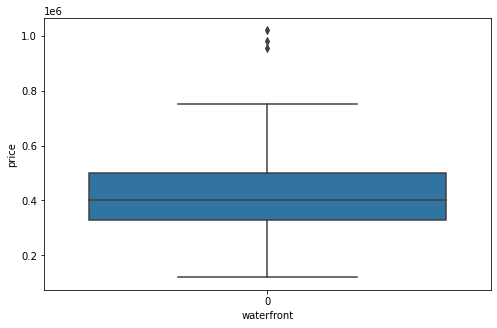

98019


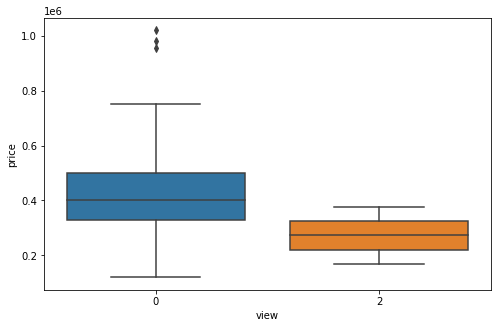

98019


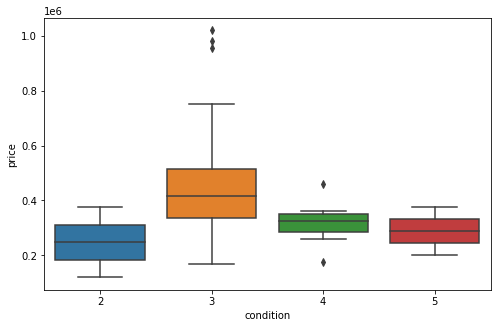

98019


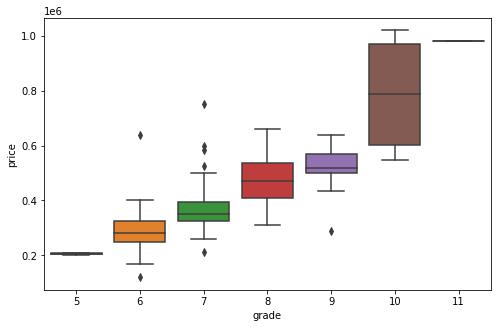

98019


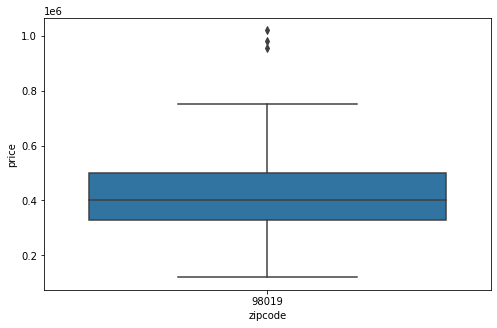

98103


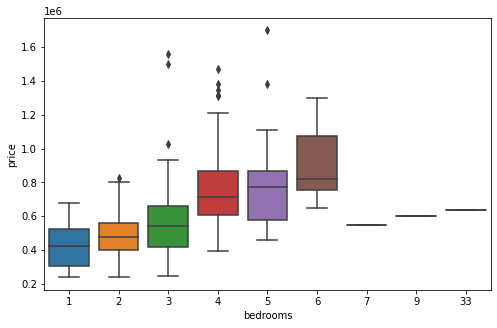

98103


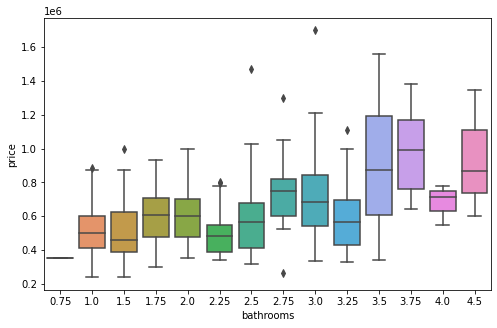

98103


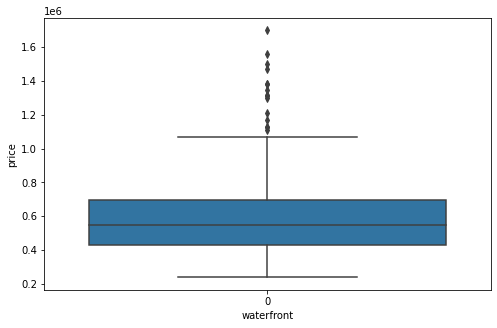

98103


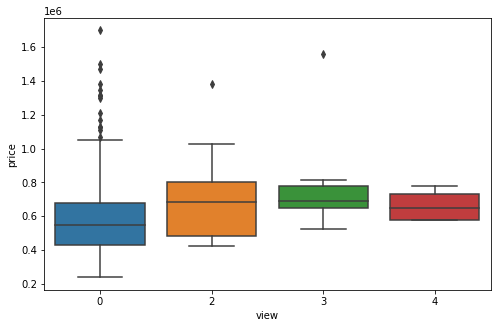

98103


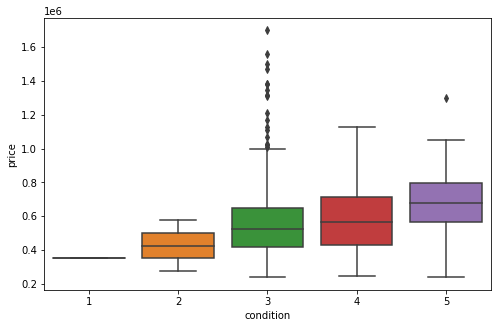

98103


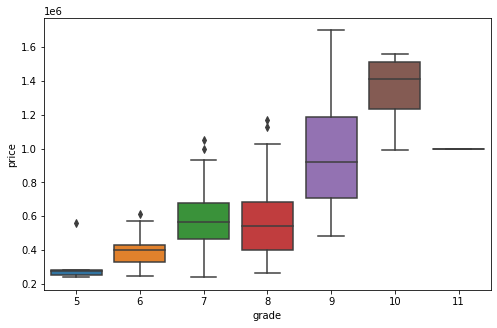

98103


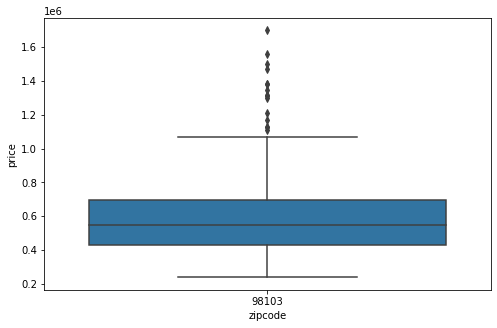

98002


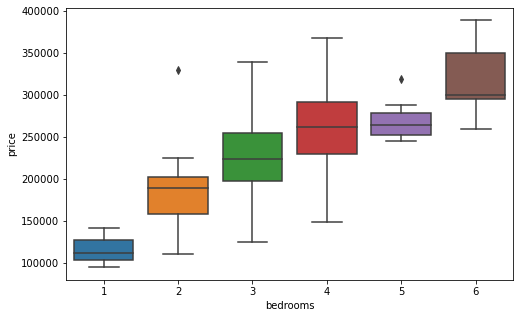

98002


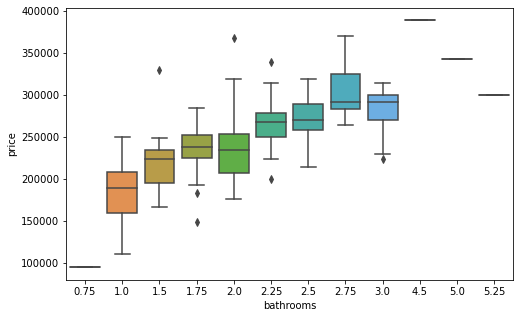

98002


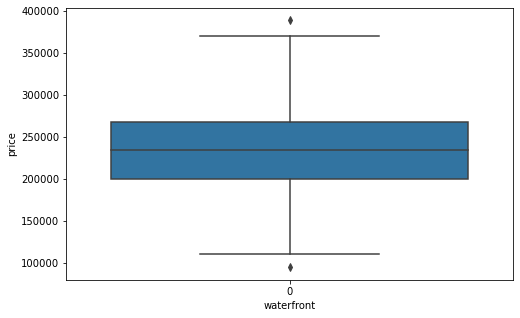

98002


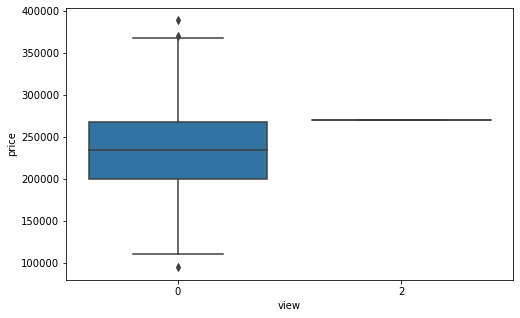

98002


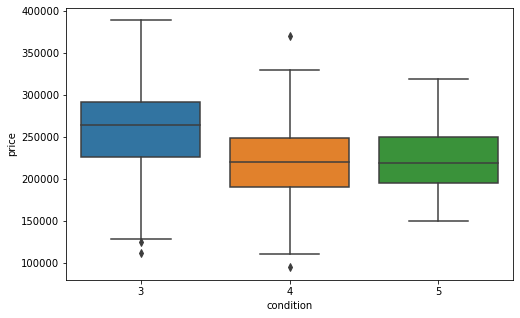

98002


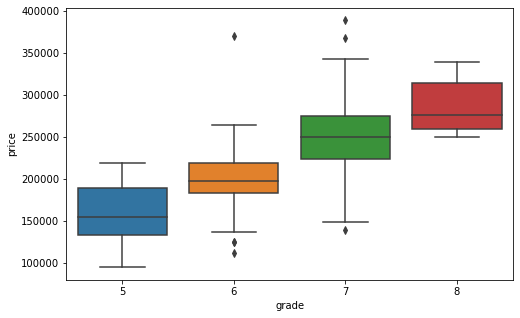

98002


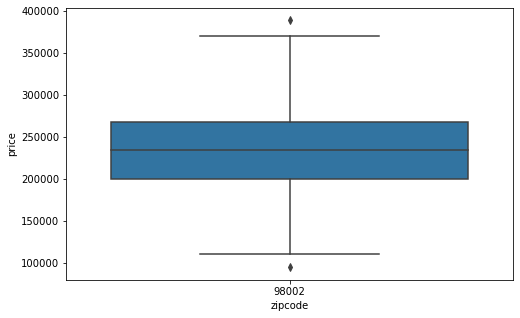

98133


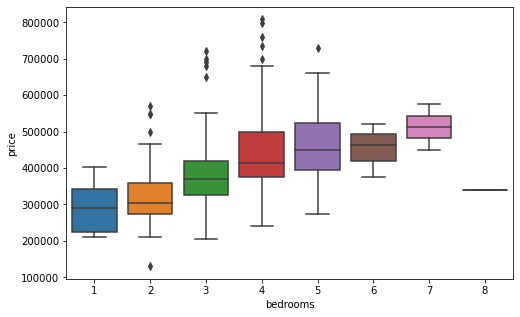

98133


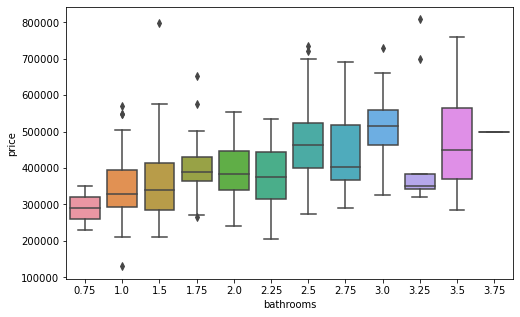

98133


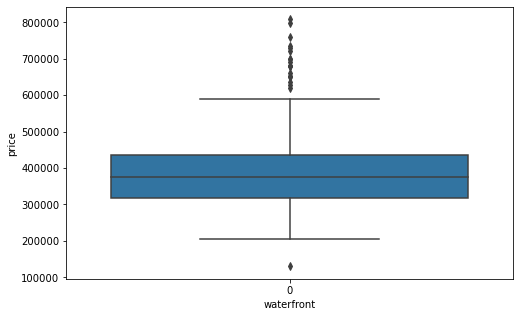

98133


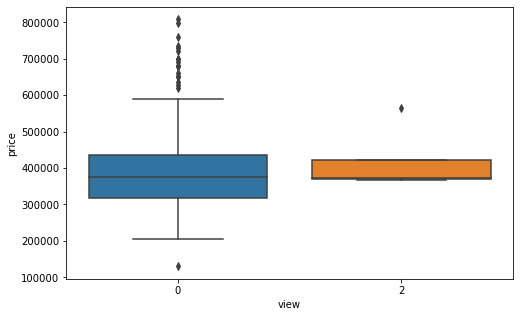

98133


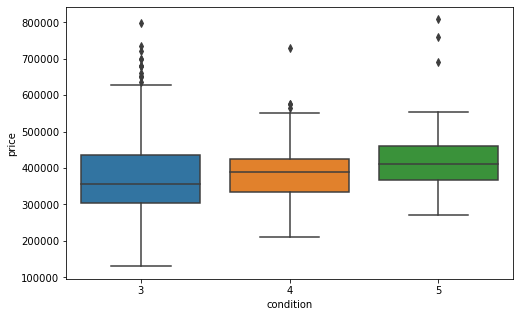

98133


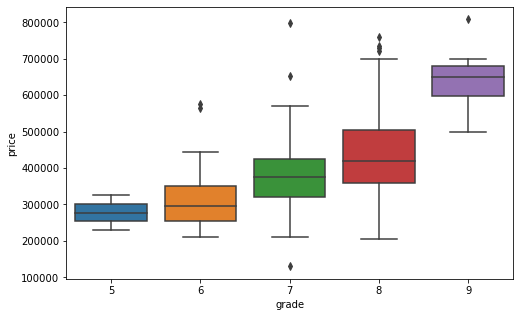

98133


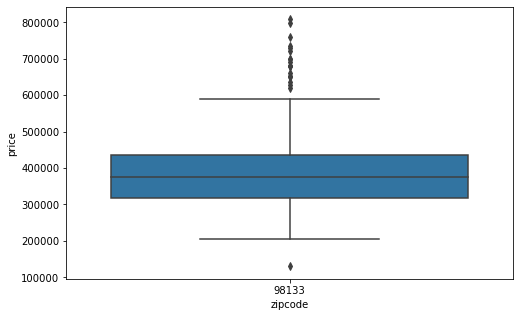

98040


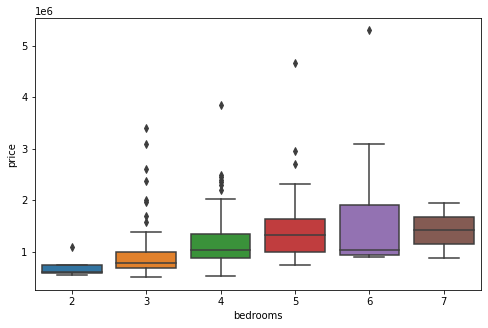

98040


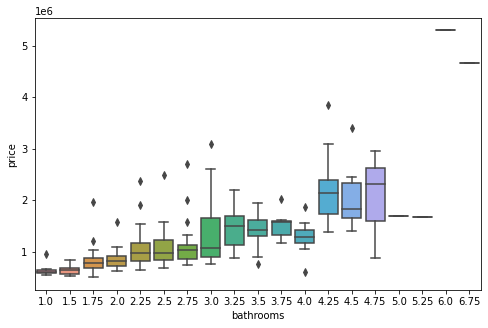

98040


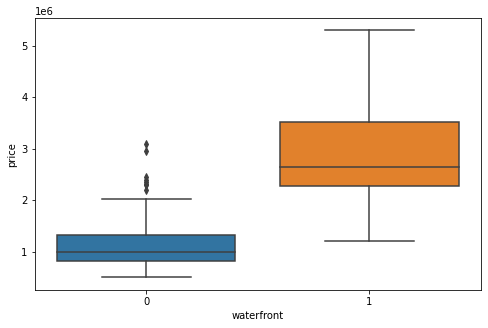

98040


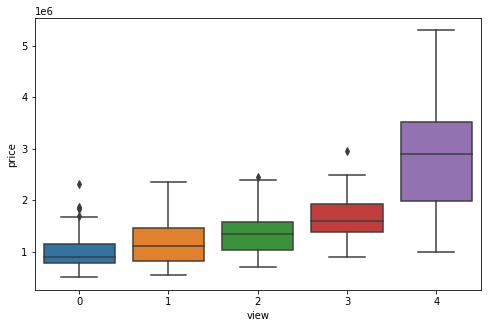

98040


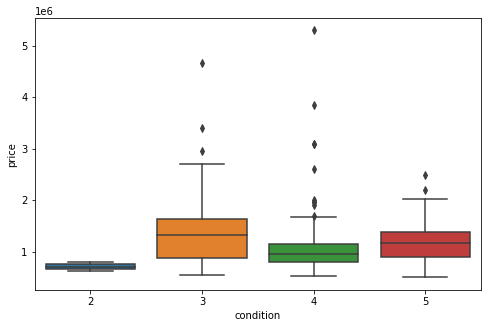

98040


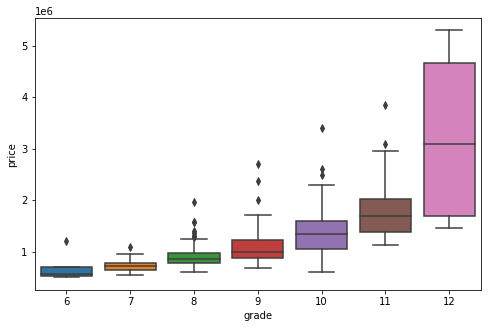

98040


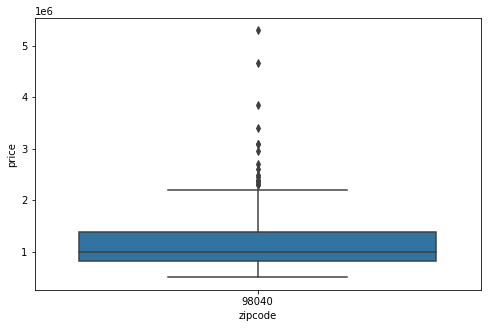

98092


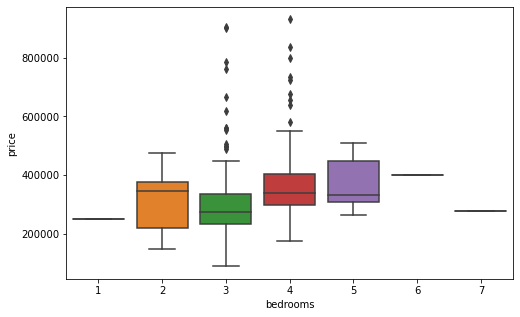

98092


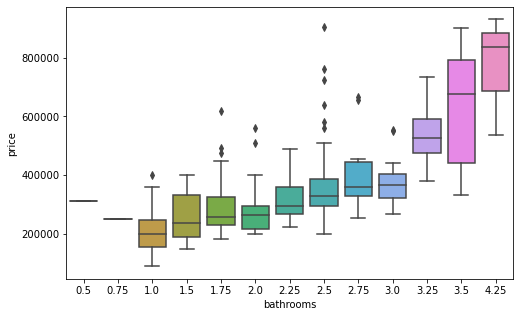

98092


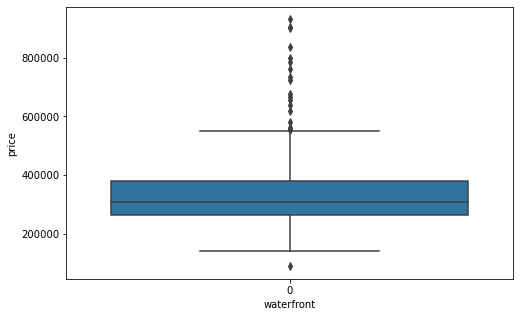

98092


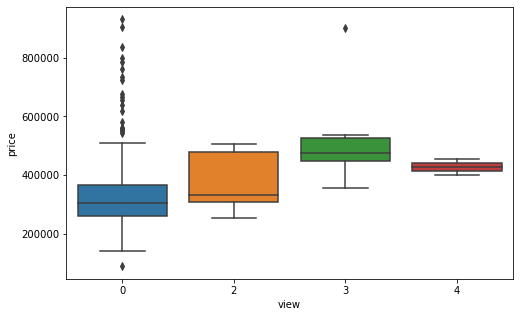

98092


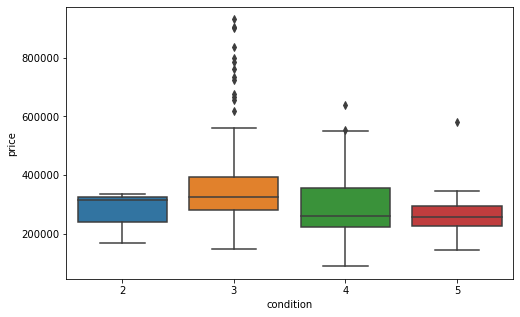

98092


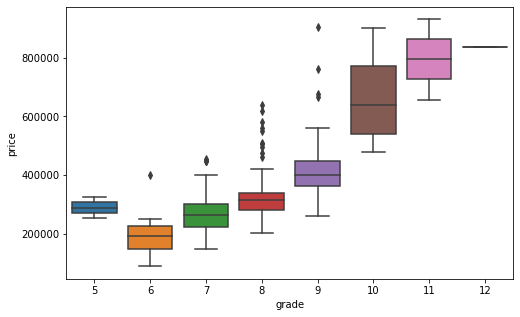

98092


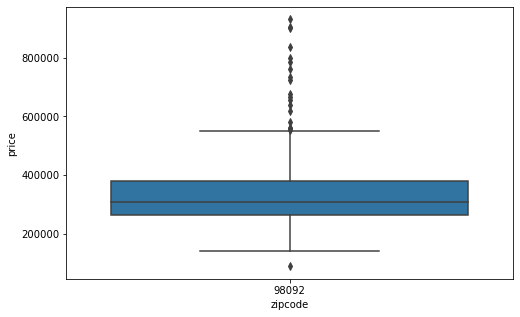

98030


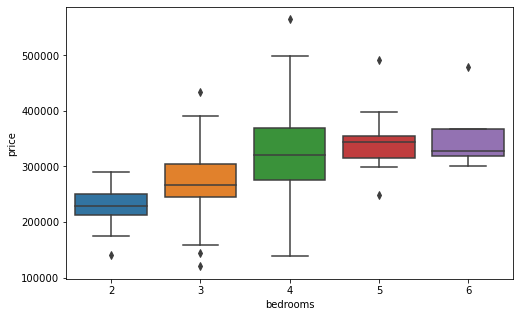

98030


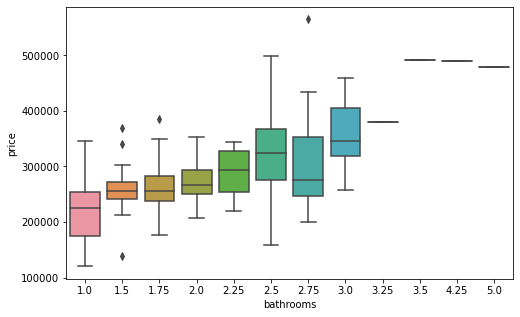

98030


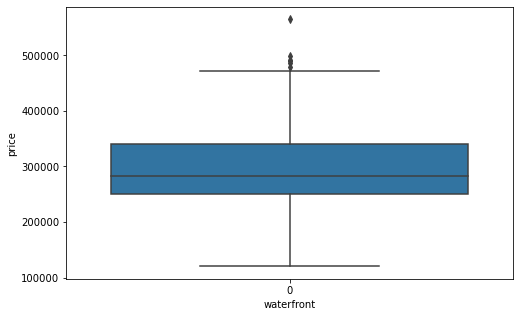

98030


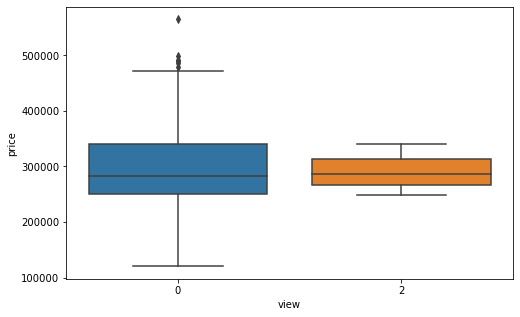

98030


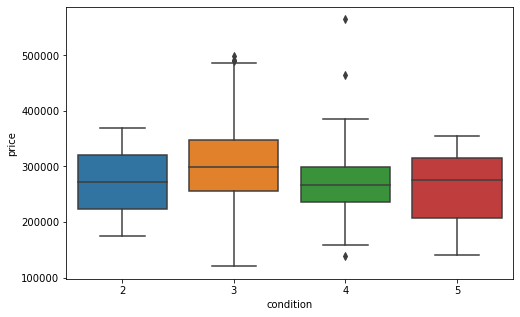

98030


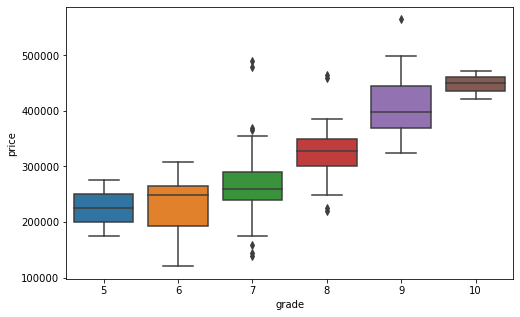

98030


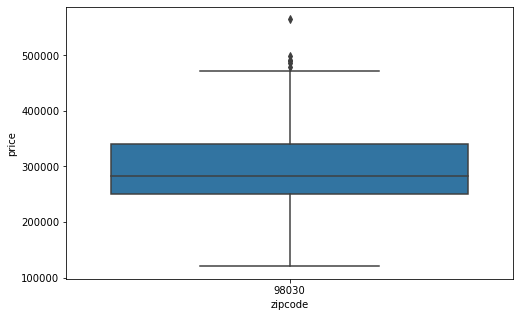

98119


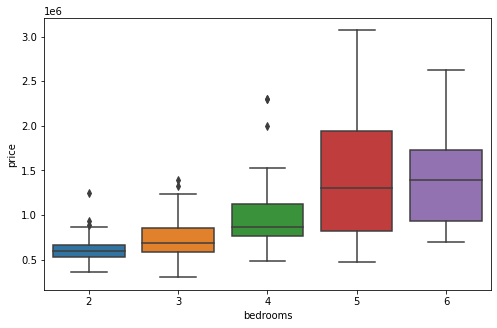

98119


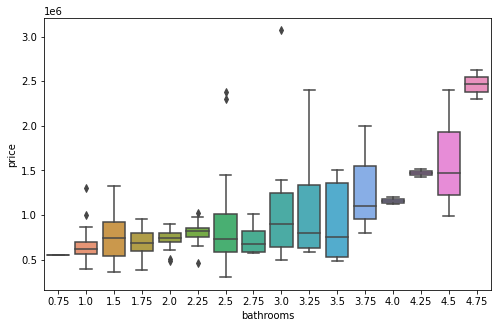

98119


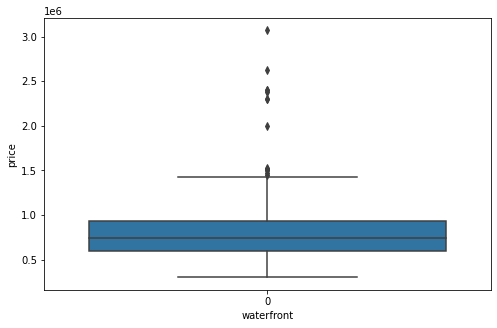

98119


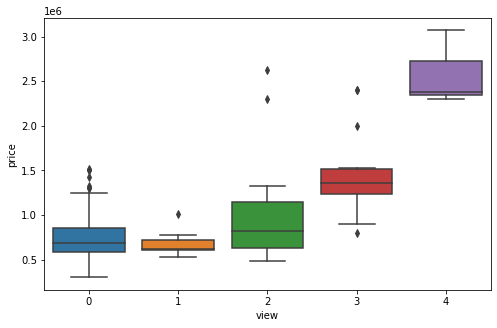

98119


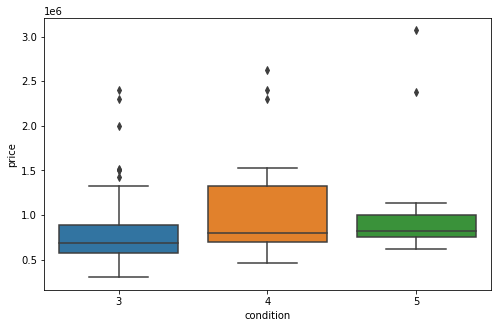

98119


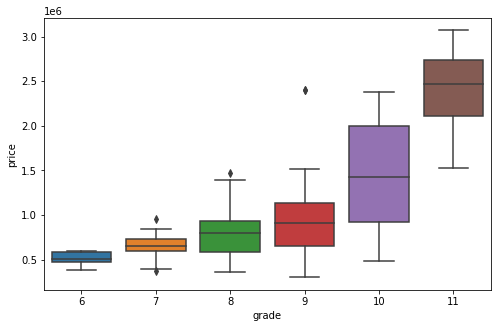

98119


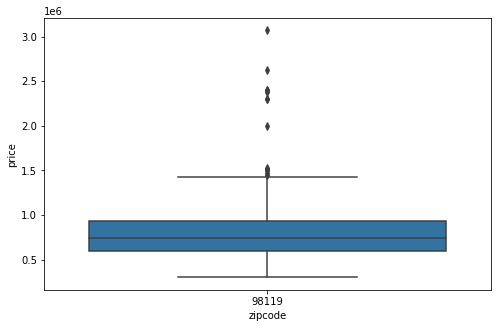

98112


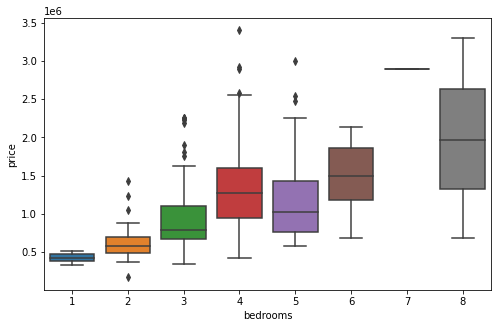

98112


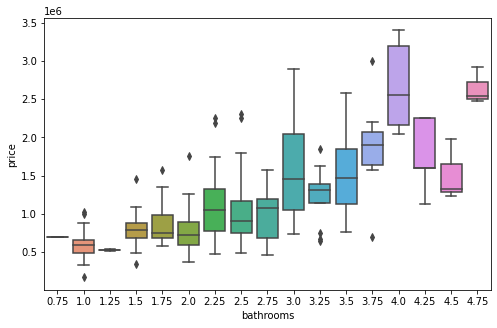

98112


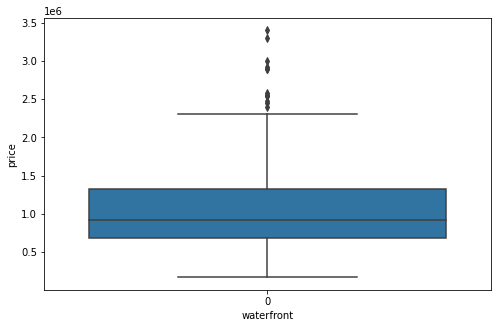

98112


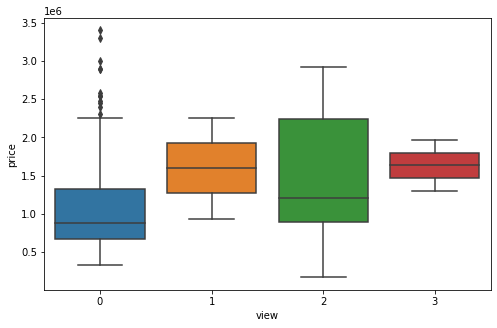

98112


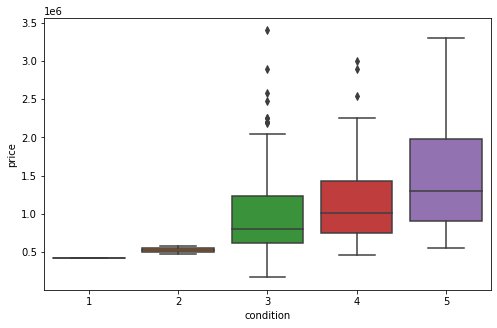

98112


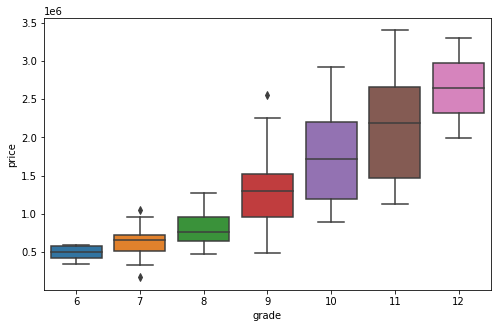

98112


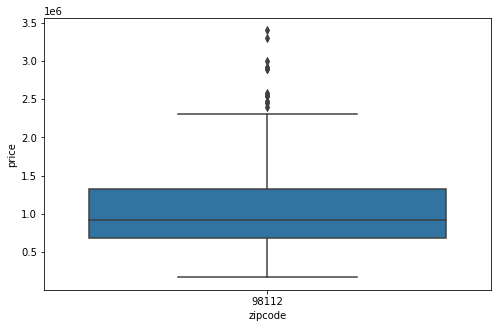

98052


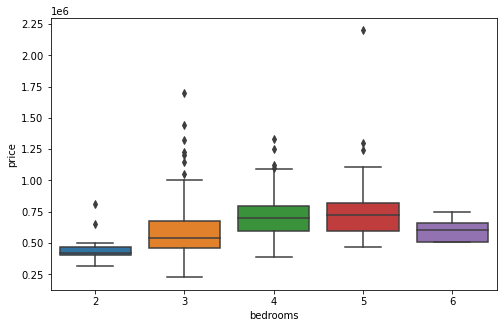

98052


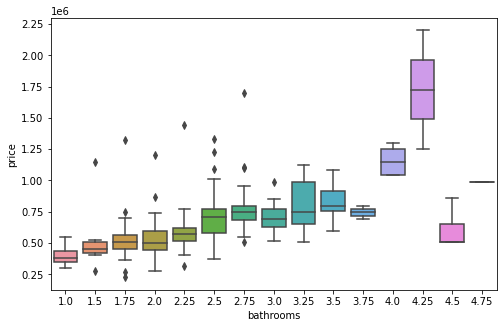

98052


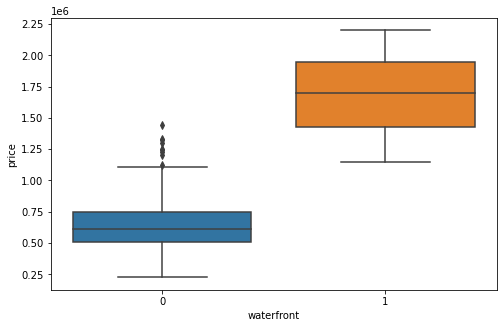

98052


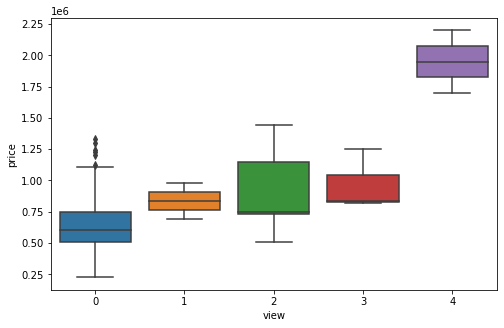

98052


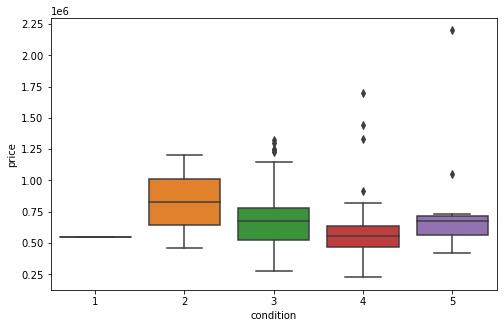

98052


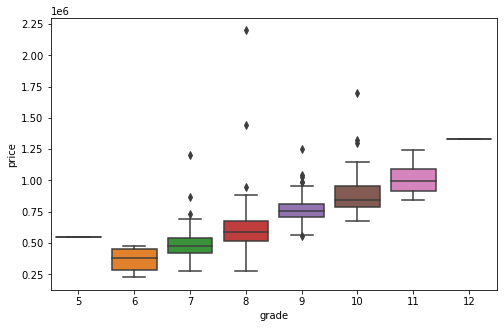

98052


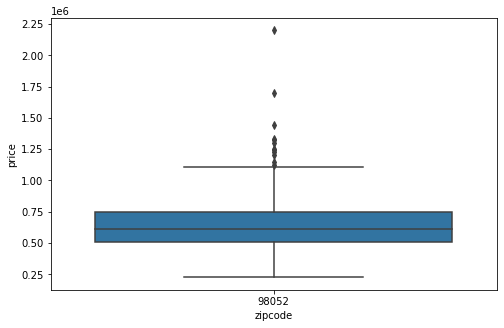

98027


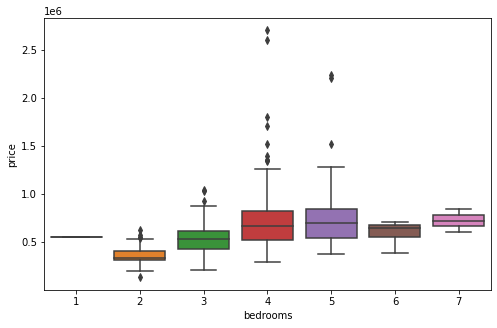

98027


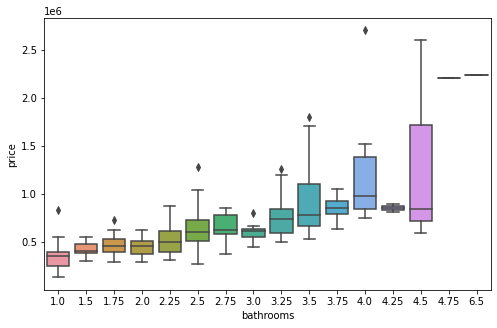

98027


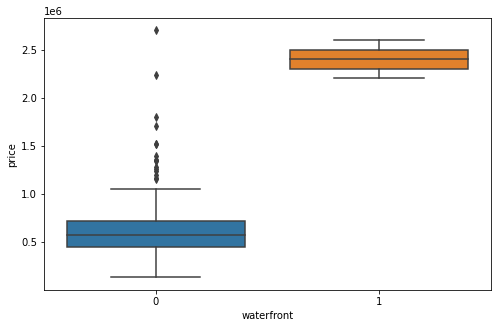

98027


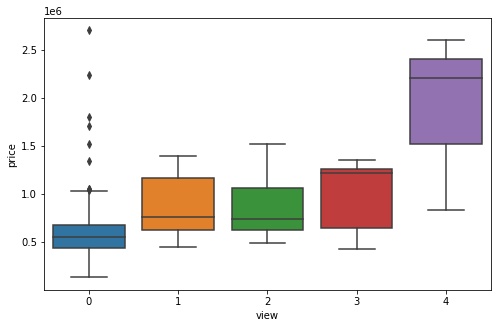

98027


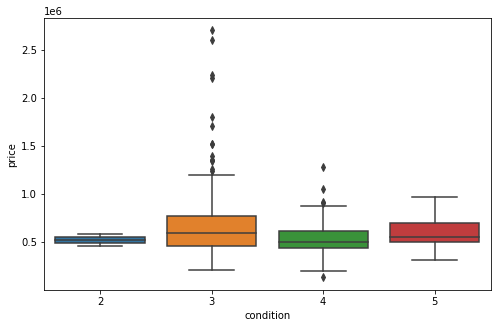

98027


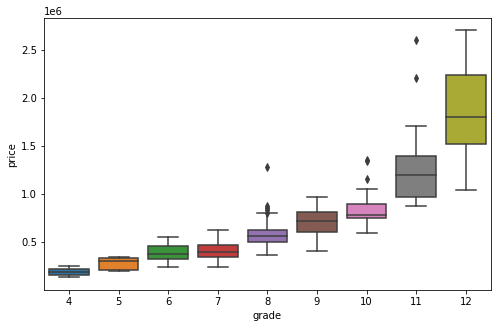

98027


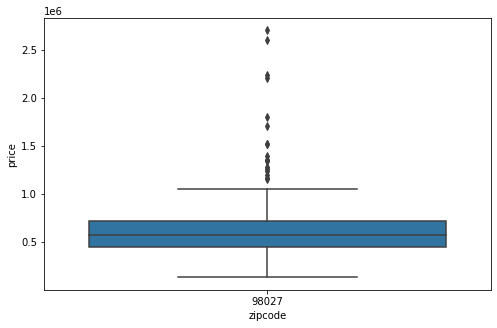

98117


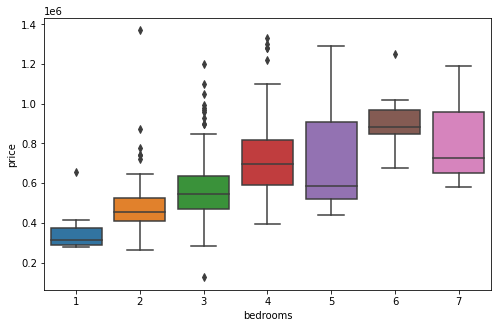

98117


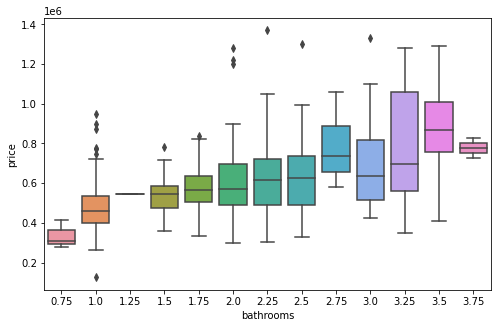

98117


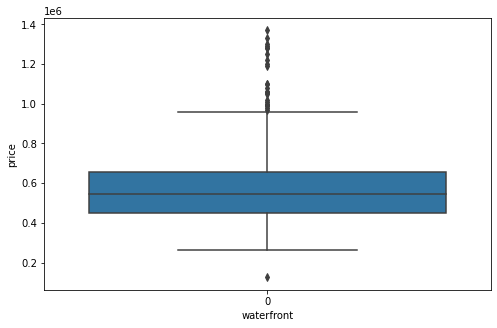

98117


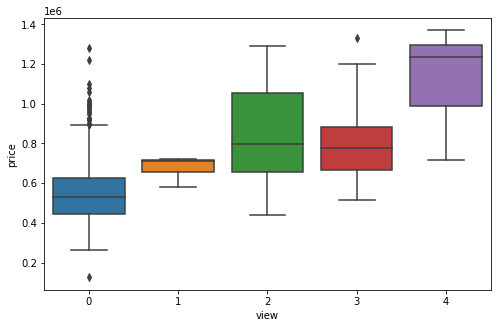

98117


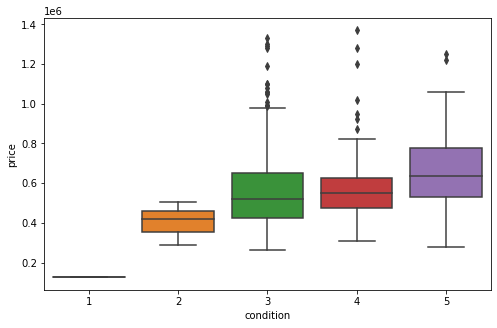

98117


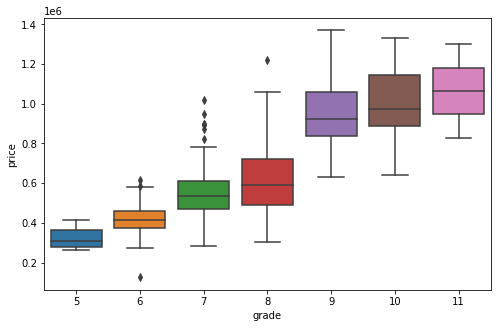

98117


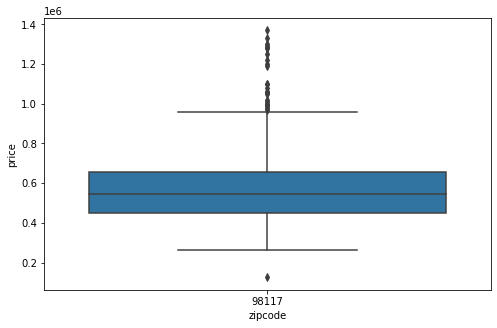

98058


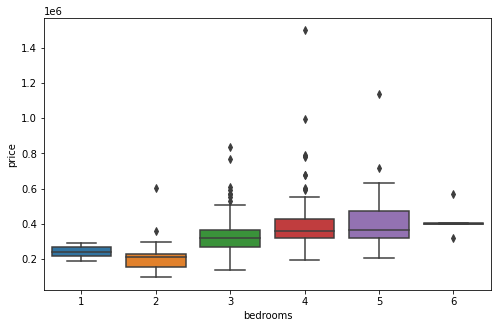

98058


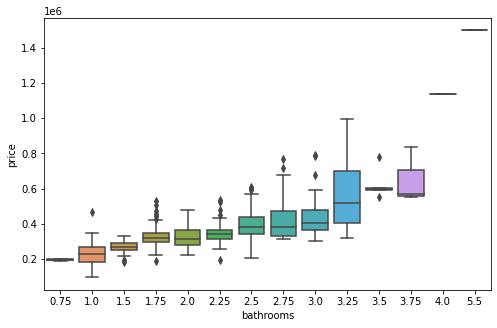

98058


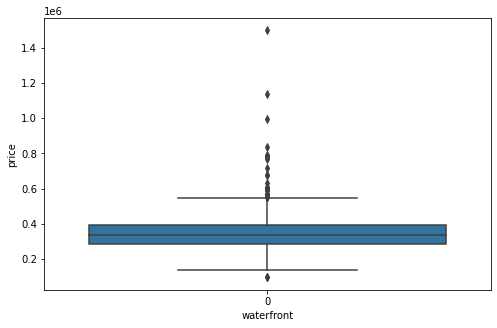

98058


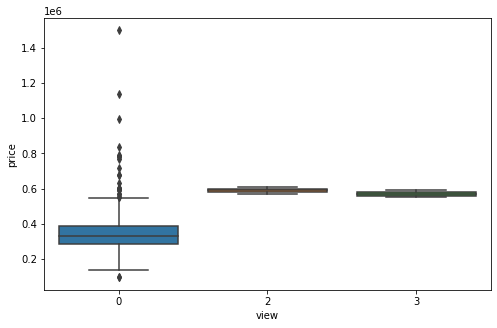

98058


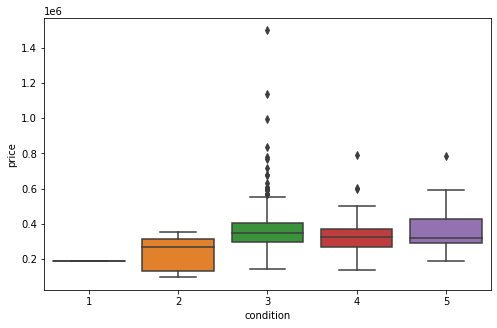

98058


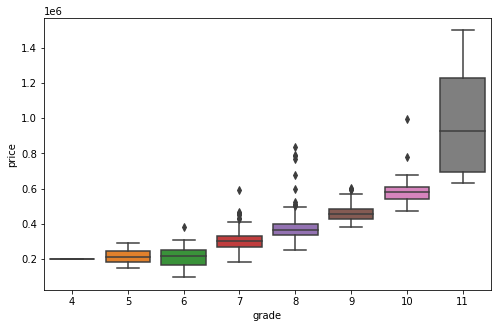

98058


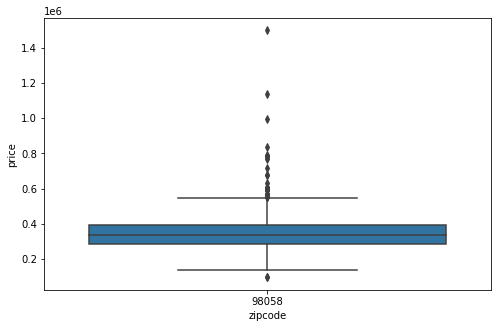

98001


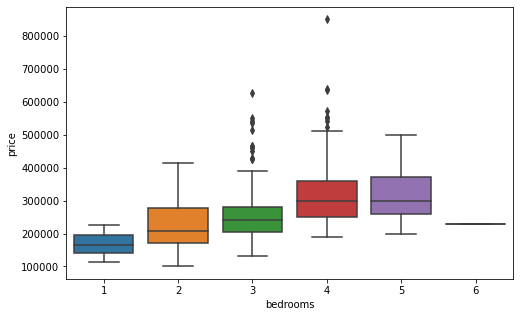

98001


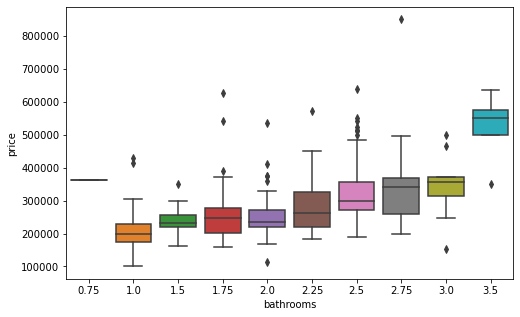

98001


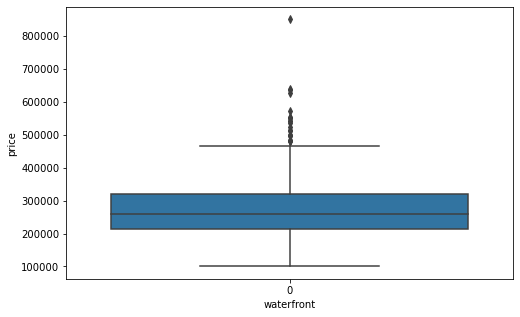

98001


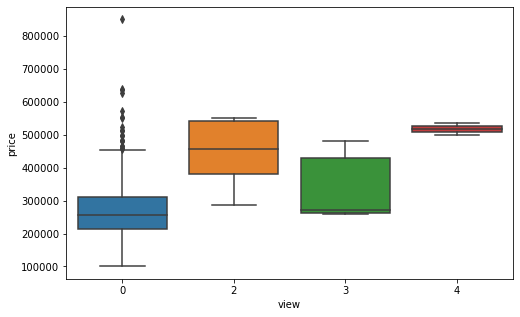

98001


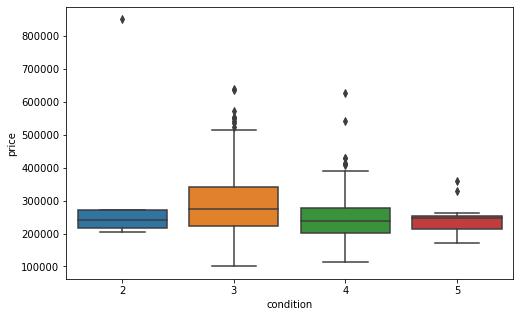

98001


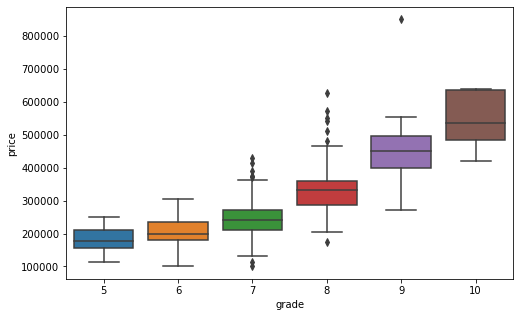

98001


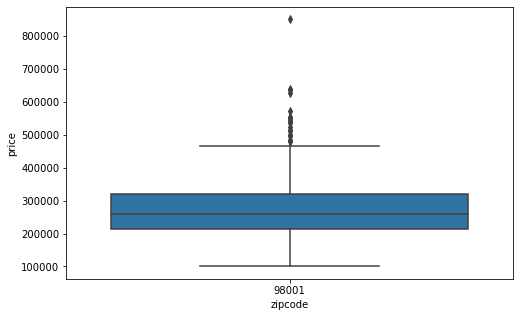

98056


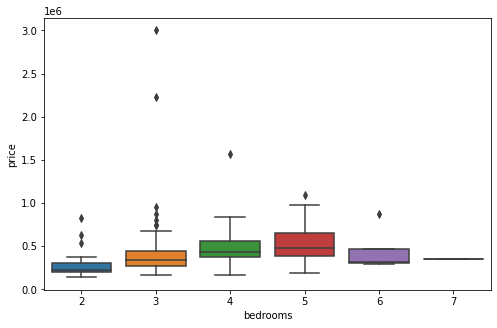

98056


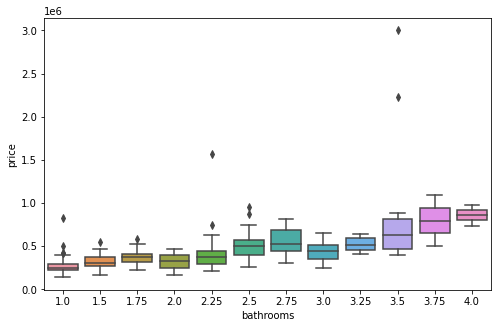

98056


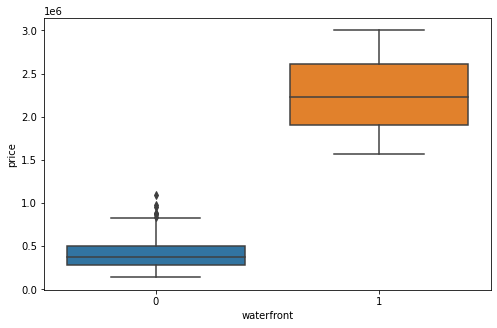

98056


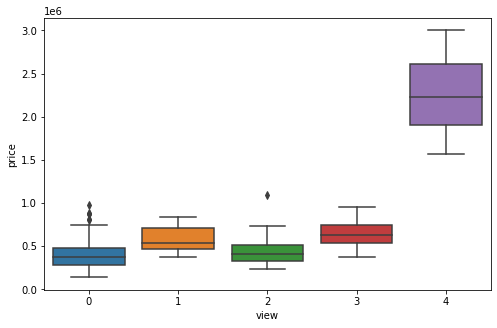

98056


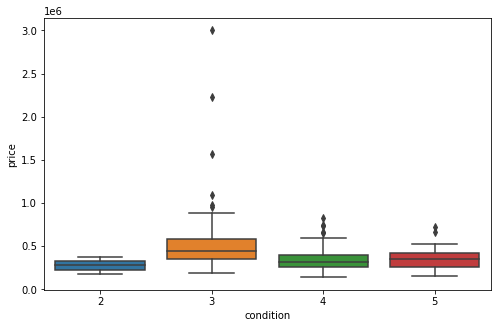

98056


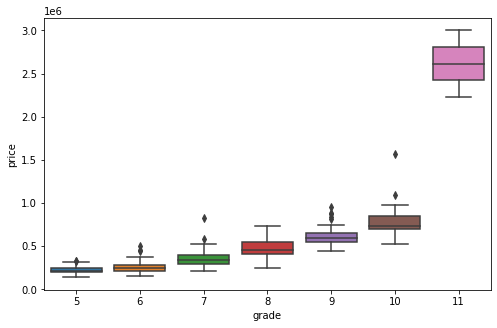

98056


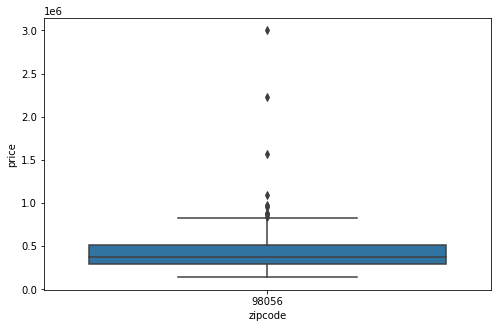

98166


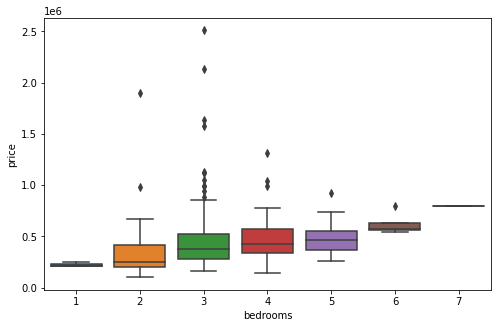

98166


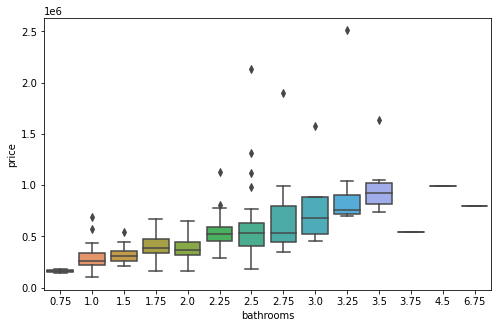

98166


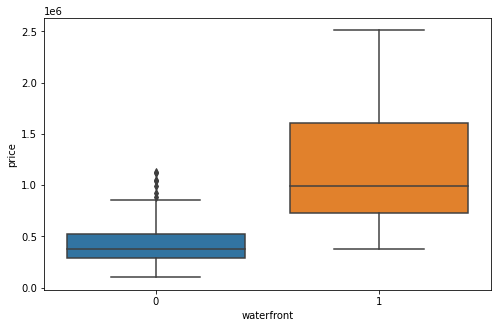

98166


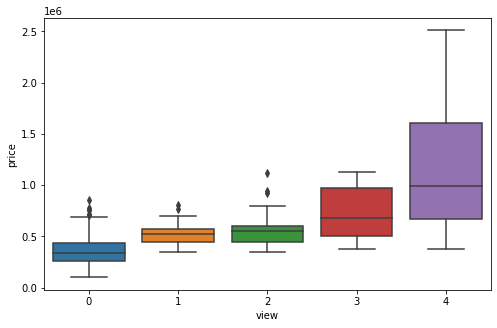

98166


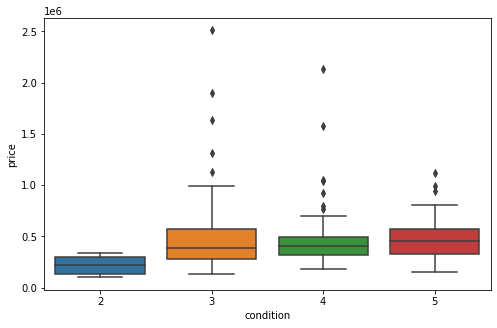

98166


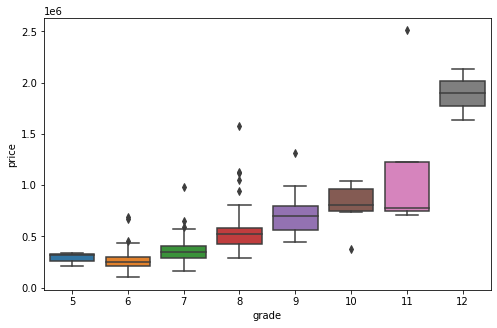

98166


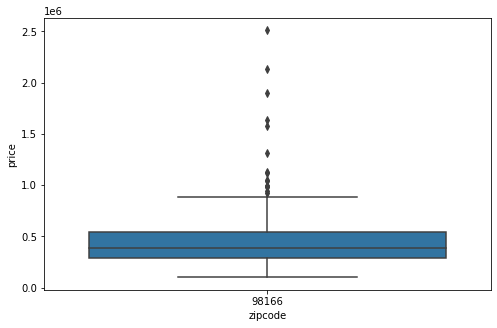

98023


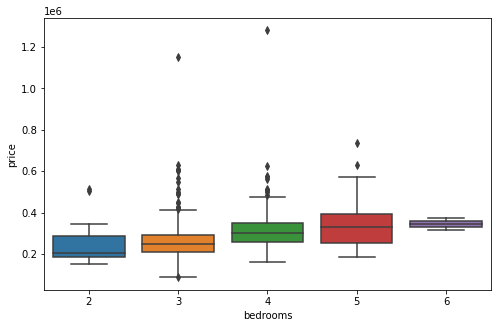

98023


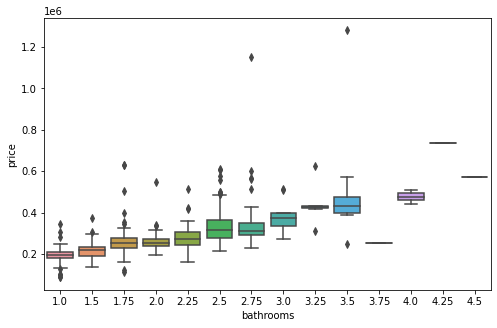

98023


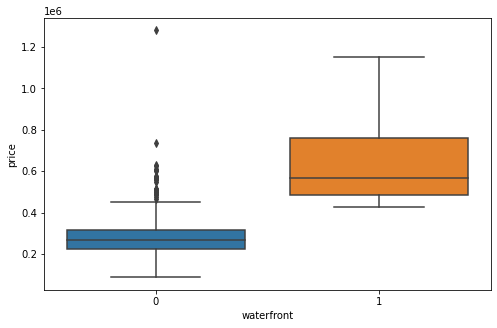

98023


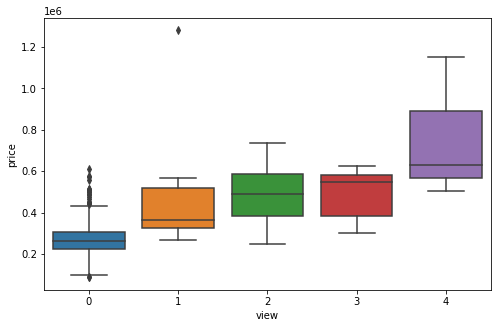

98023


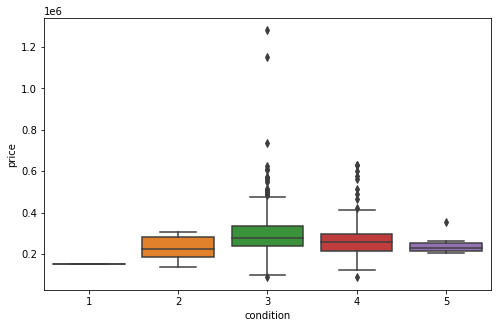

98023


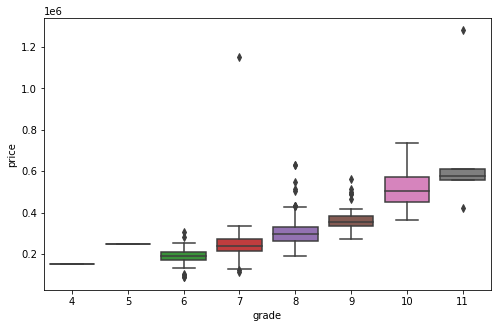

98023


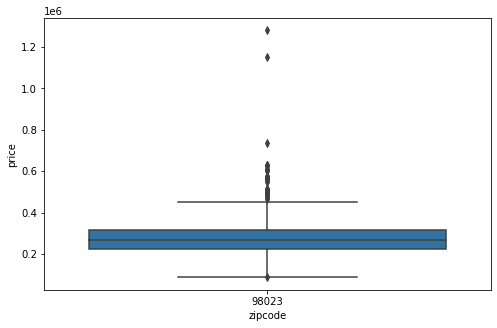

98070


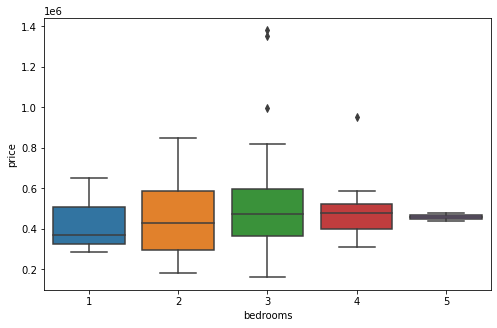

98070


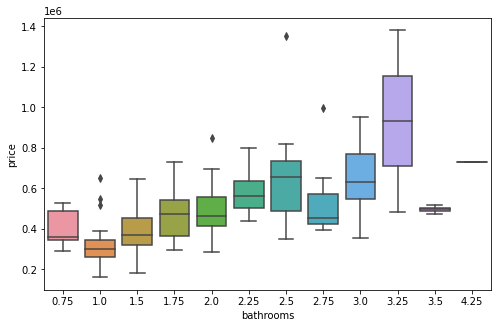

98070


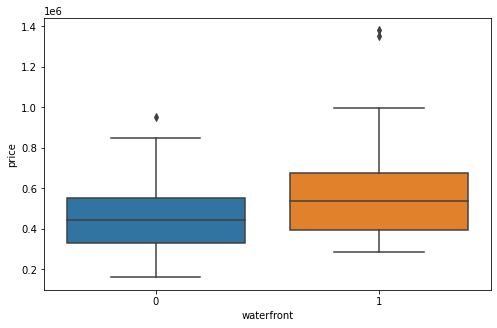

98070


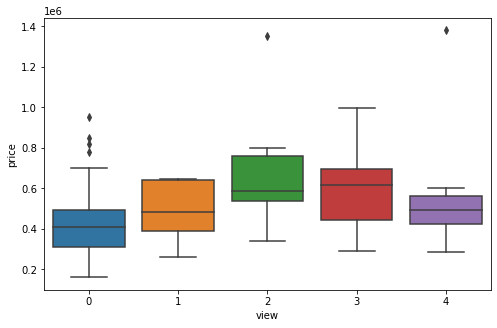

98070


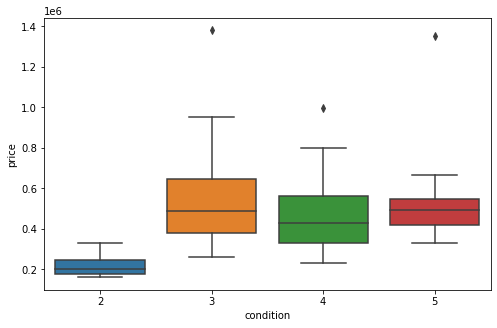

98070


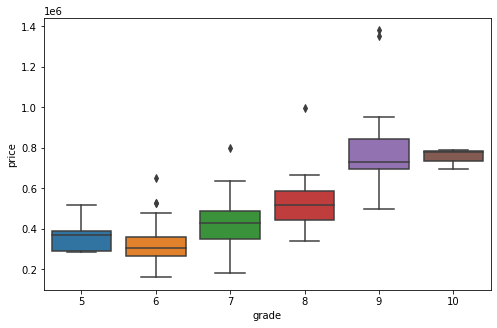

98070


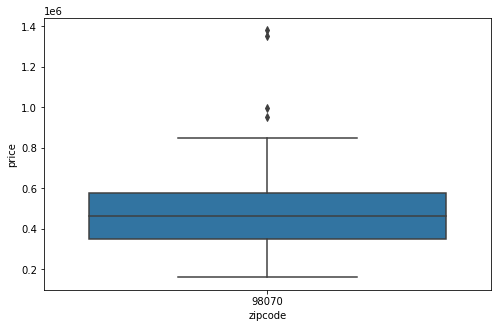

98148


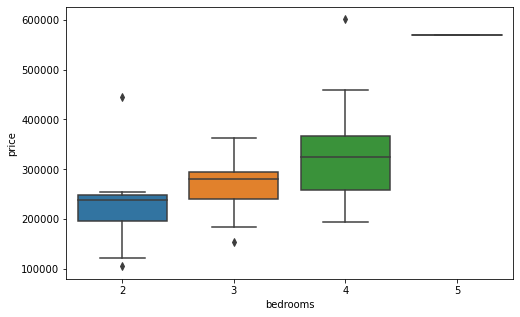

98148


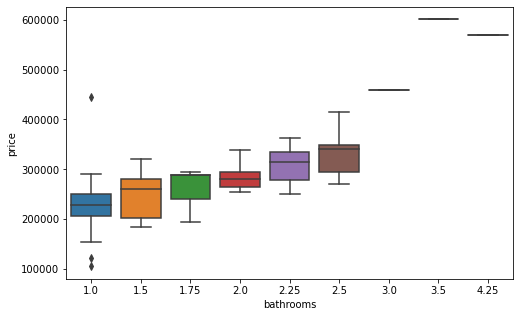

98148


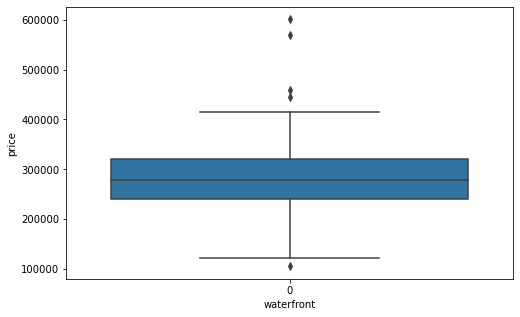

98148


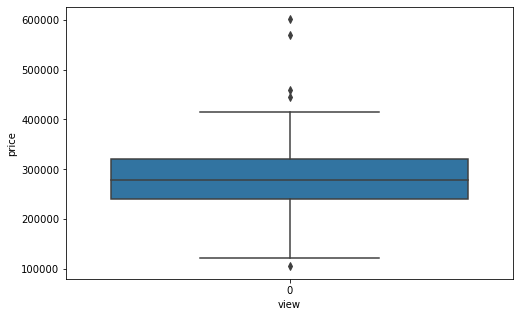

98148


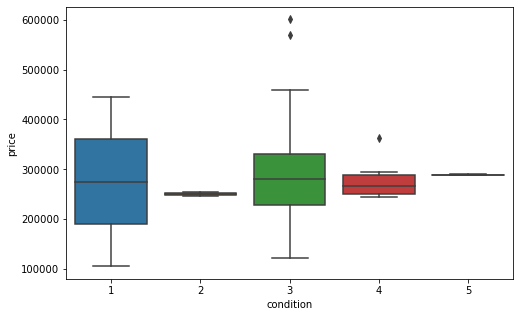

98148


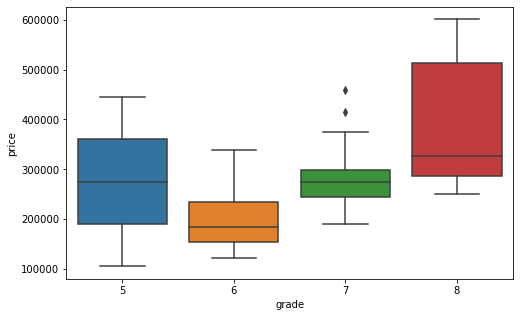

98148


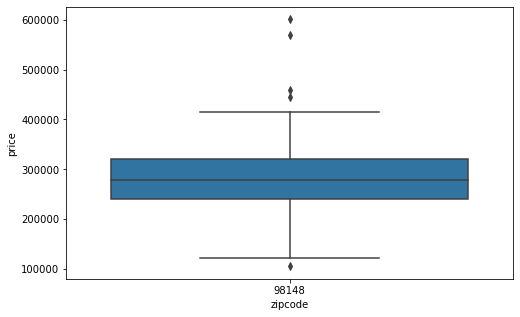

98105


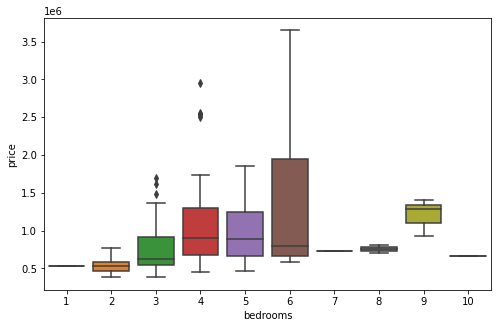

98105


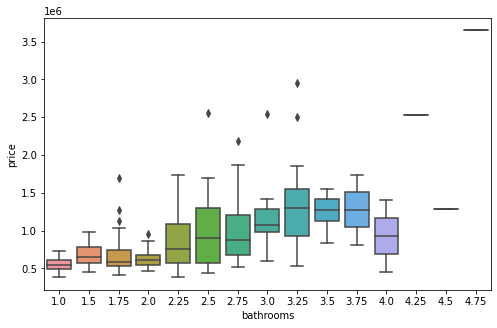

98105


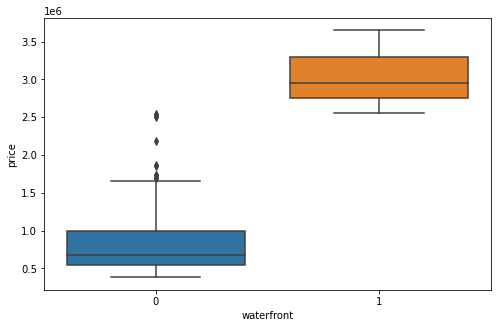

98105


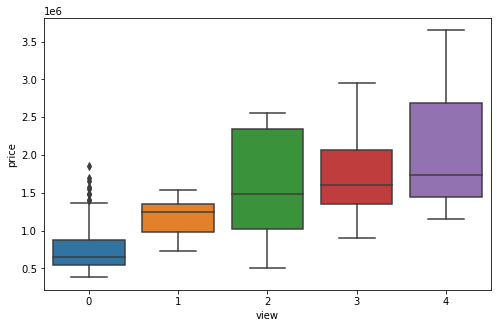

98105


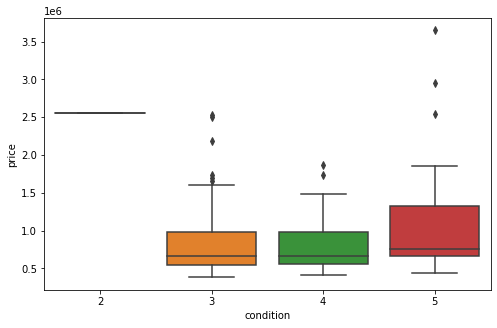

98105


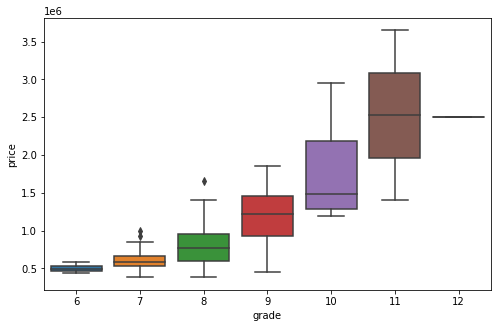

98105


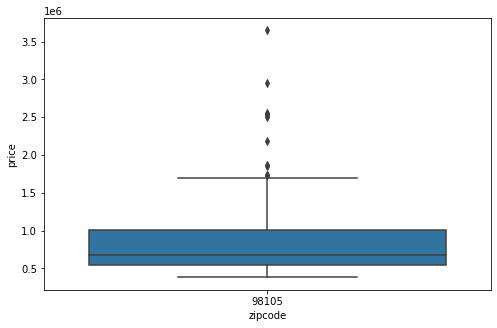

98042


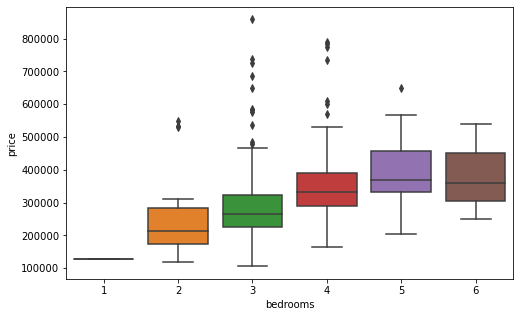

98042


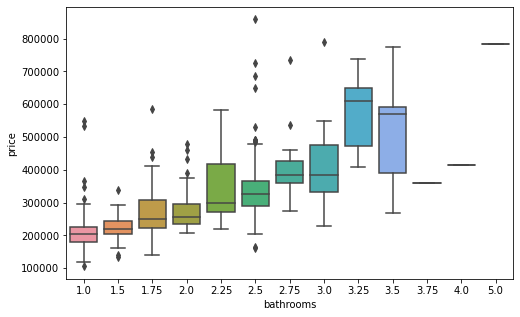

98042


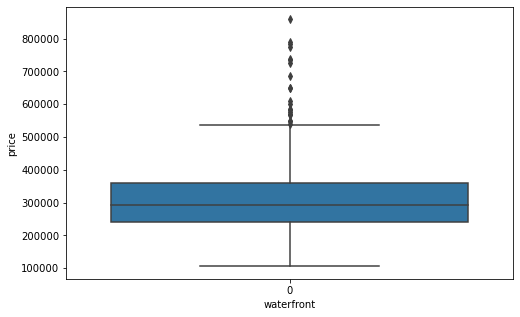

98042


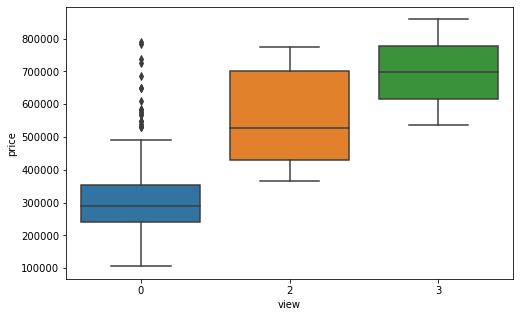

98042


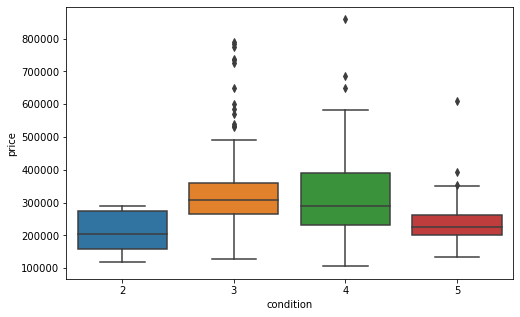

98042


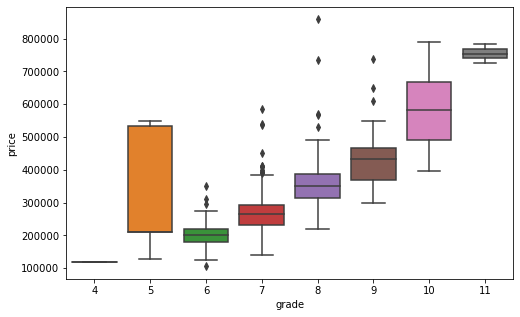

98042


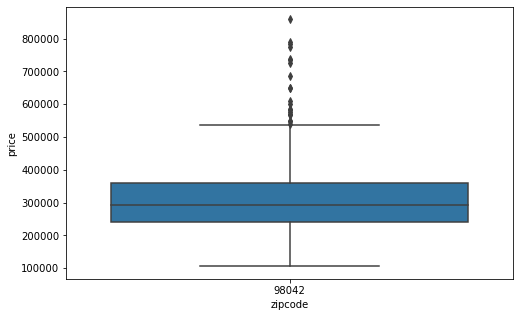

98008


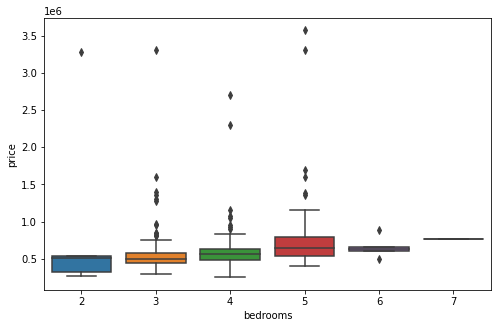

98008


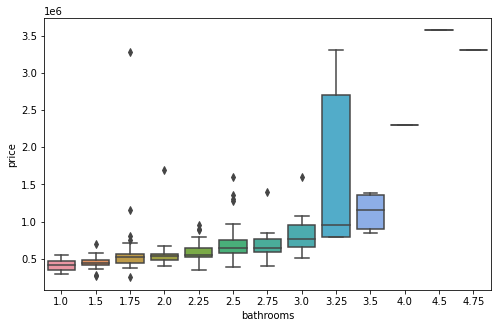

98008


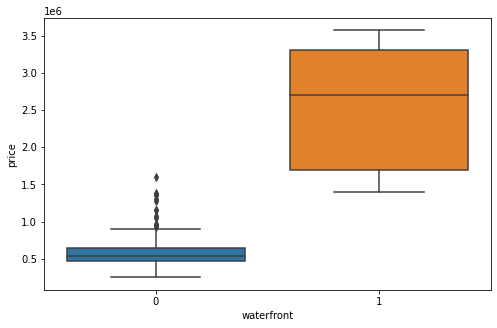

98008


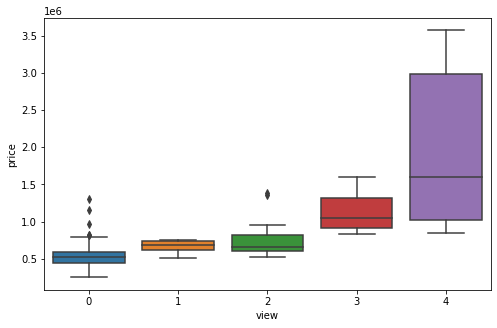

98008


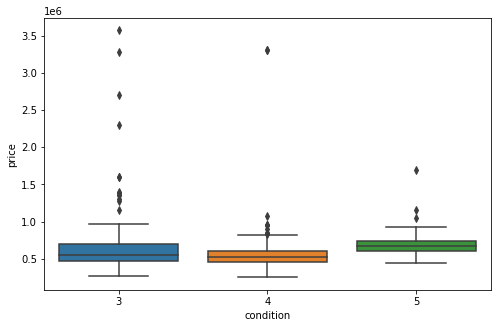

98008


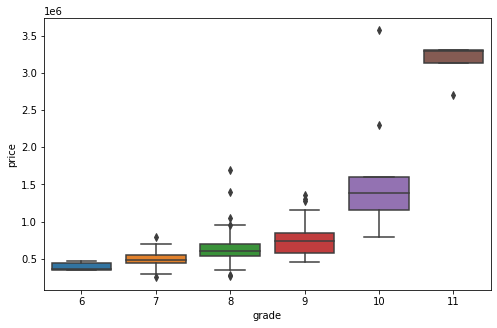

98008


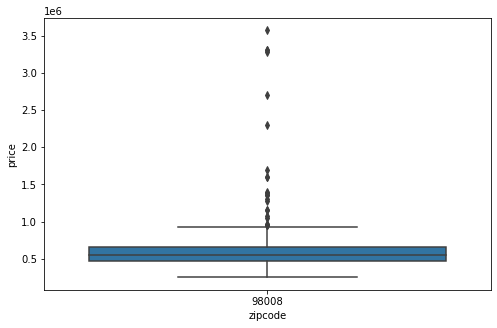

98059


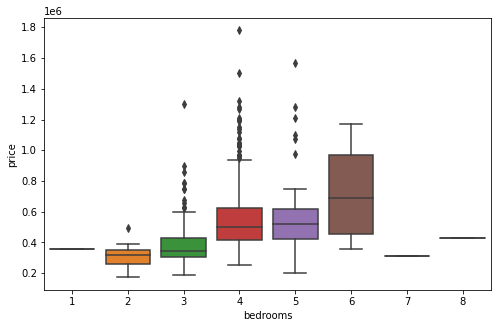

98059


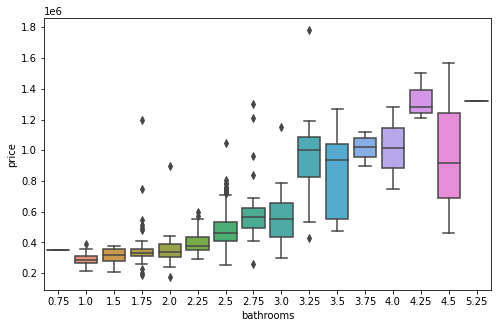

98059


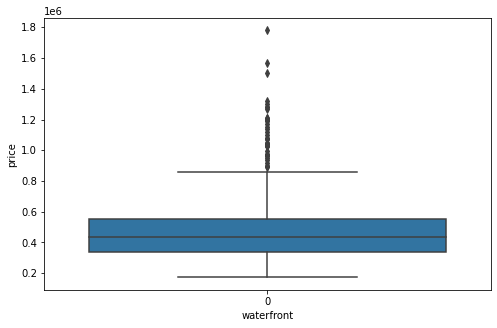

98059


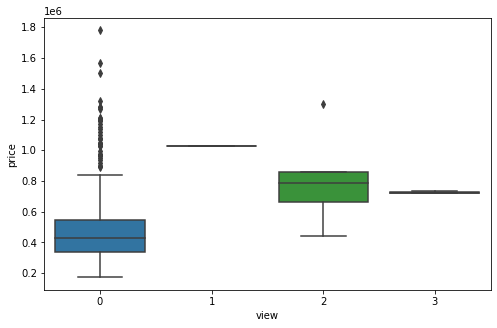

98059


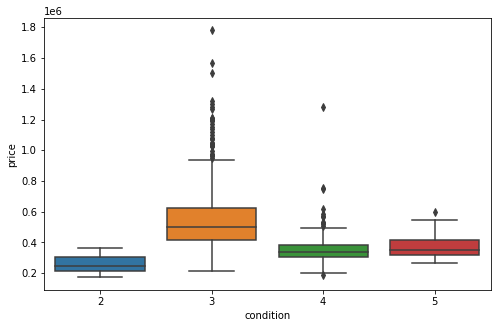

98059


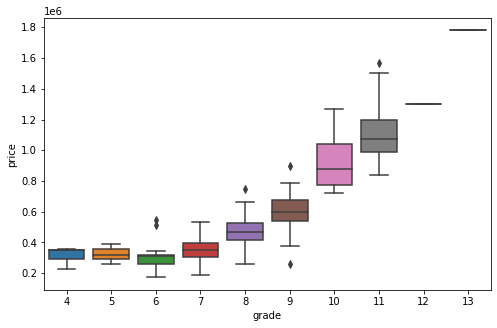

98059


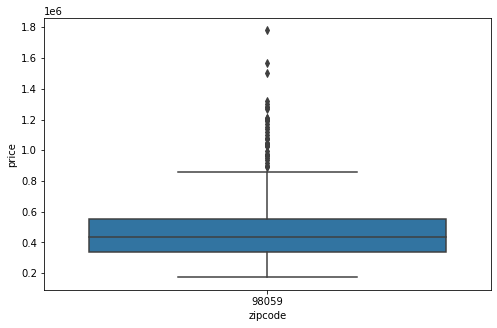

98122


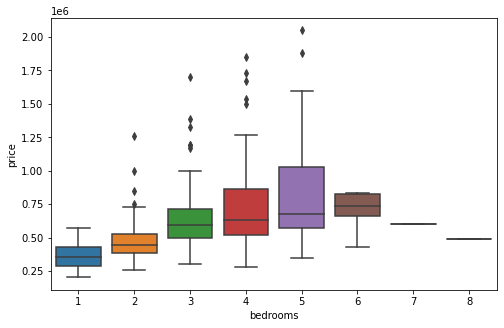

98122


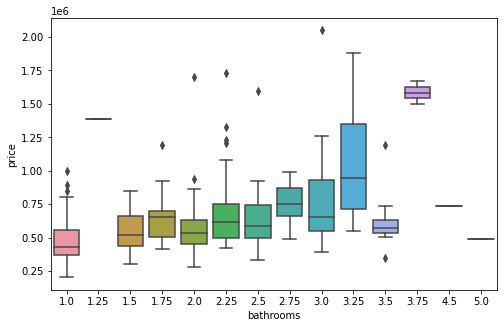

98122


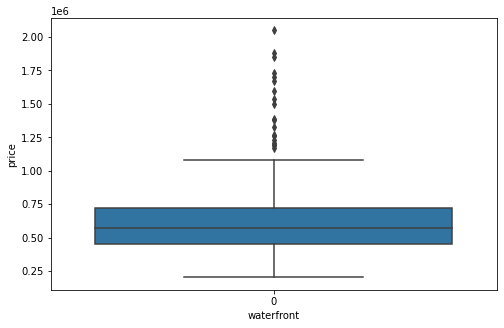

98122


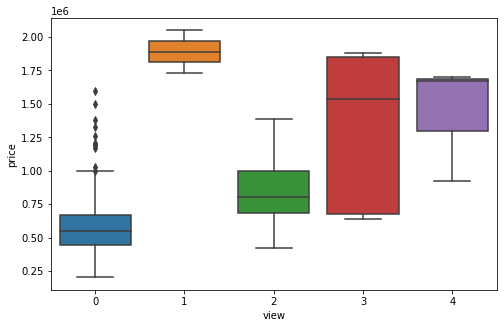

98122


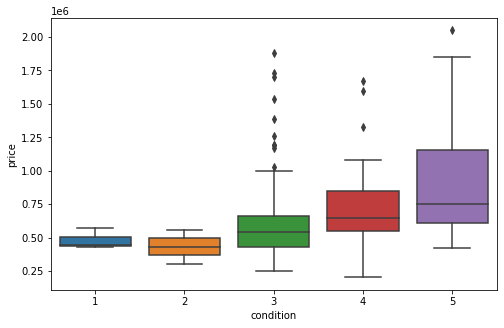

98122


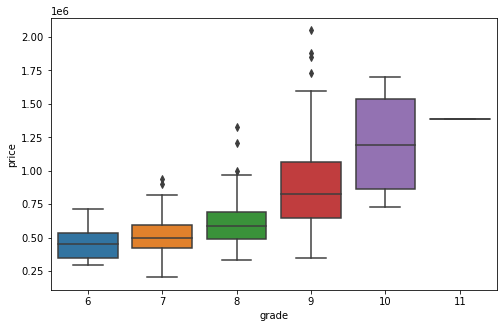

98122


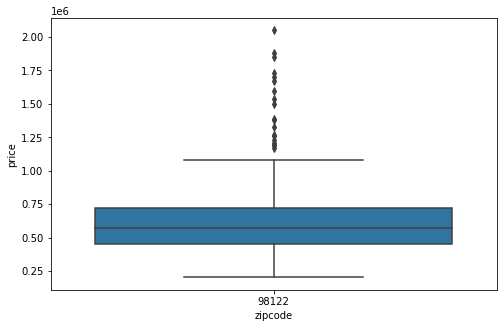

98144


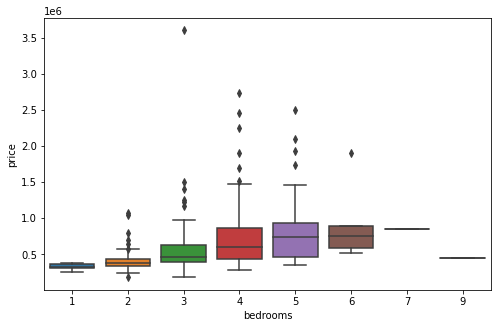

98144


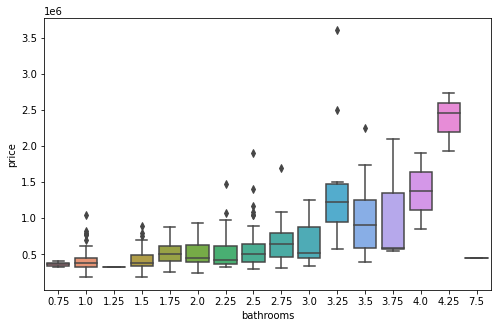

98144


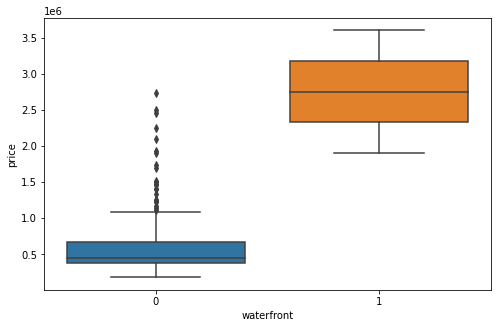

98144


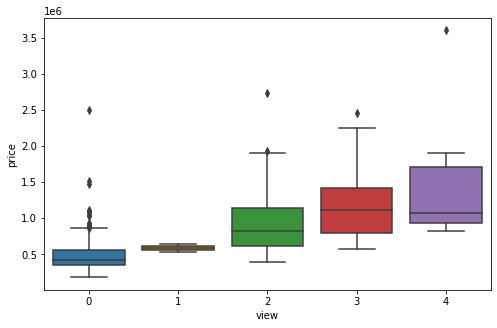

98144


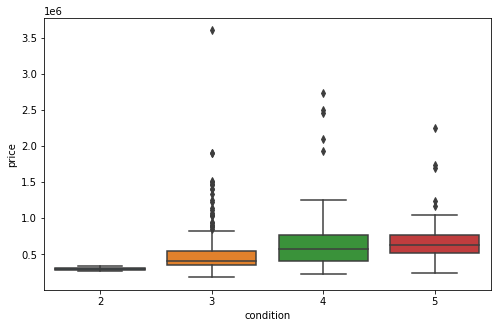

98144


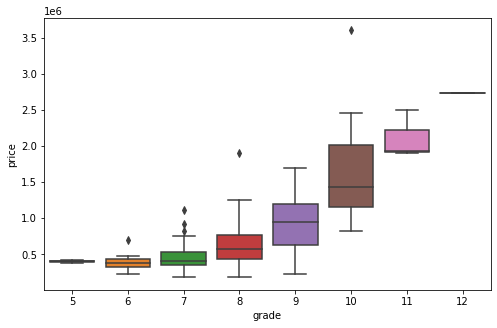

98144


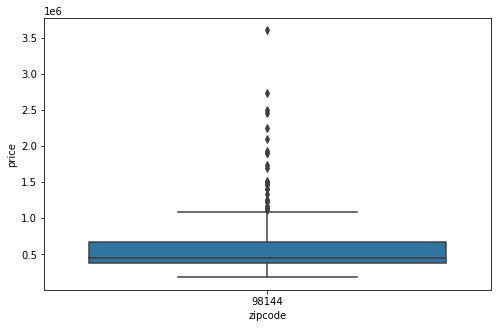

98004


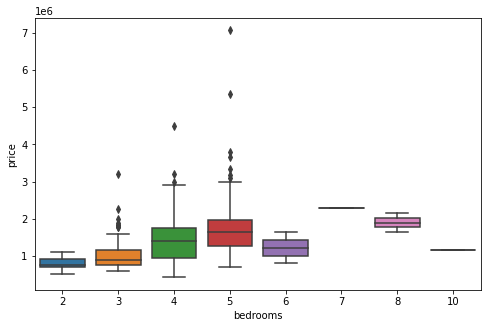

98004


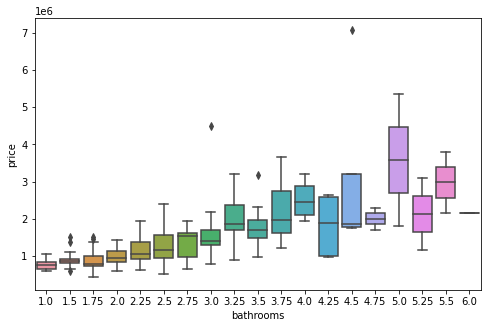

98004


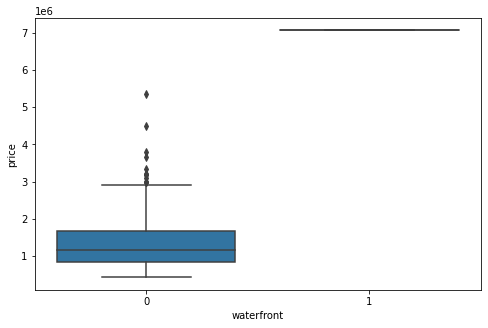

98004


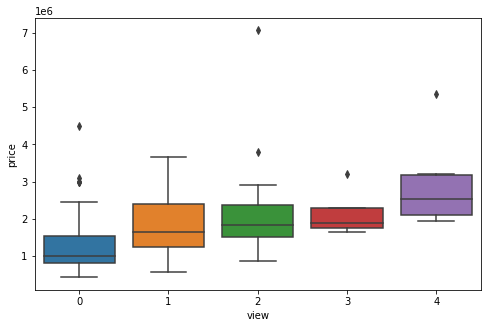

98004


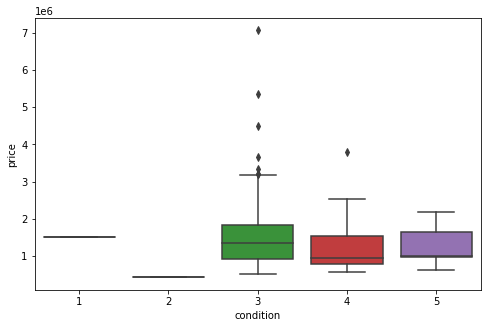

98004


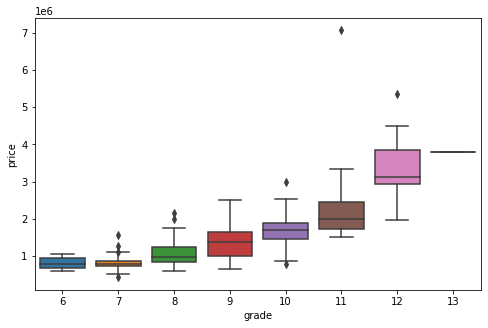

98004


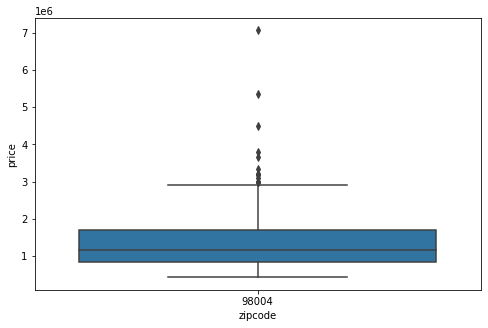

98005


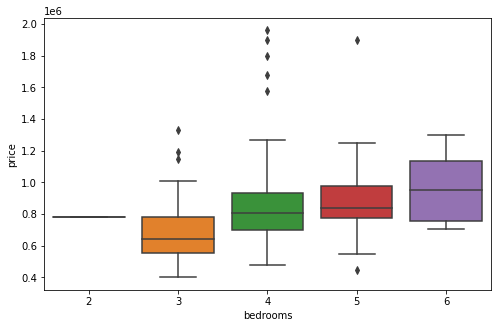

98005


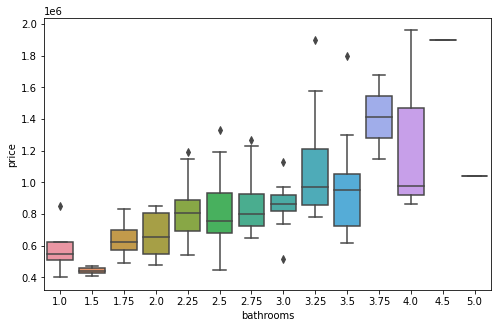

98005


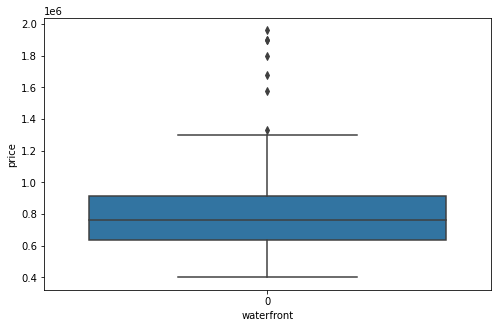

98005


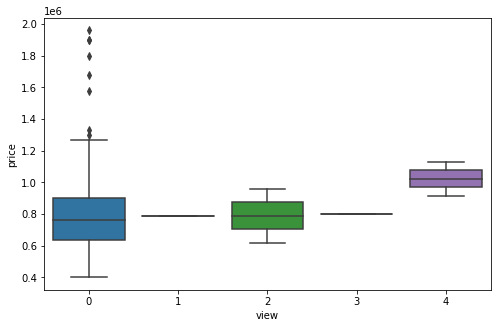

98005


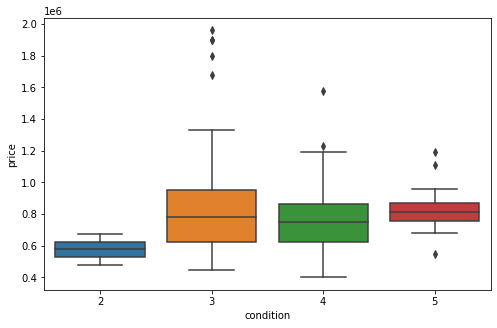

98005


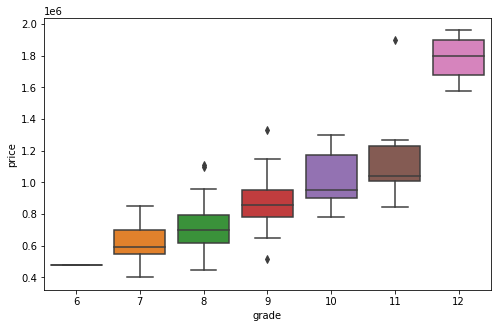

98005


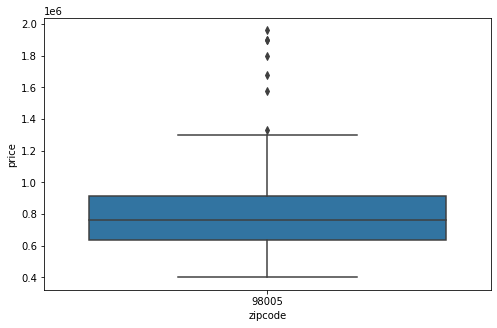

98034


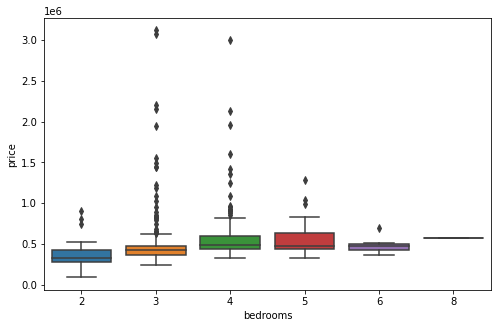

98034


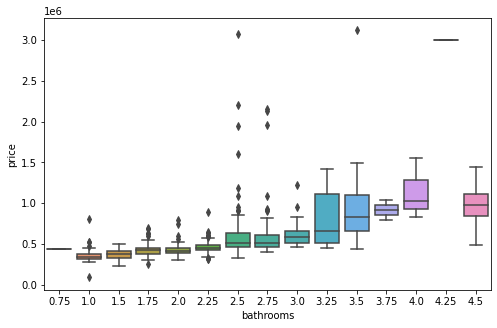

98034


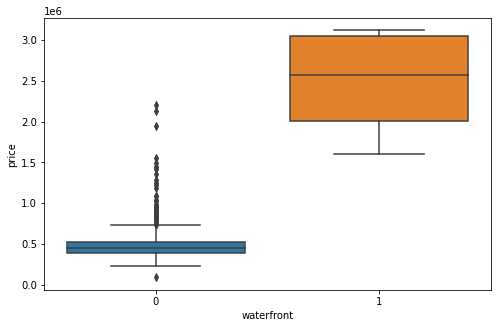

98034


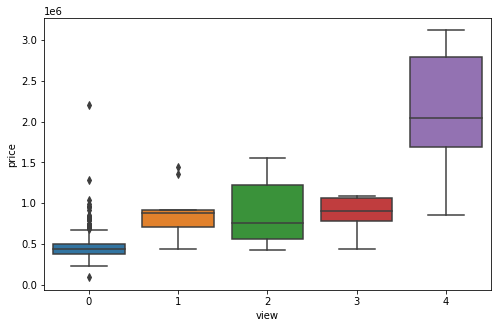

98034


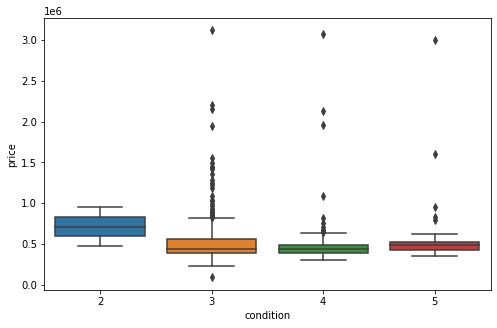

98034


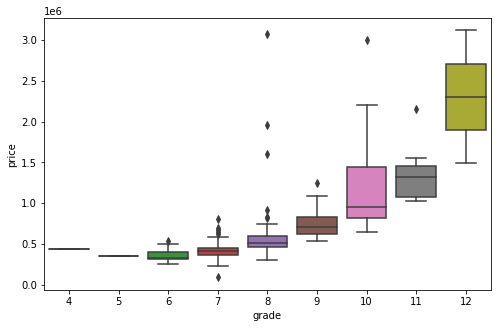

98034


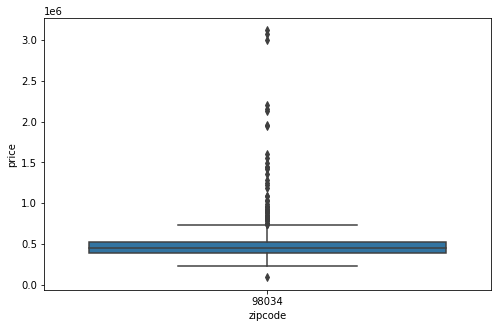

98075


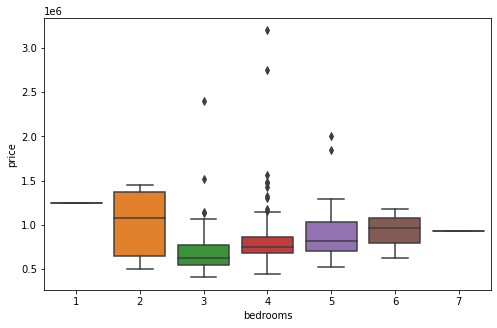

98075


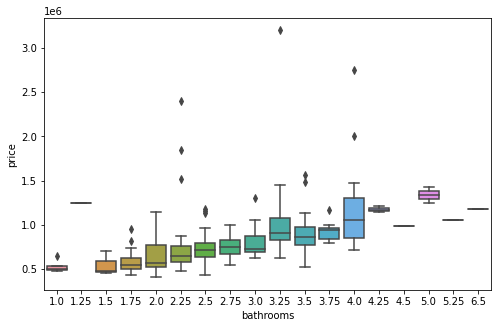

98075


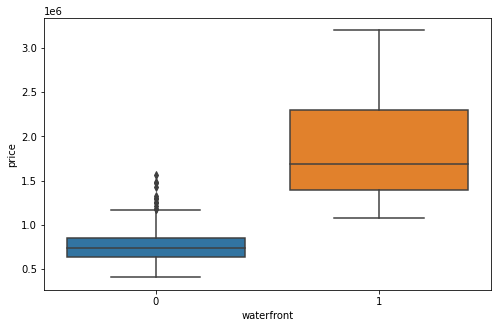

98075


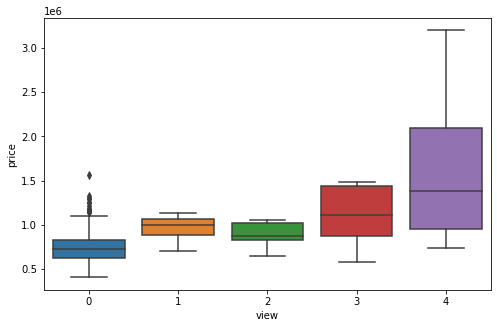

98075


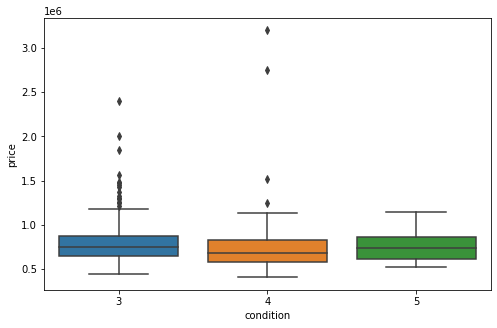

98075


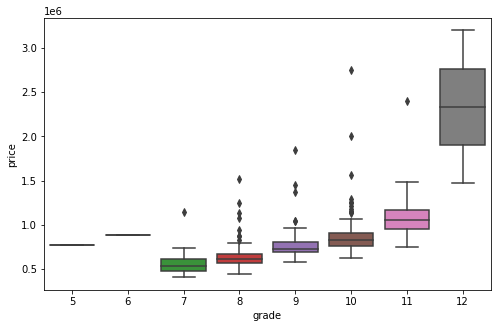

98075


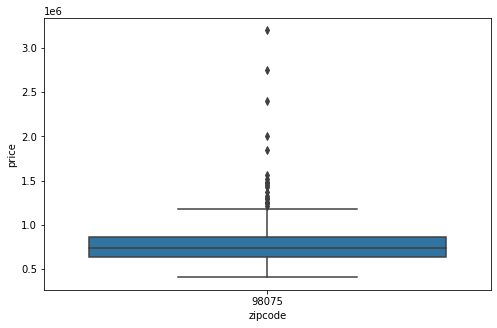

98116


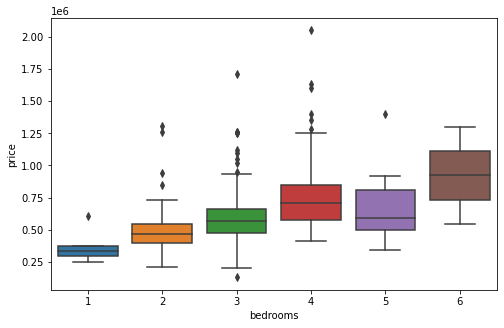

98116


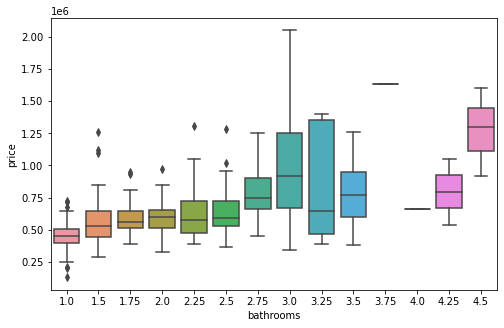

98116


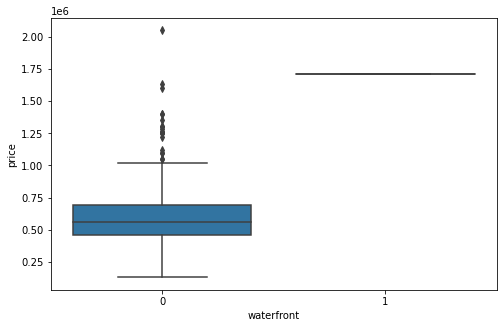

98116


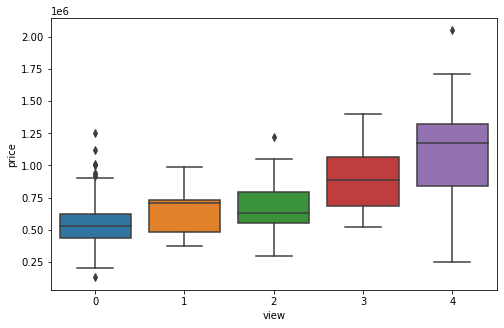

98116


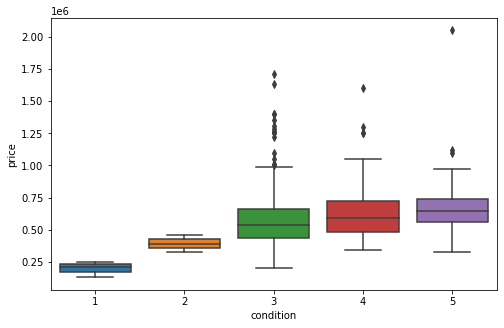

98116


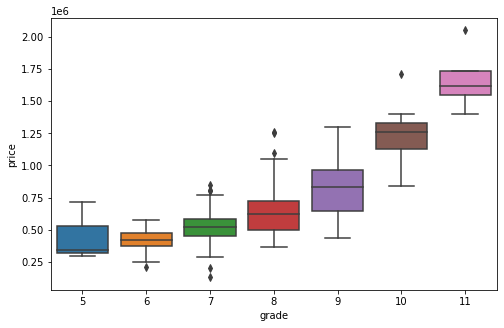

98116


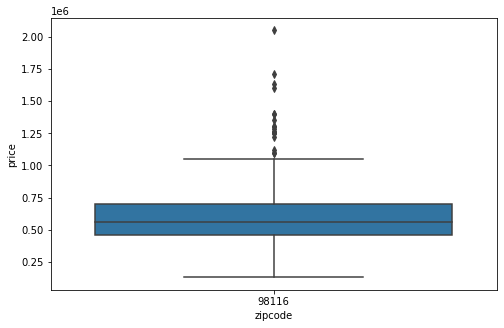

98010


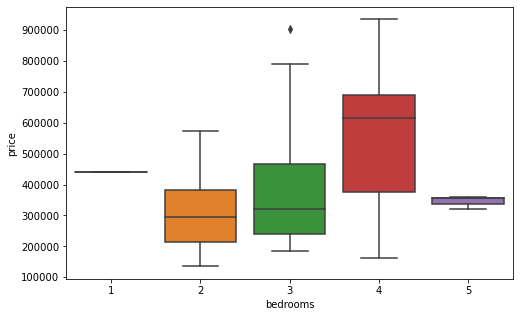

98010


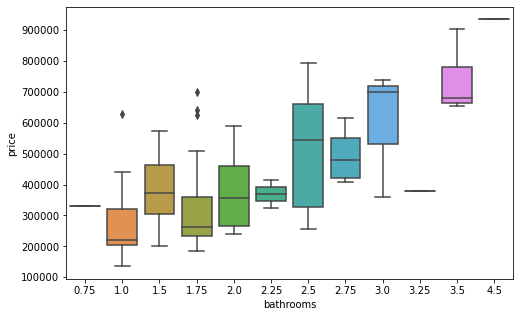

98010


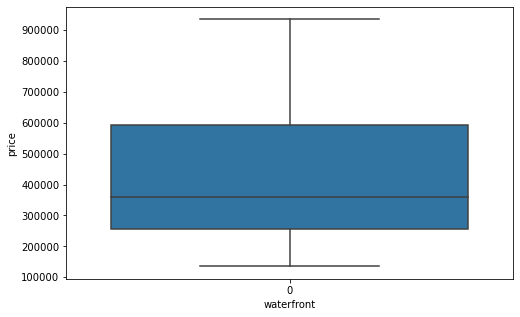

98010


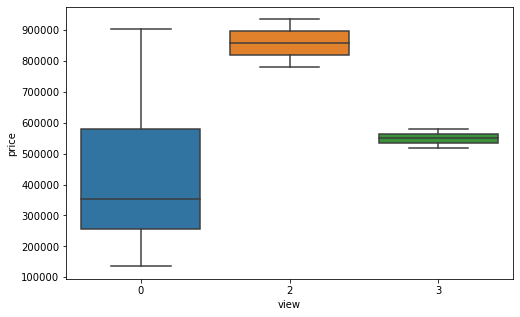

98010


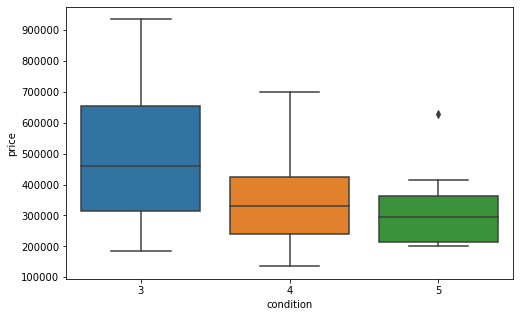

98010


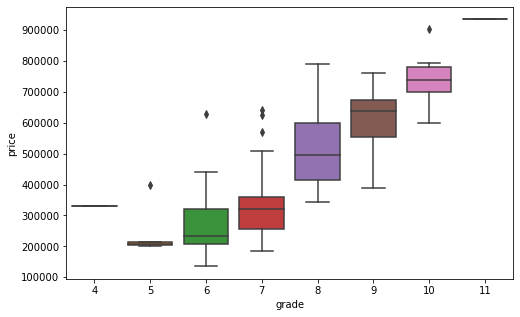

98010


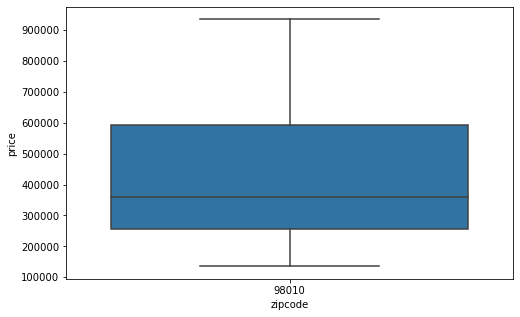

98118


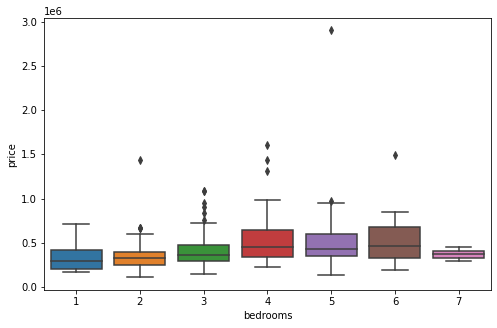

98118


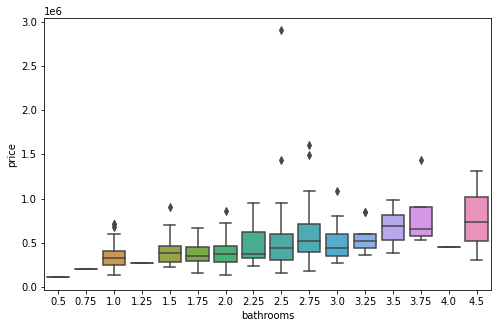

98118


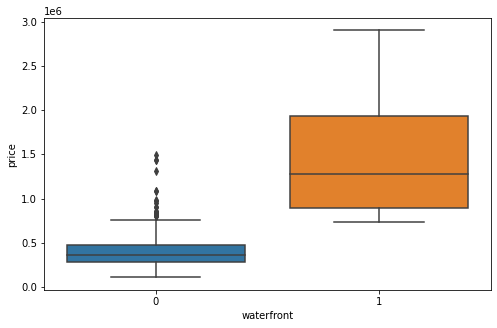

98118


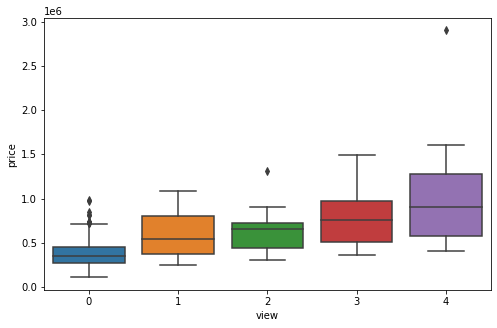

98118


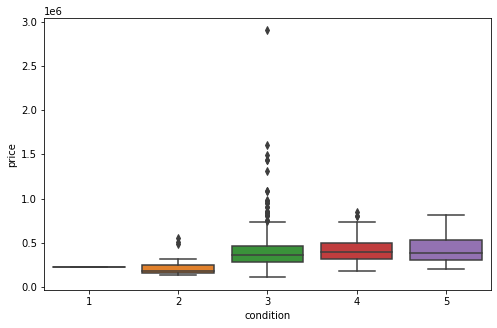

98118


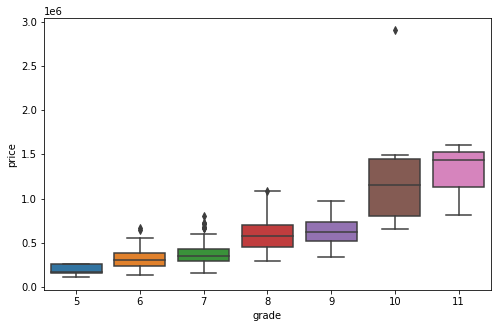

98118


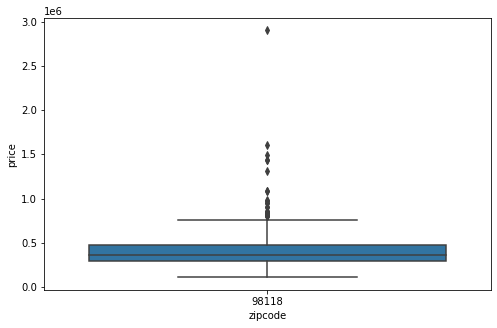

98199


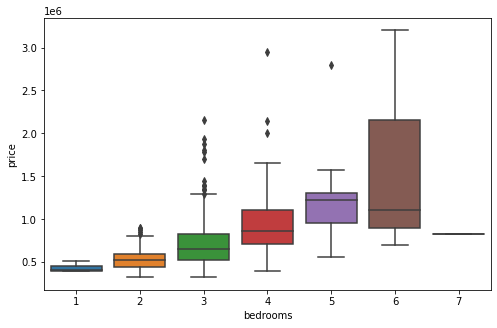

98199


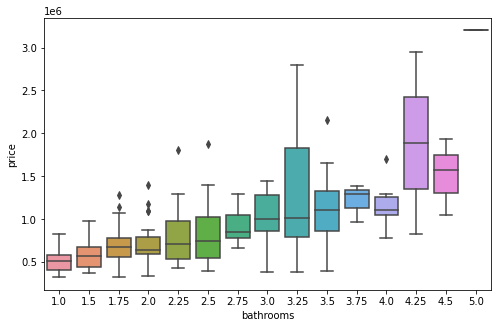

98199


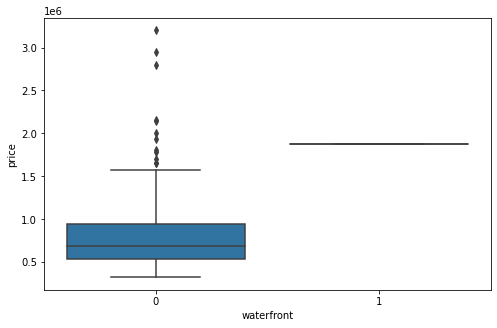

98199


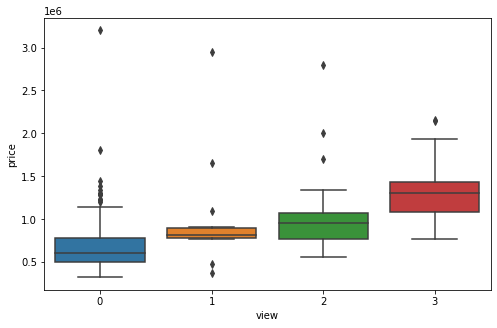

98199


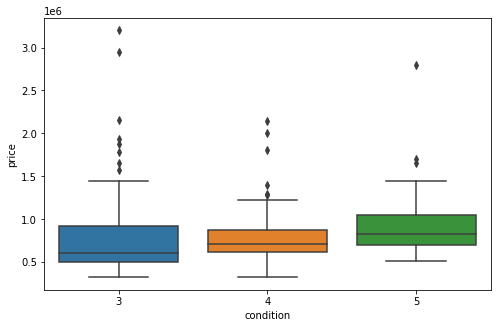

98199


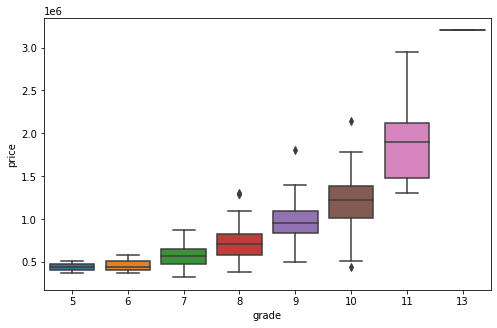

98199


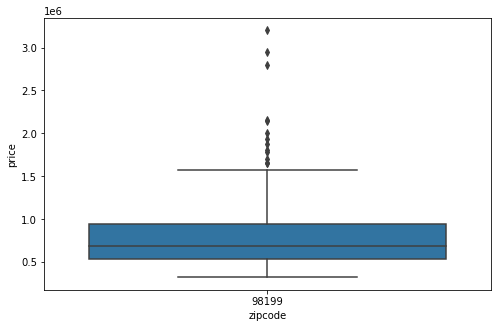

98032


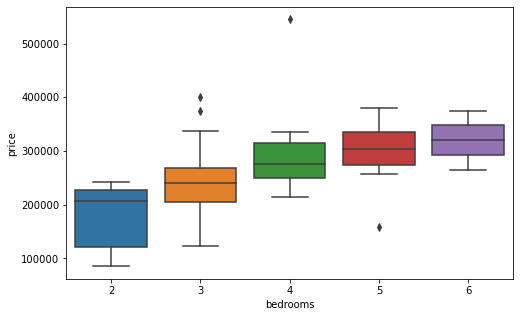

98032


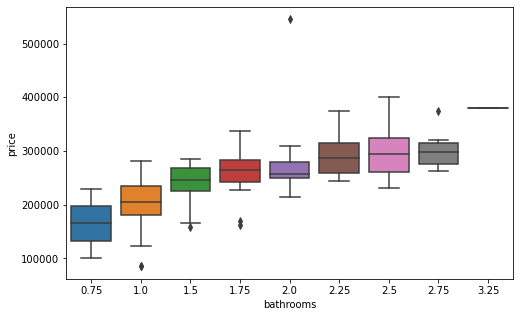

98032


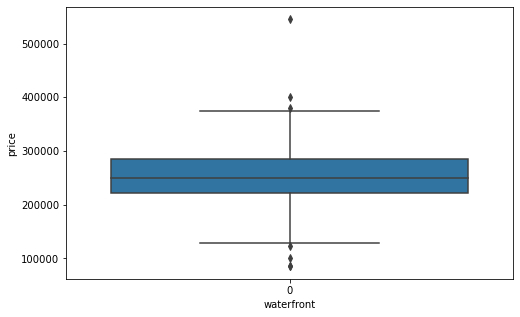

98032


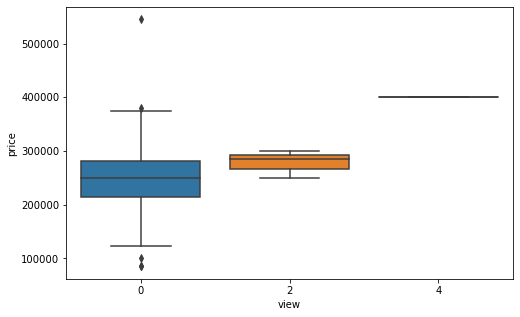

98032


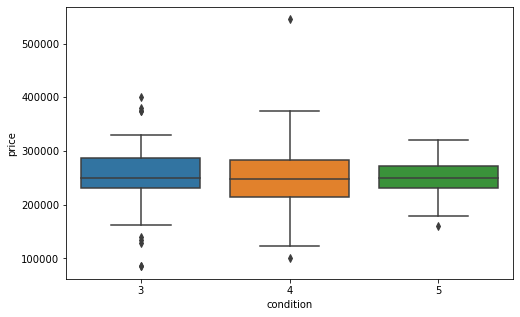

98032


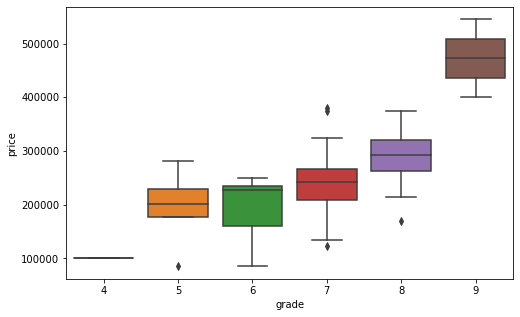

98032


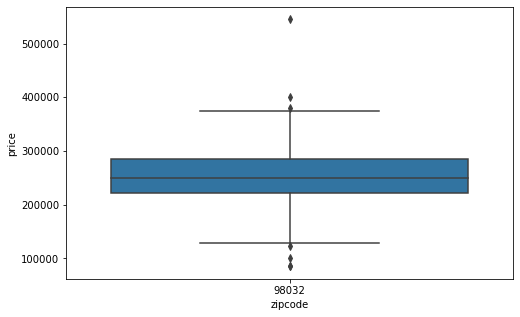

98045


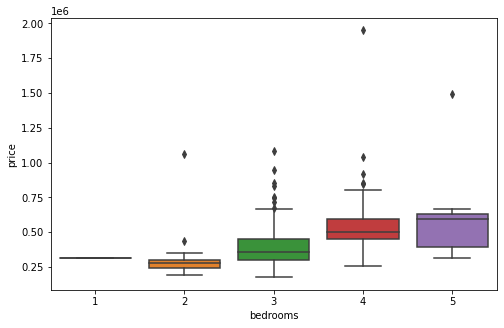

98045


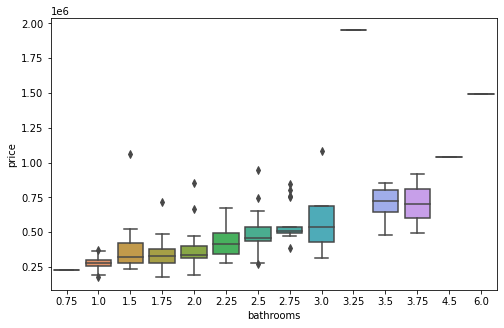

98045


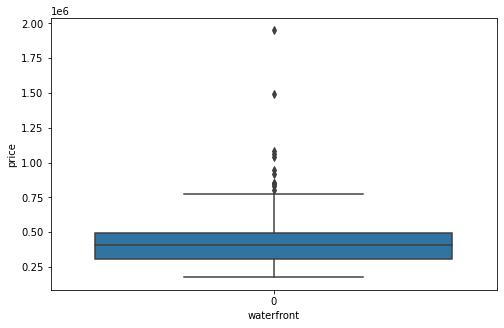

98045


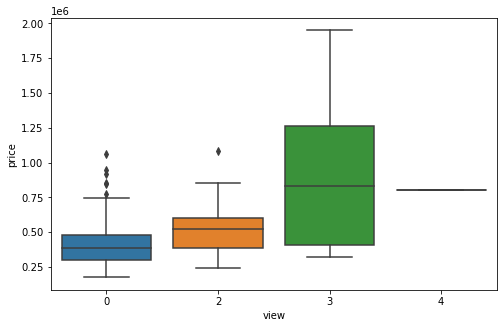

98045


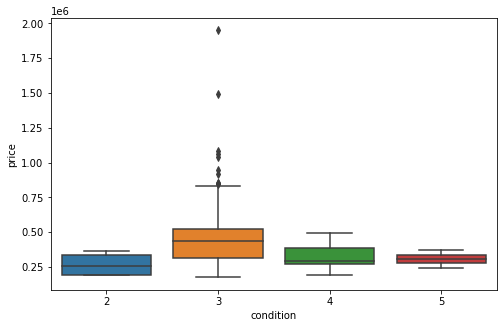

98045


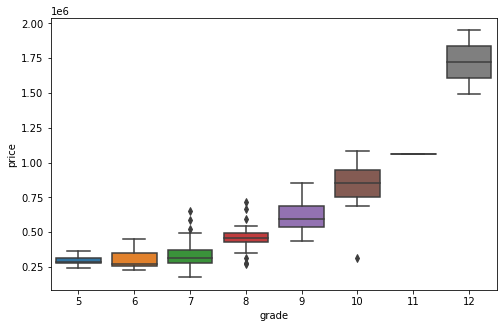

98045


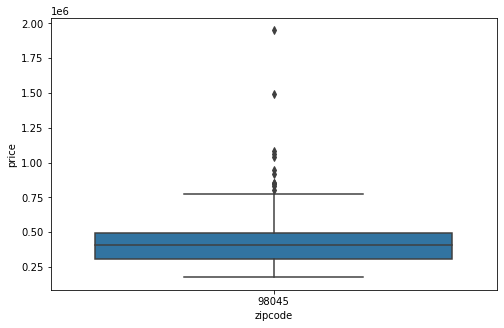

98102


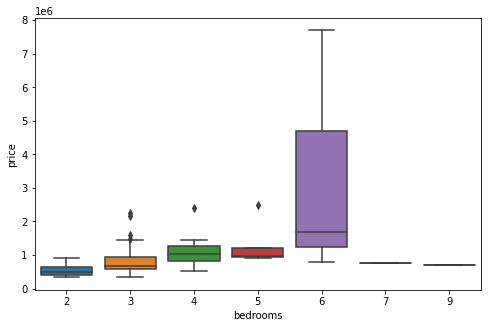

98102


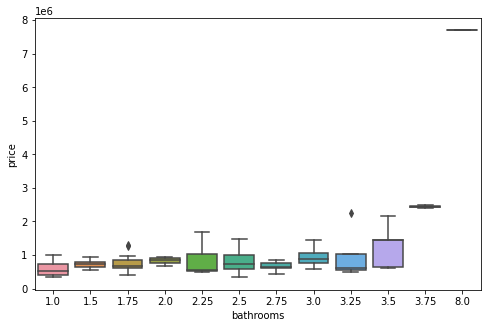

98102


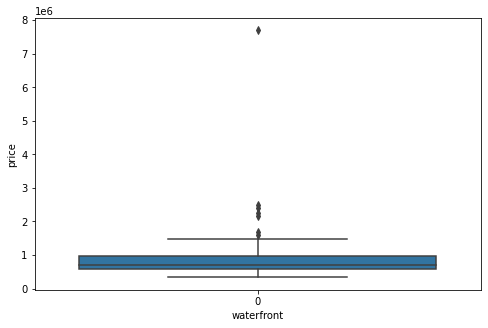

98102


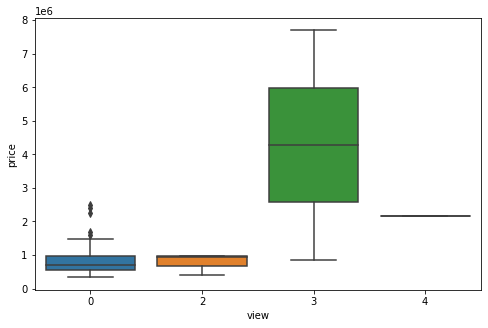

98102


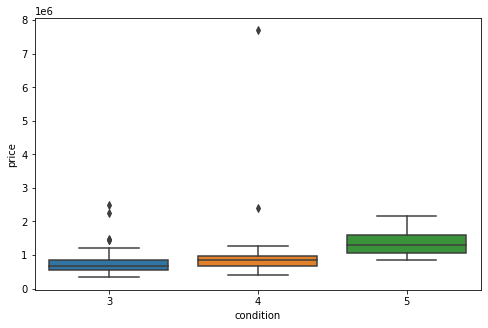

98102


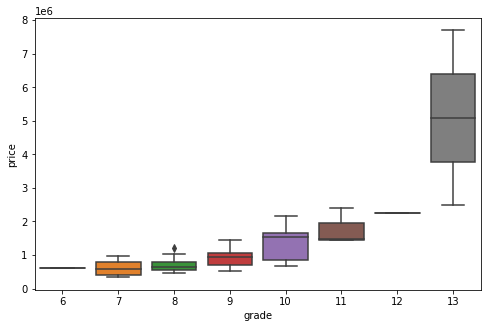

98102


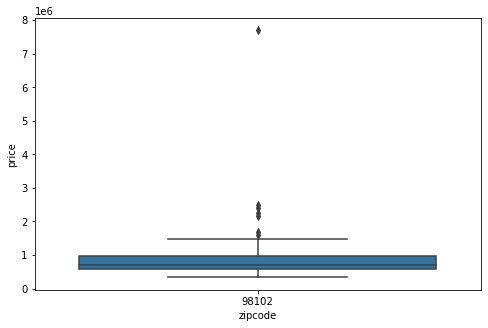

98077


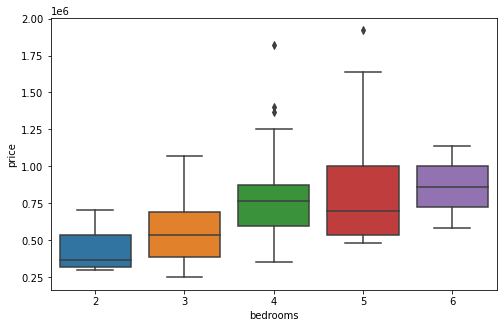

98077


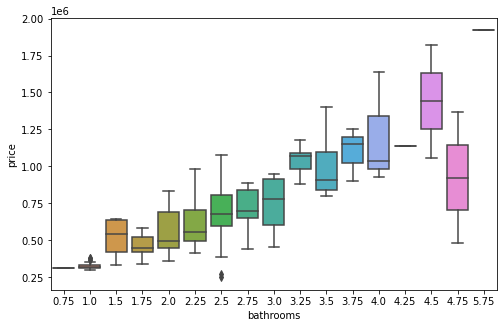

98077


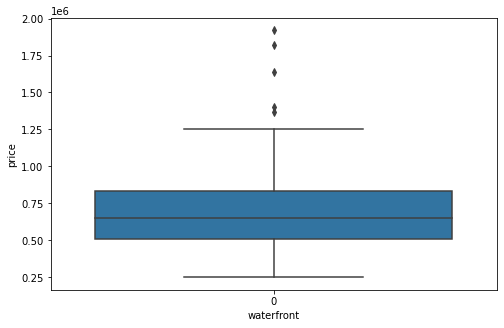

98077


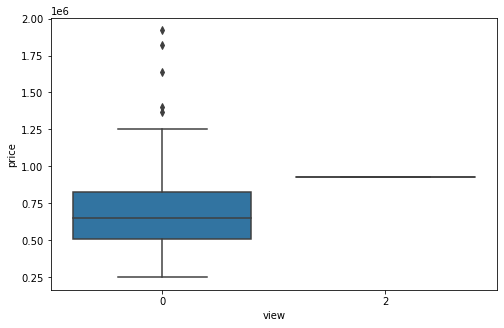

98077


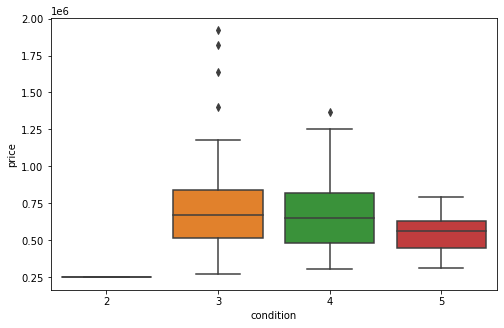

98077


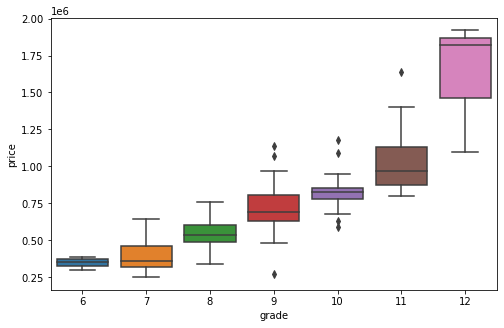

98077


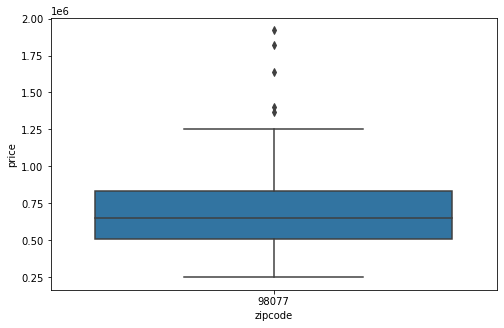

98108


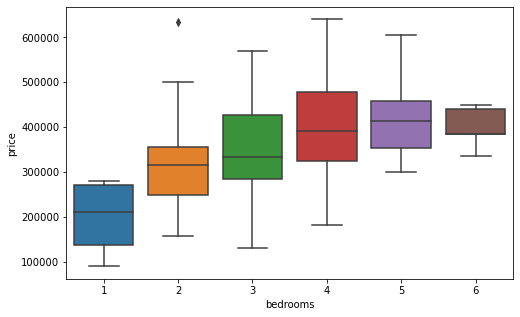

98108


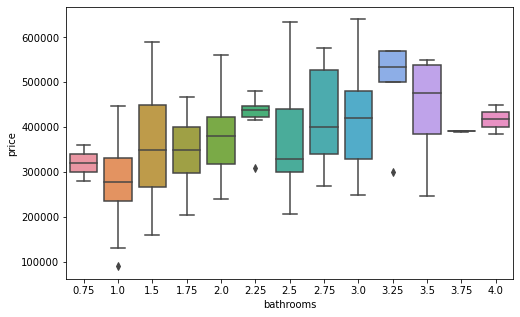

98108


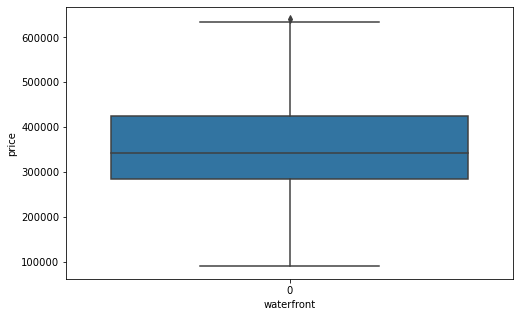

98108


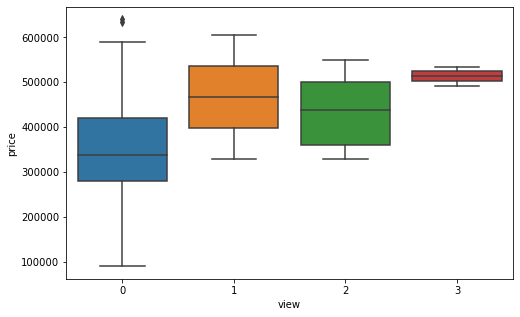

98108


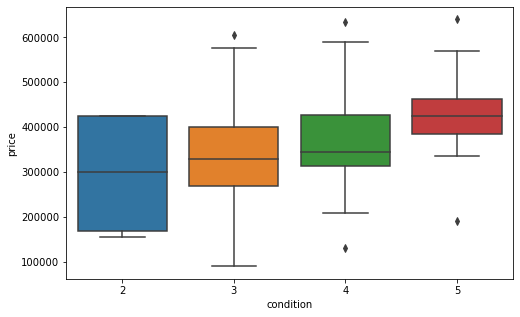

98108


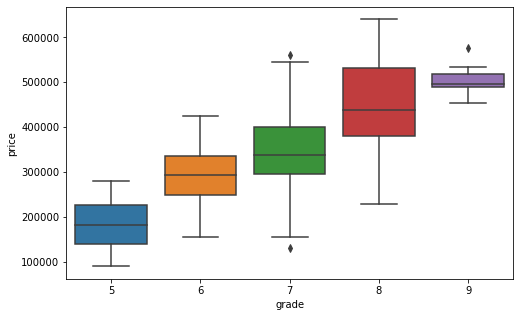

98108


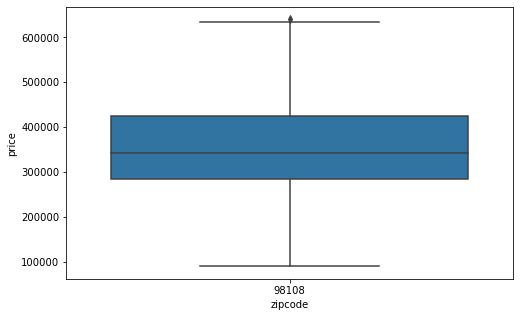

98168


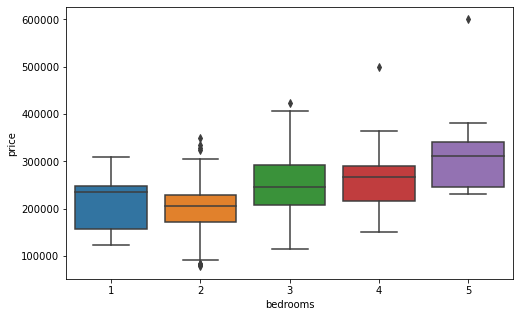

98168


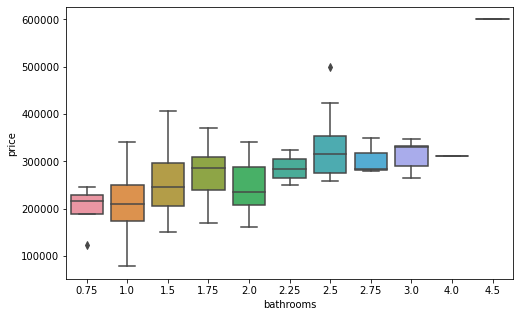

98168


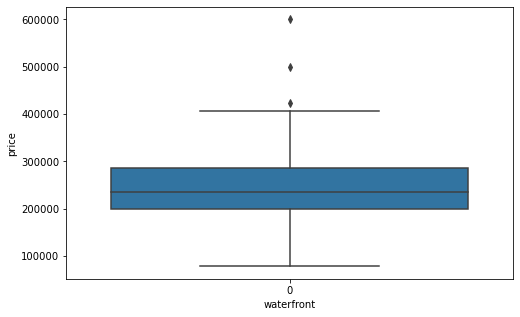

98168


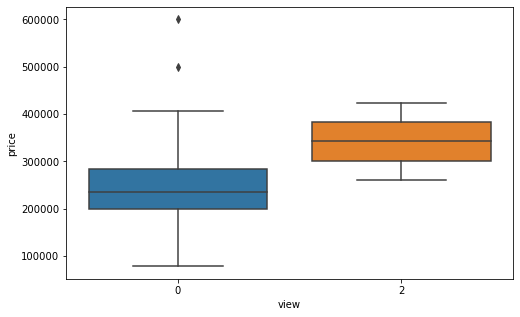

98168


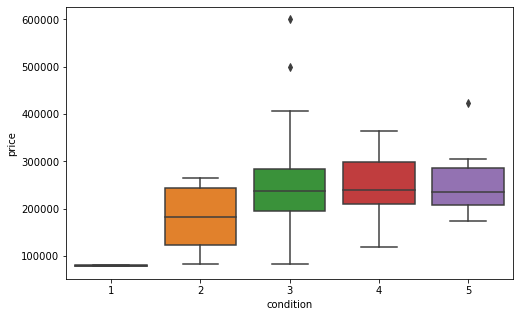

98168


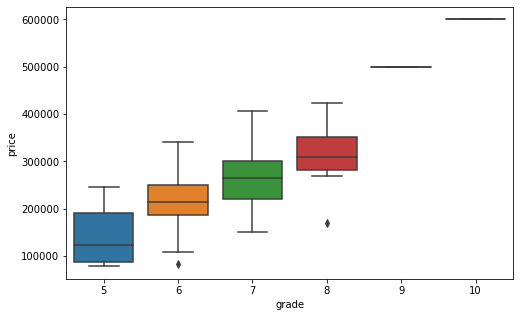

98168


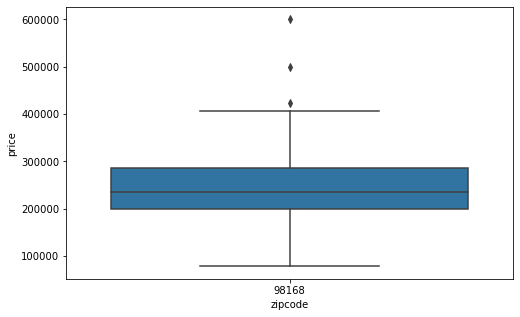

98177


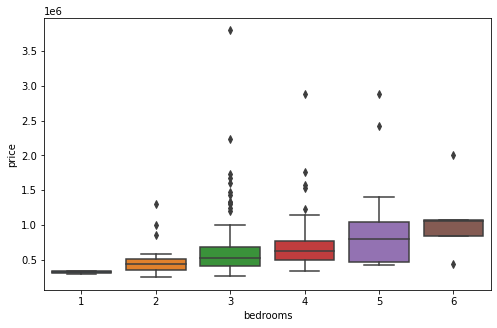

98177


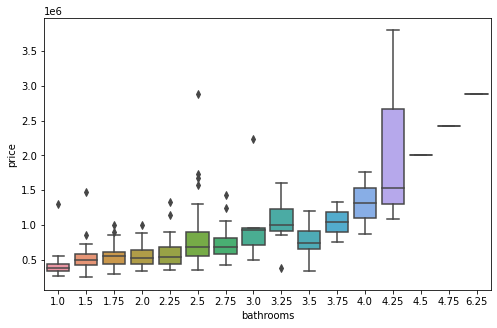

98177


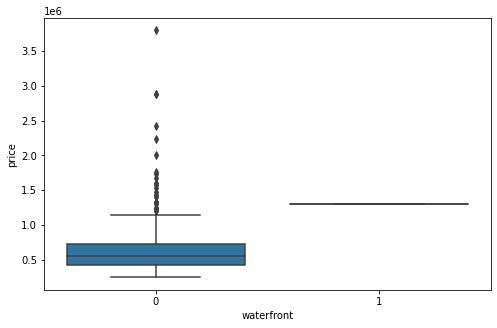

98177


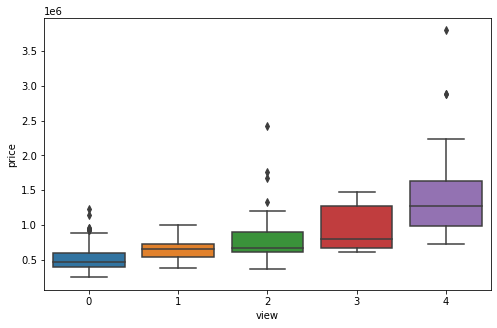

98177


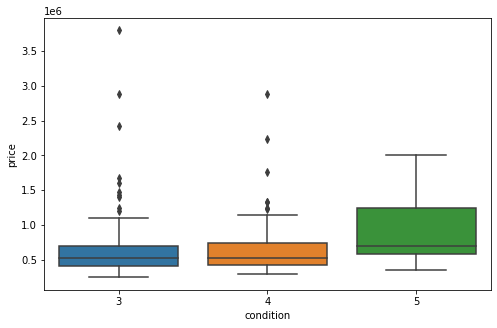

98177


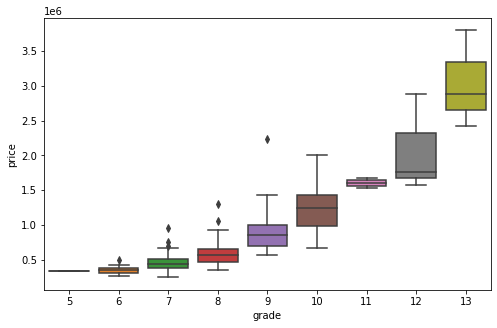

98177


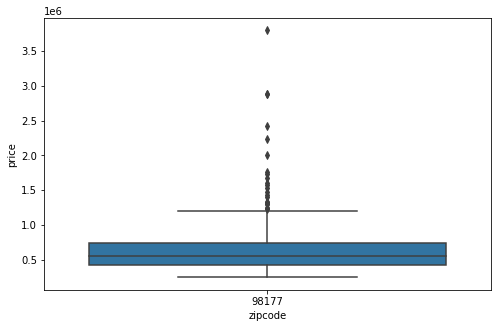

98065


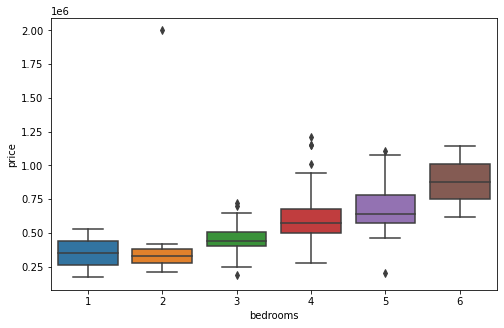

98065


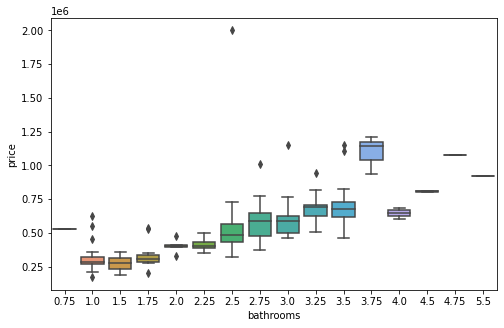

98065


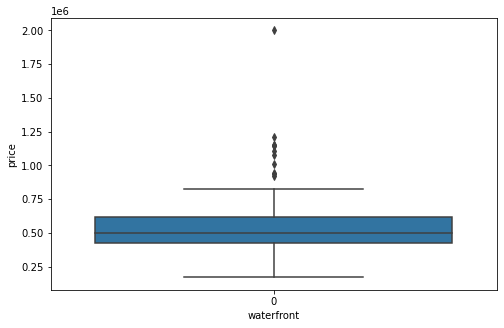

98065


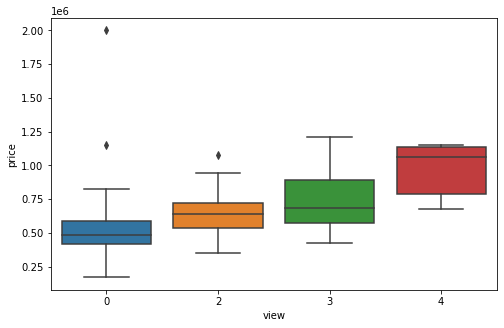

98065


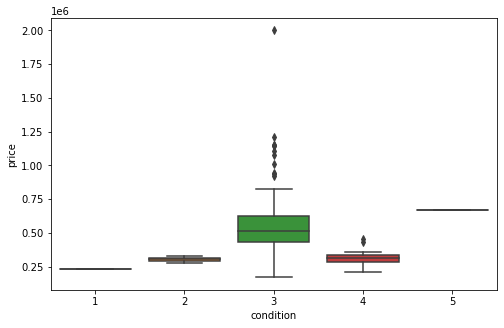

98065


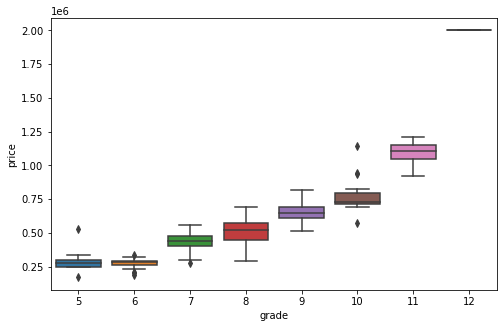

98065


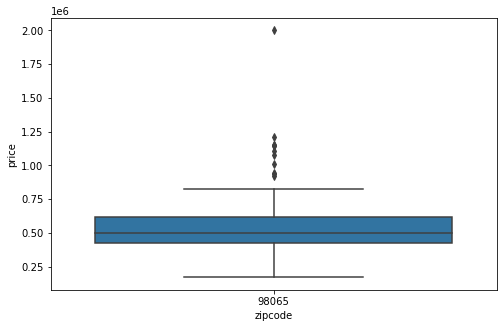

98029


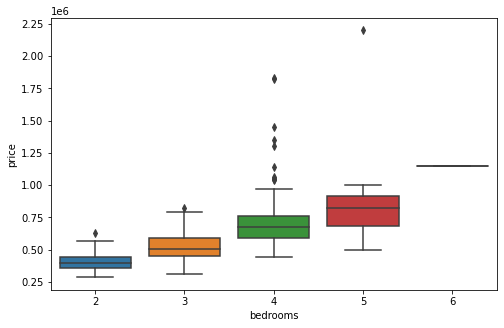

98029


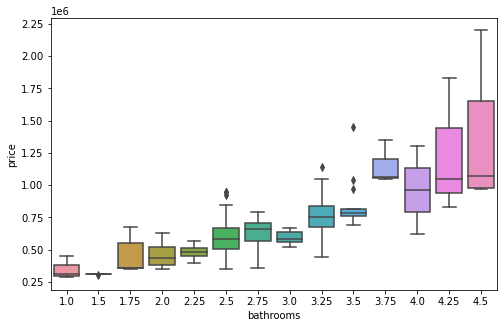

98029


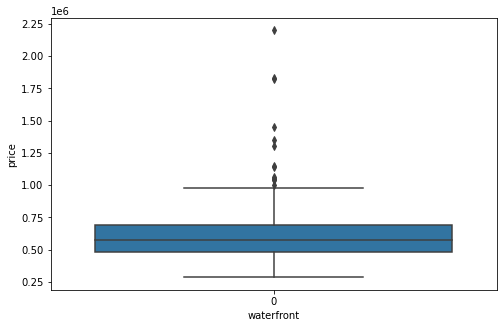

98029


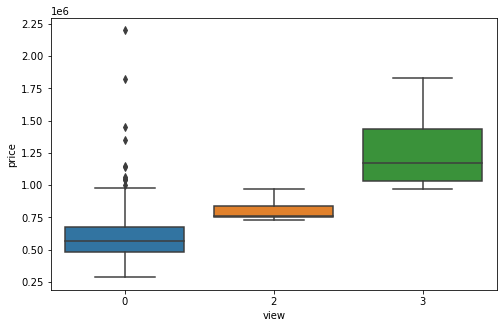

98029


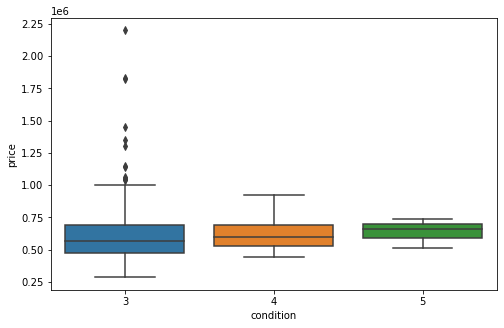

98029


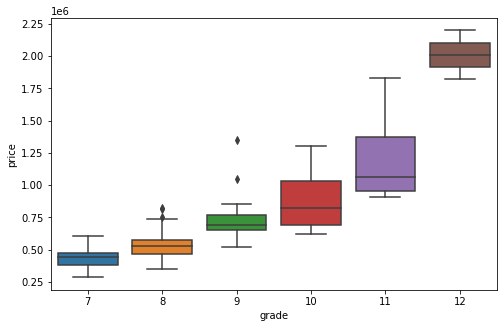

98029


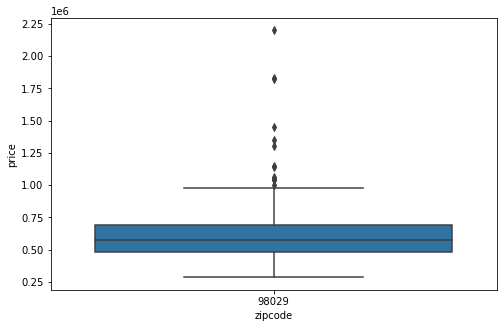

98006


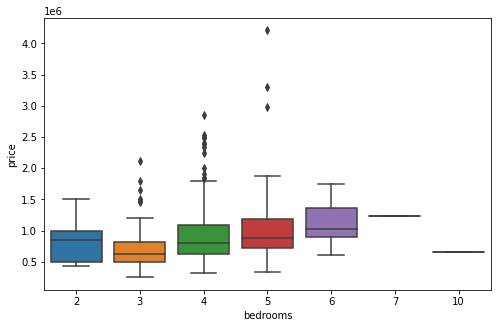

98006


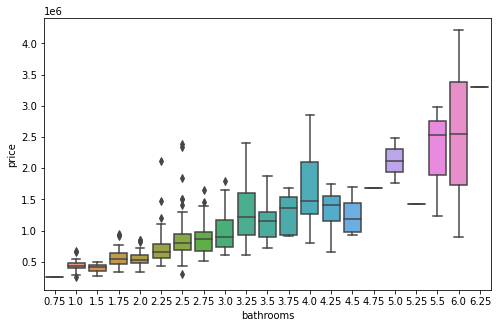

98006


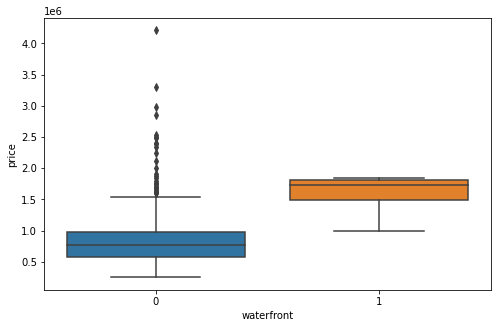

98006


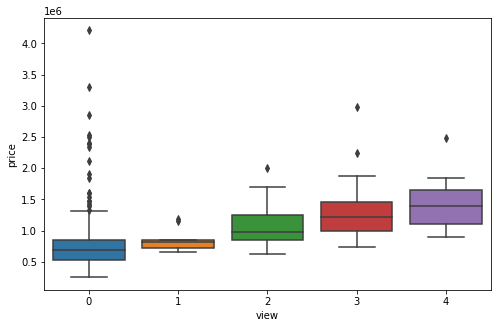

98006


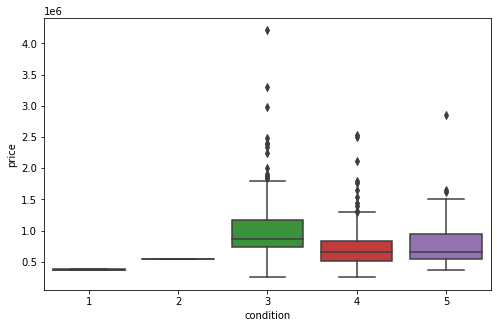

98006


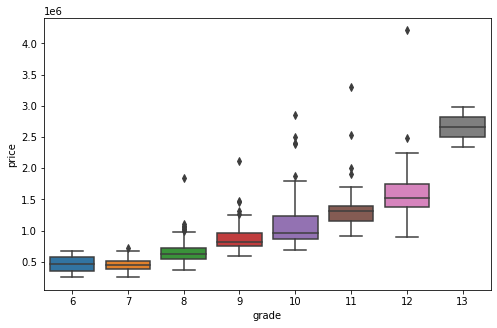

98006


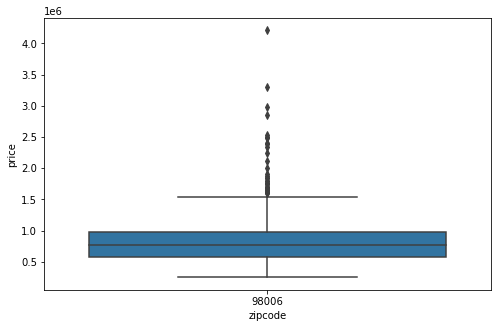

98109


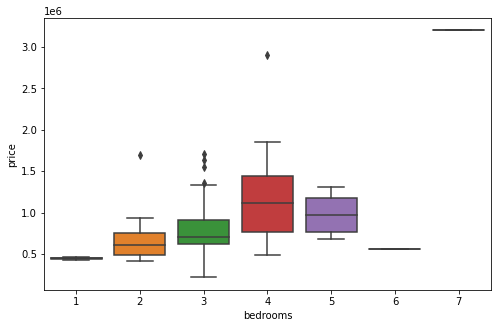

98109


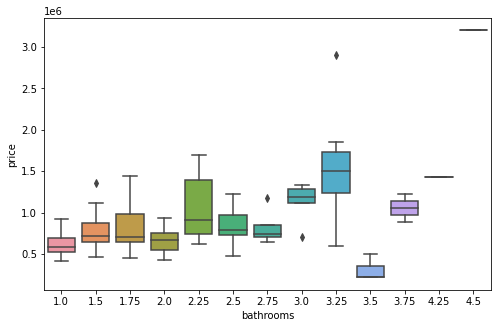

98109


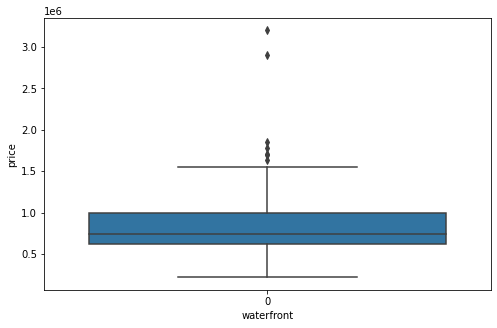

98109


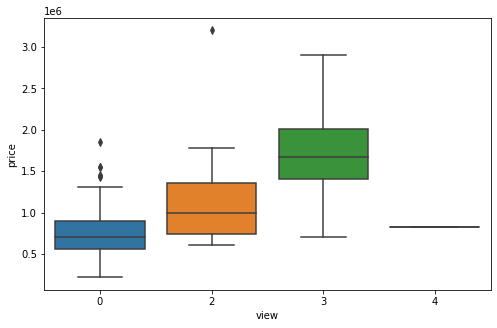

98109


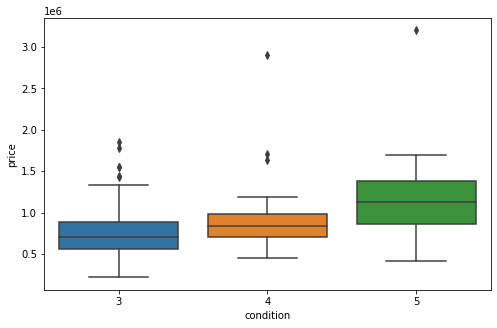

98109


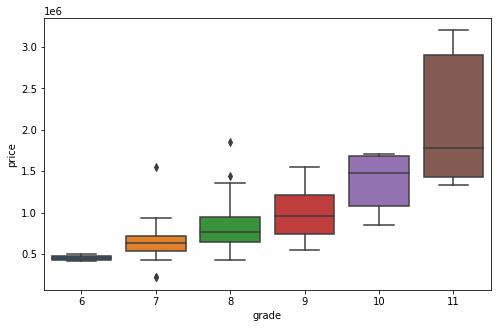

98109


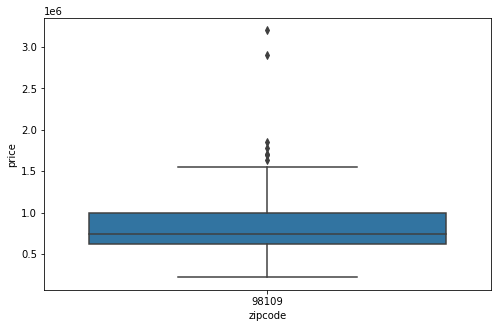

98022


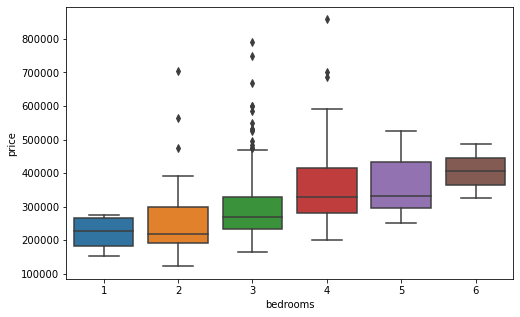

98022


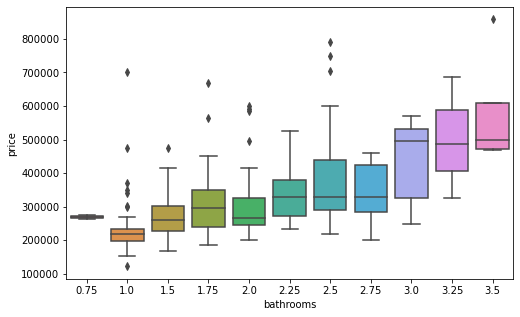

98022


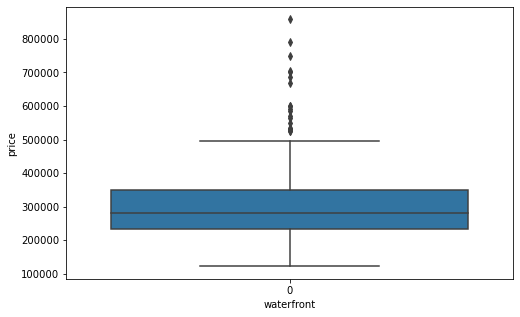

98022


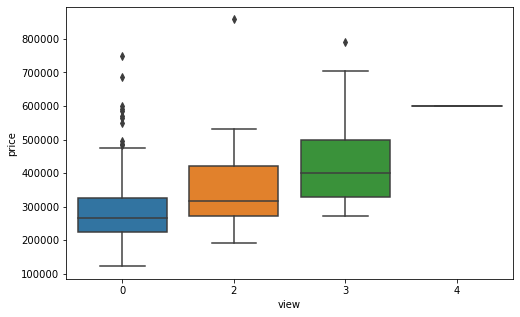

98022


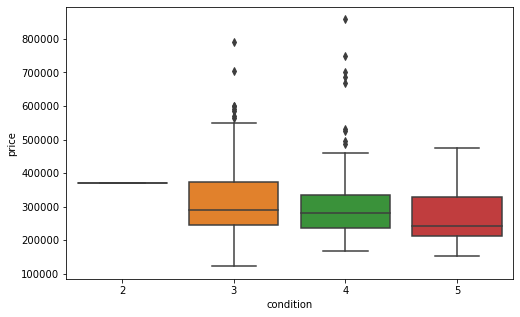

98022


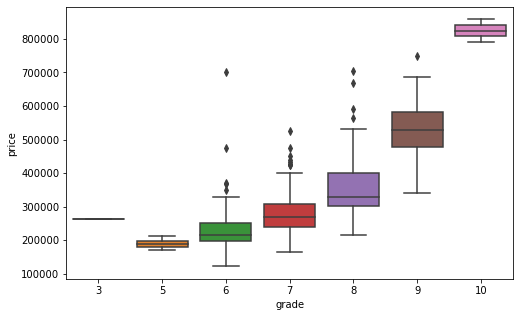

98022


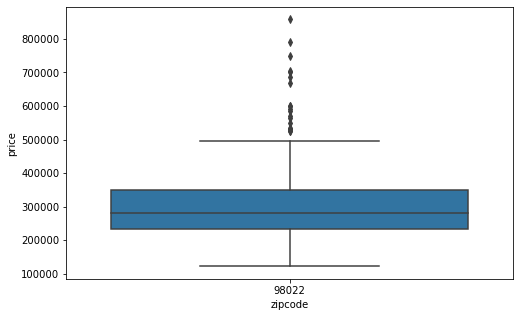

98033


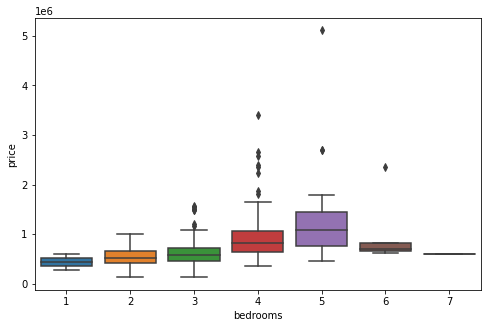

98033


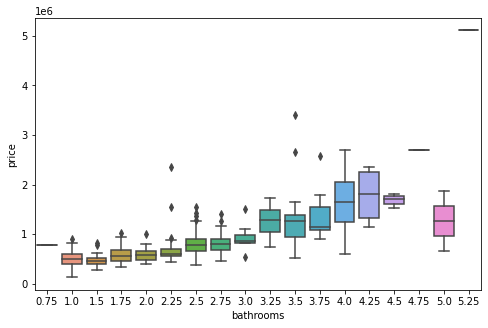

98033


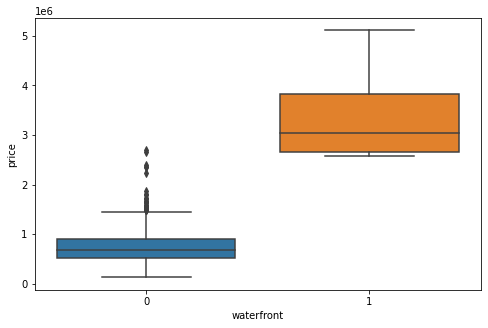

98033


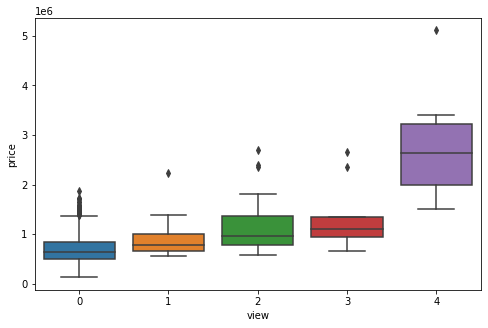

98033


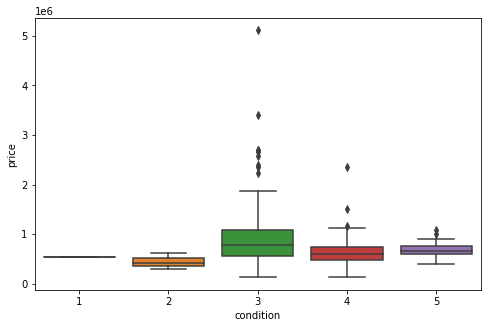

98033


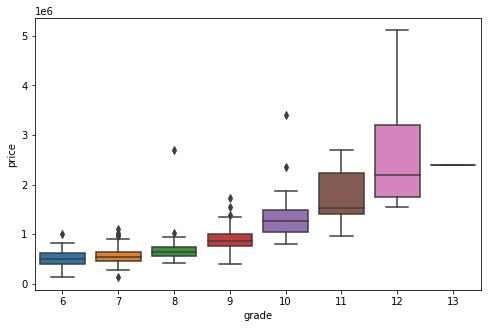

98033


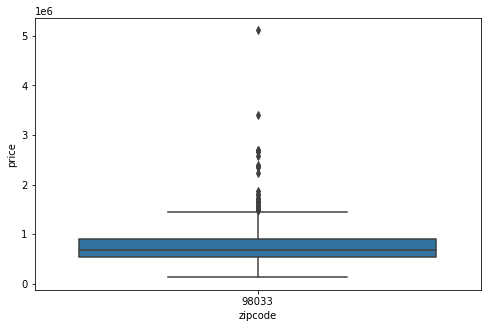

98155


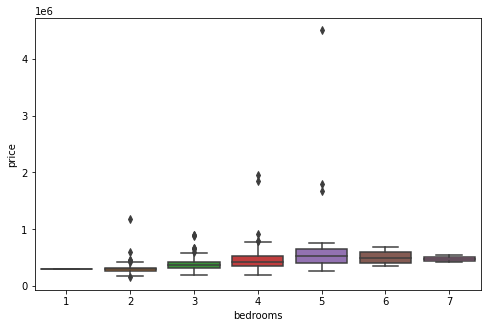

98155


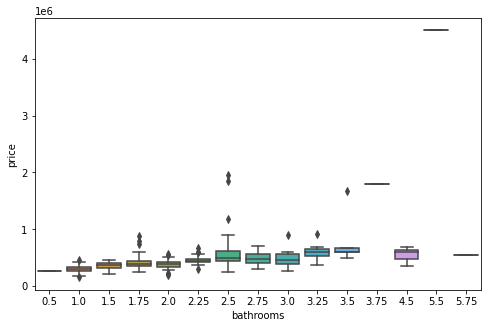

98155


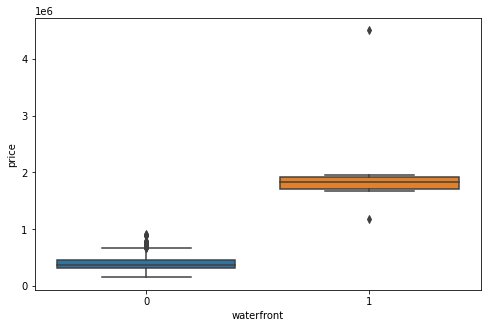

98155


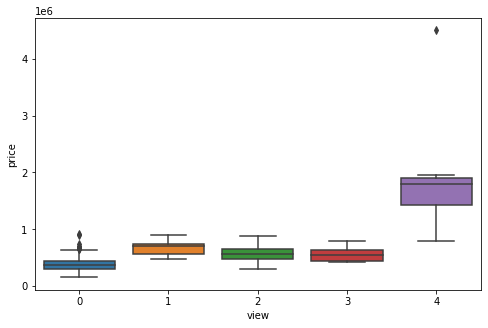

98155


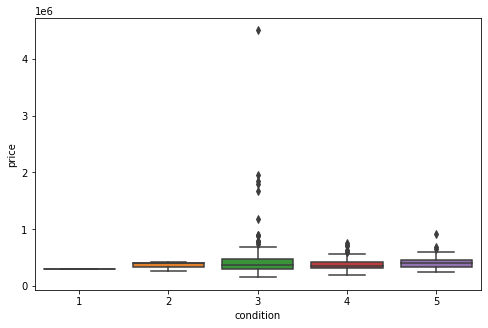

98155


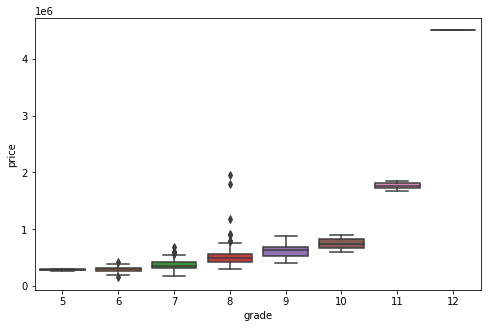

98155


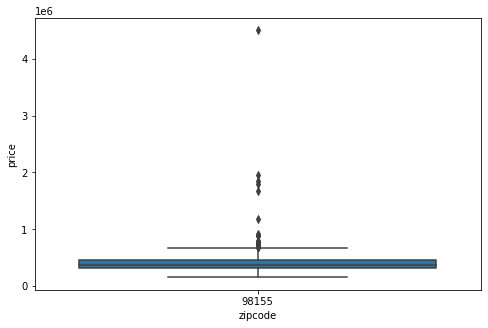

98024


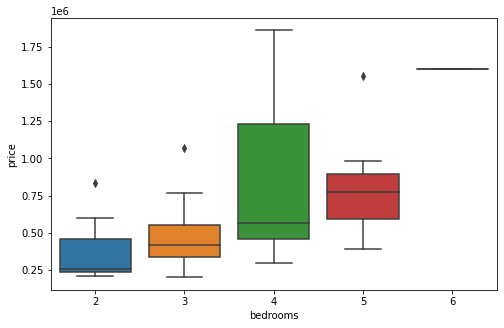

98024


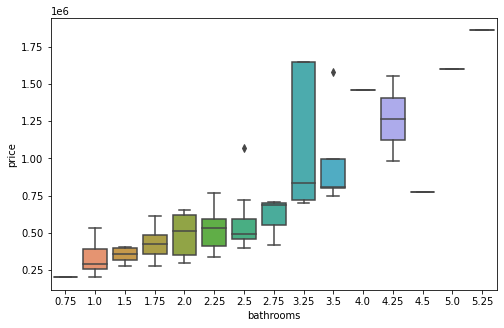

98024


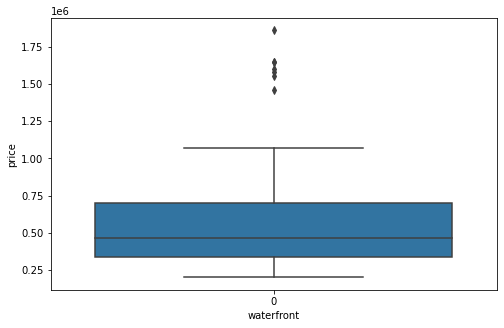

98024


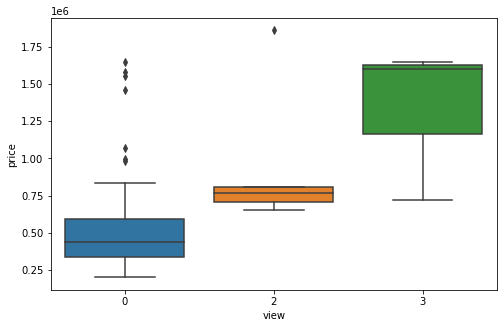

98024


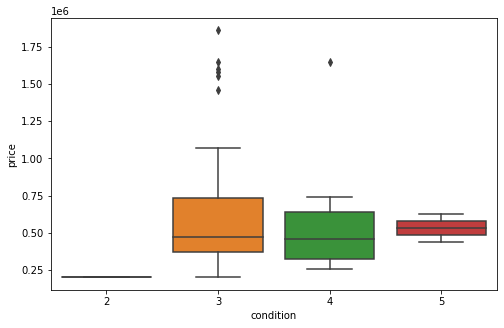

98024


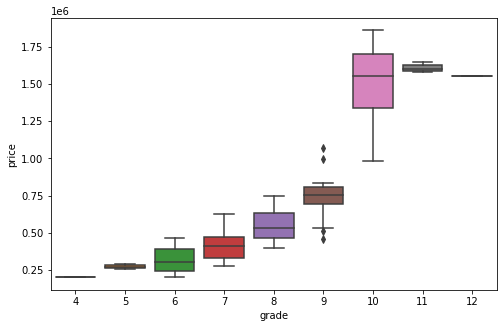

98024


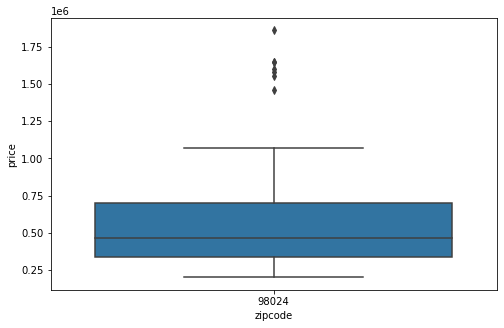

98011


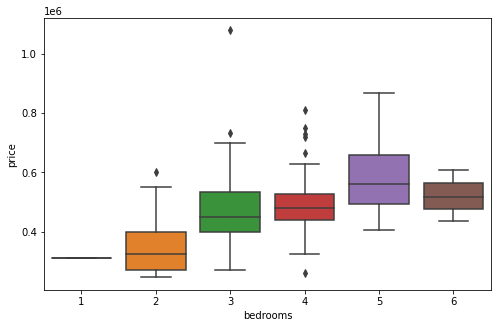

98011


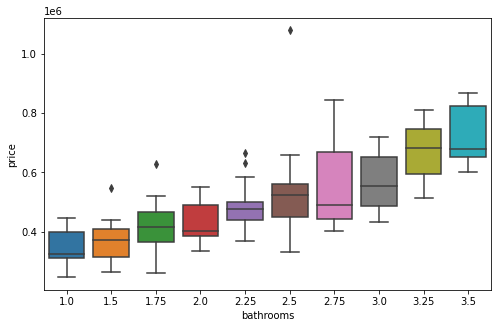

98011


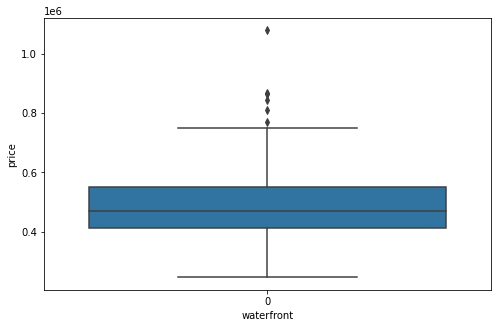

98011


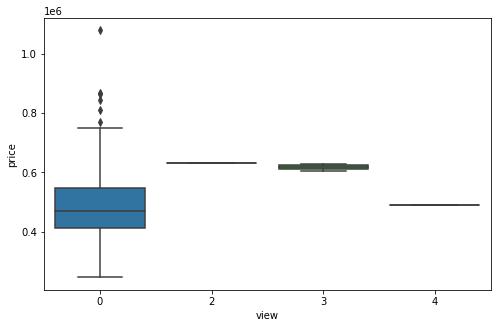

98011


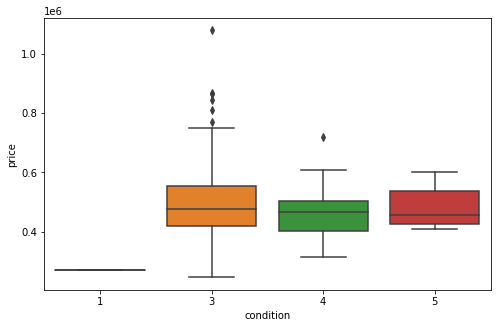

98011


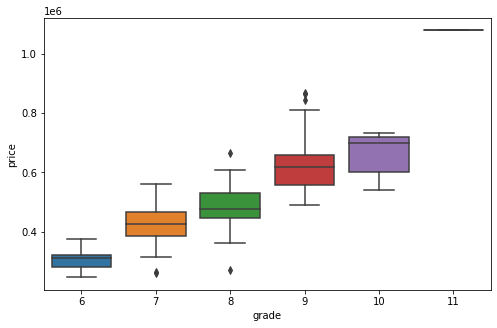

98011


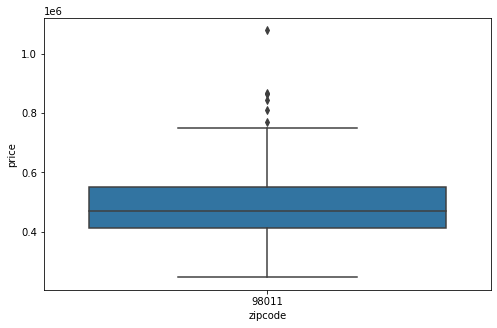

98031


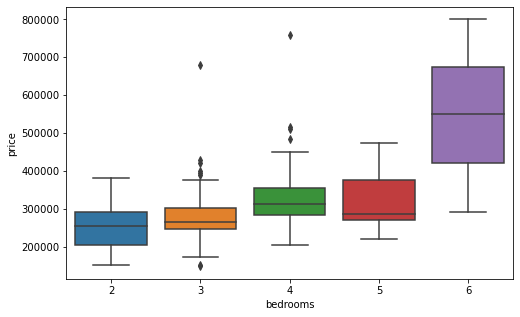

98031


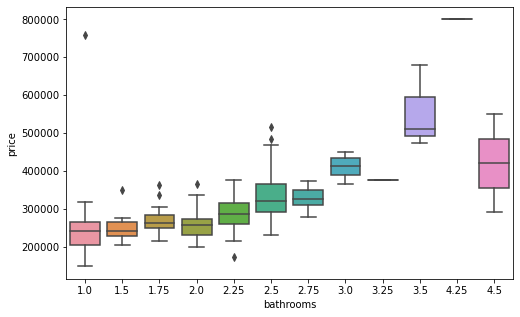

98031


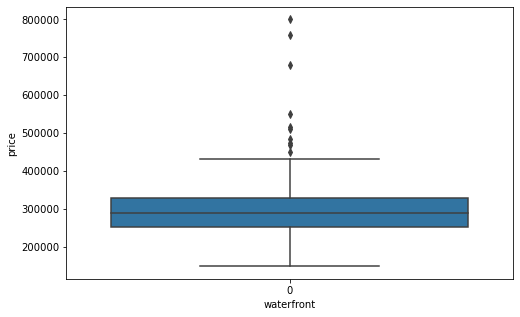

98031


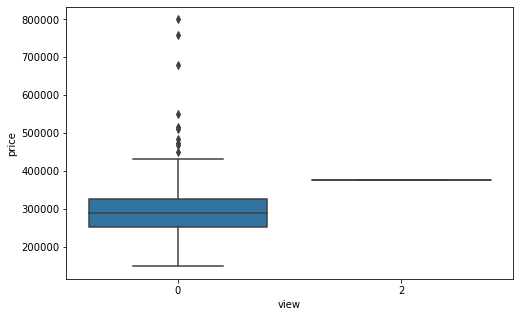

98031


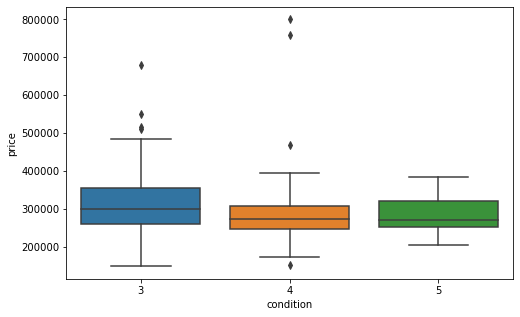

98031


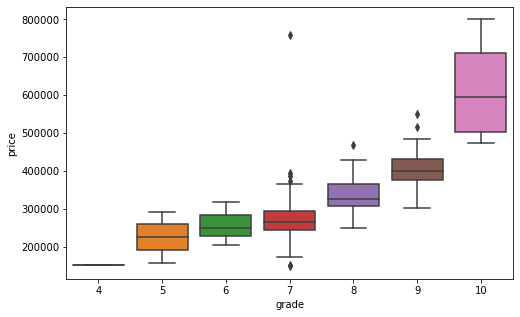

98031


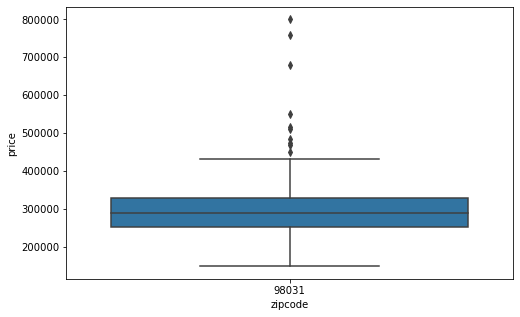

98106


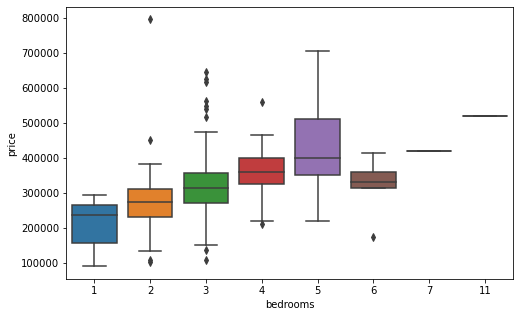

98106


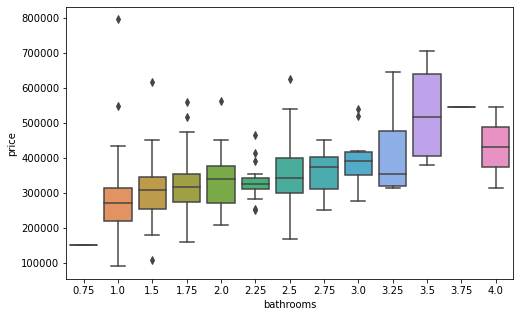

98106


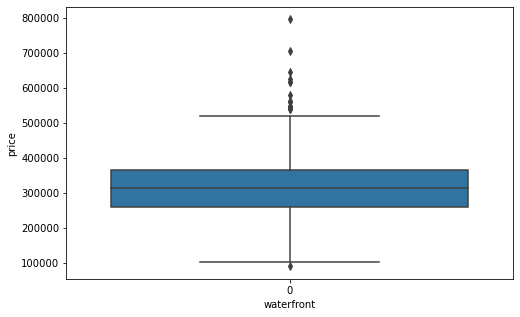

98106


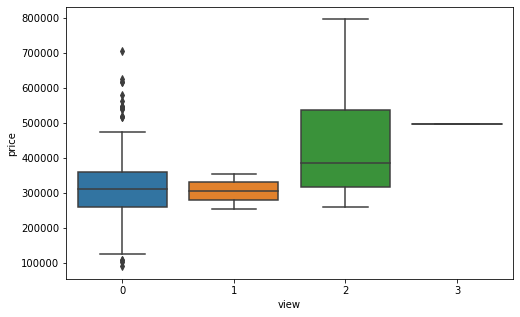

98106


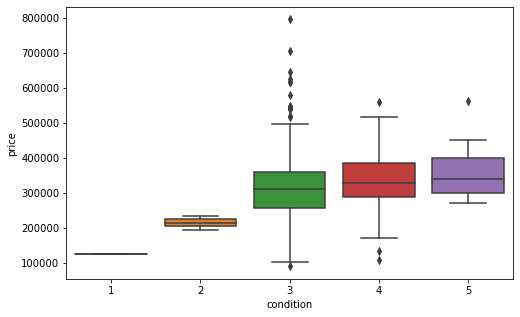

98106


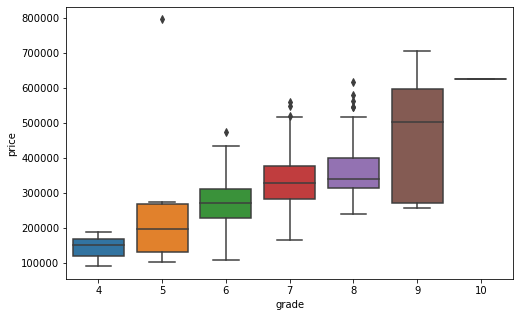

98106


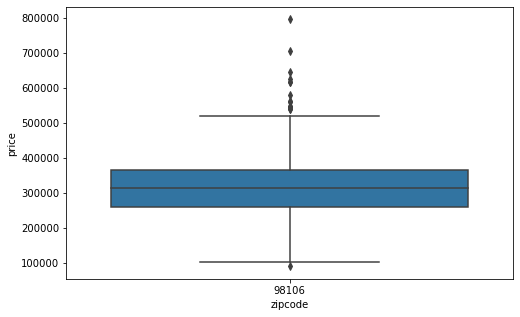

98072


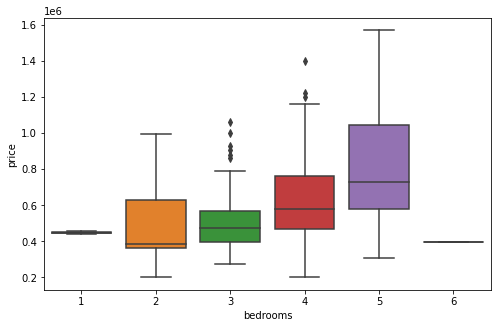

98072


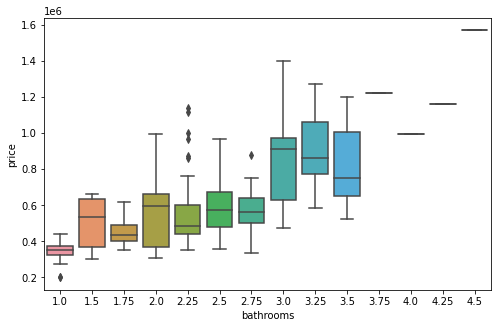

98072


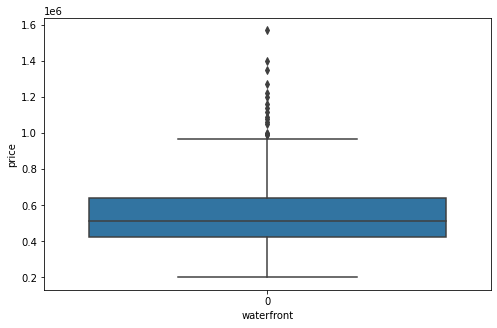

98072


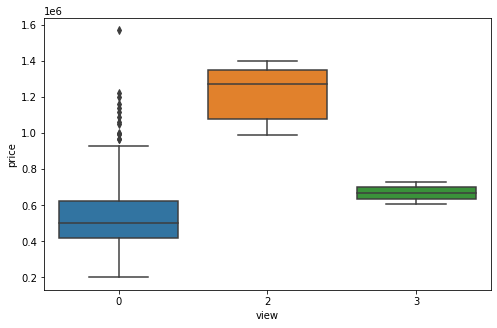

98072


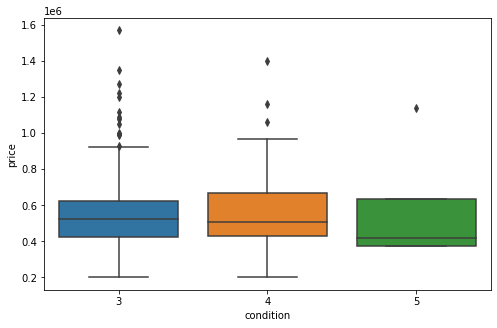

98072


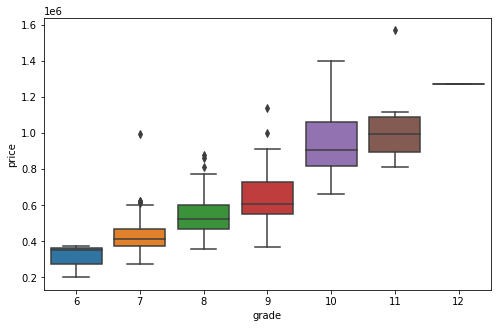

98072


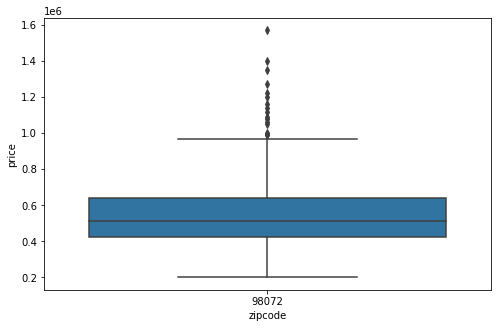

98188


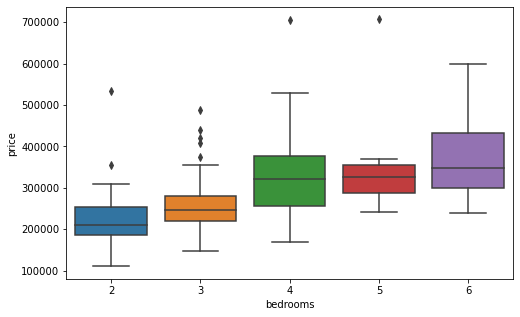

98188


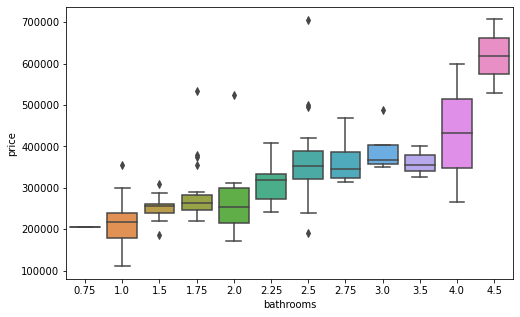

98188


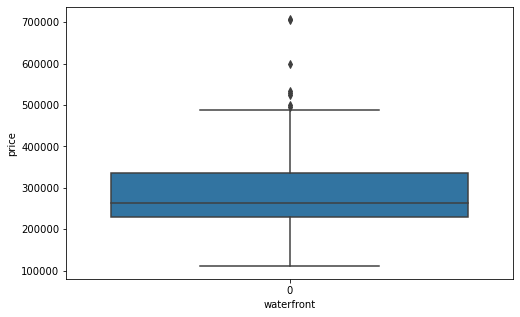

98188


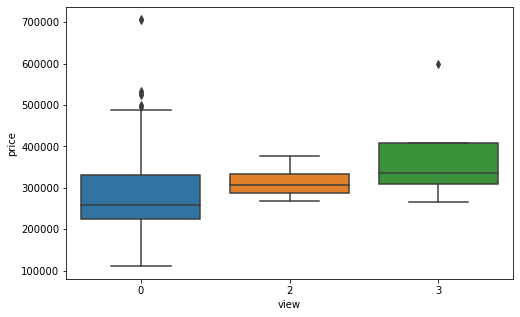

98188


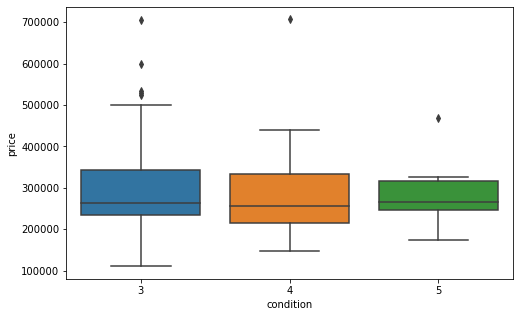

98188


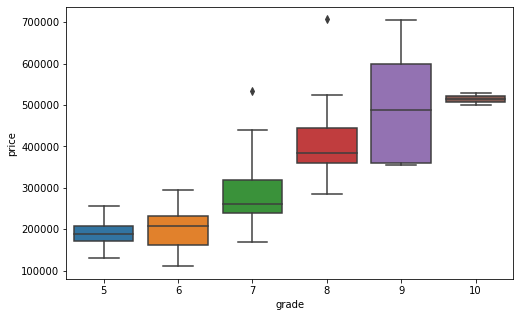

98188


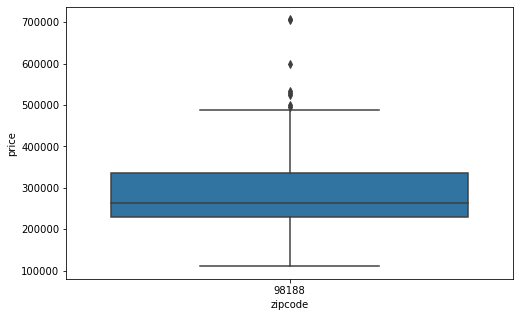

98014


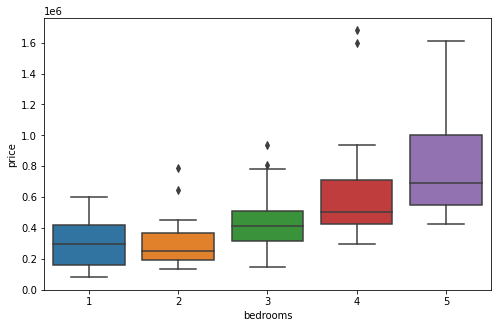

98014


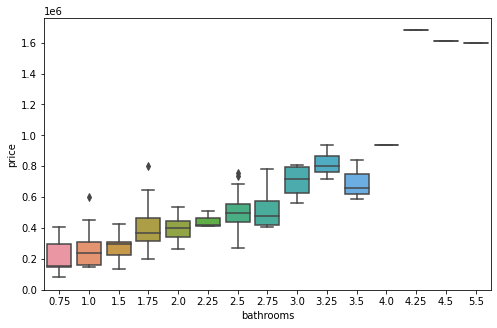

98014


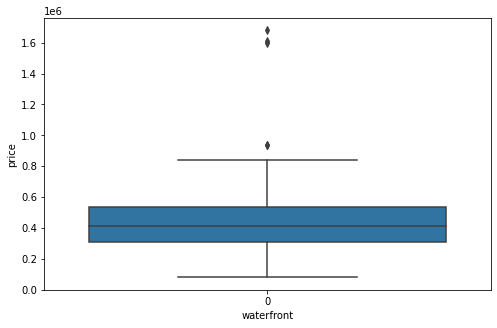

98014


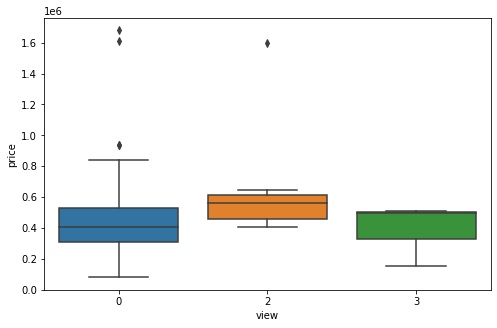

98014


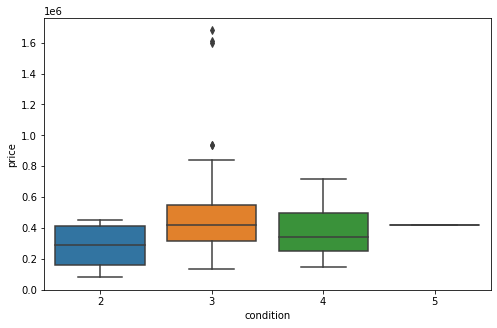

98014


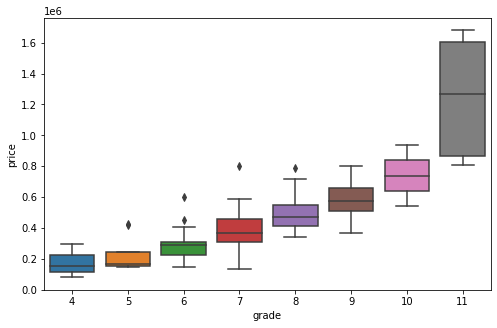

98014


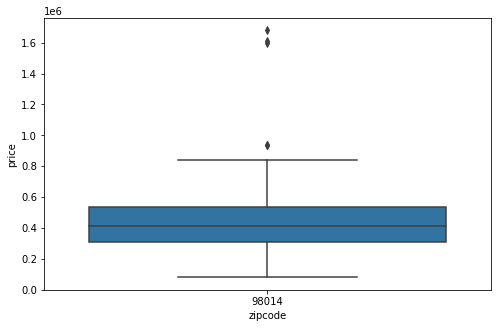

98055


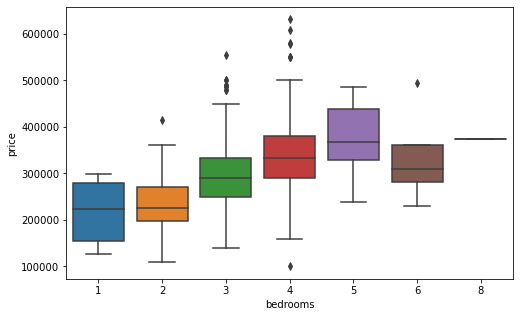

98055


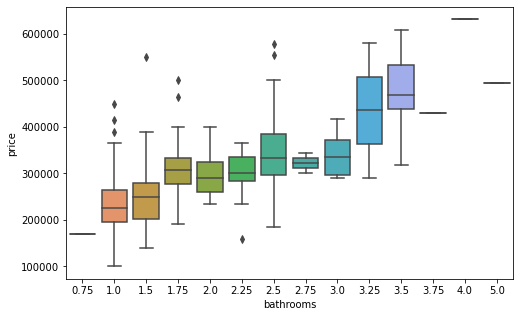

98055


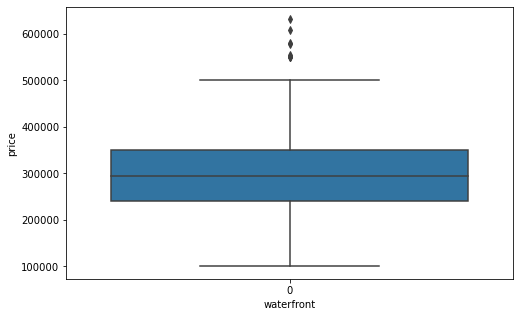

98055


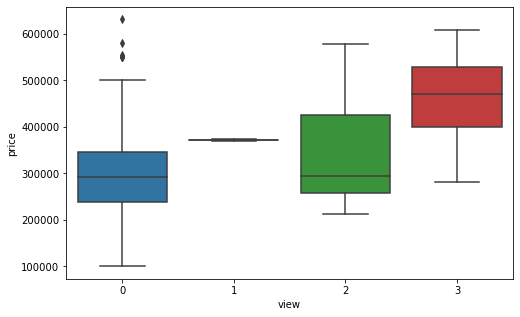

98055


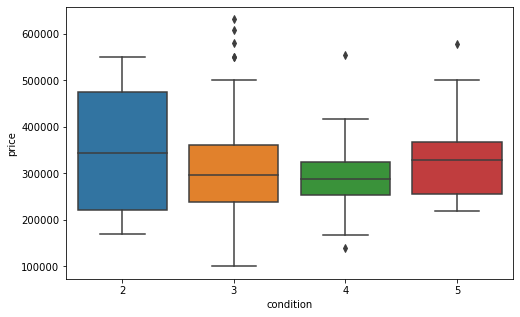

98055


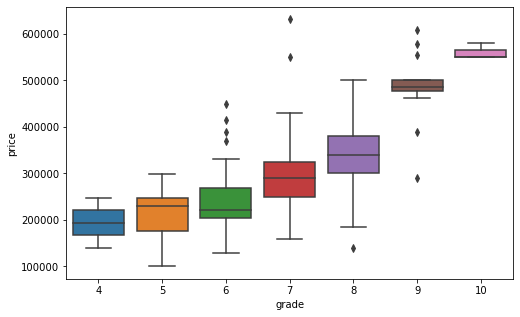

98055


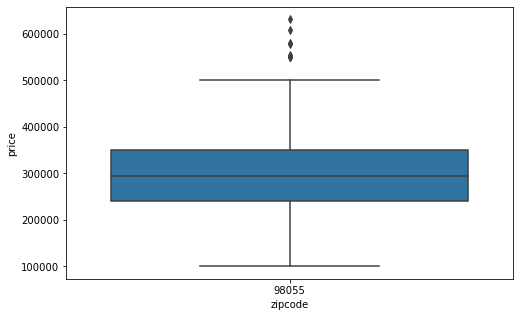

98039


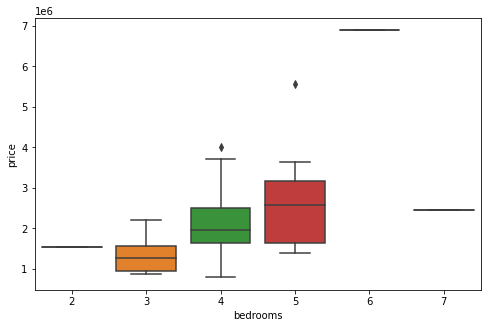

98039


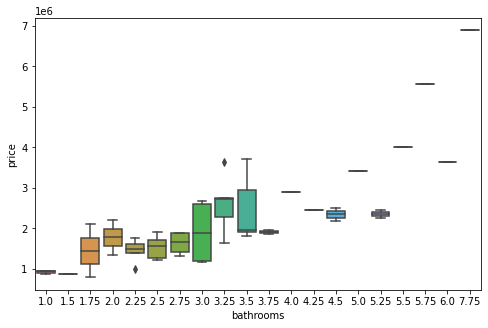

98039


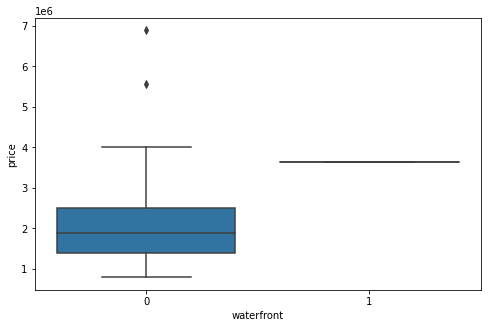

98039


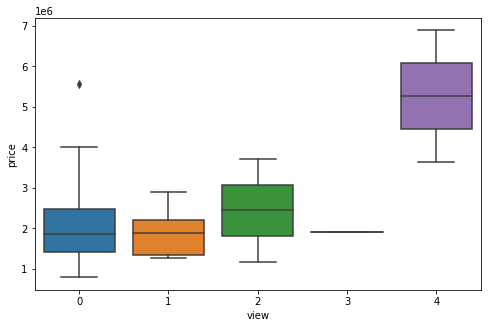

98039


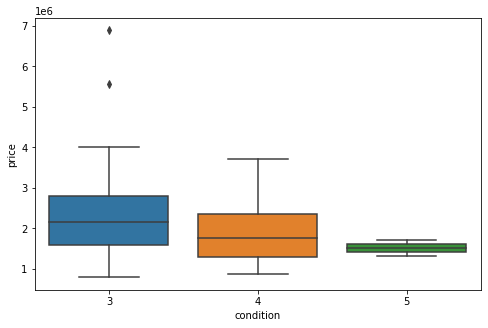

98039


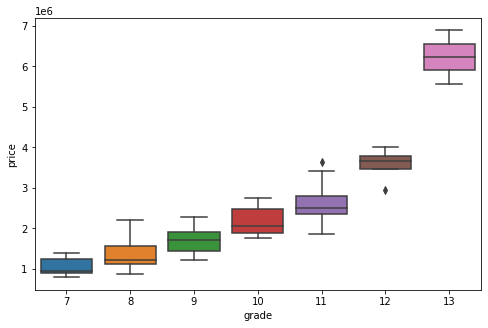

98039


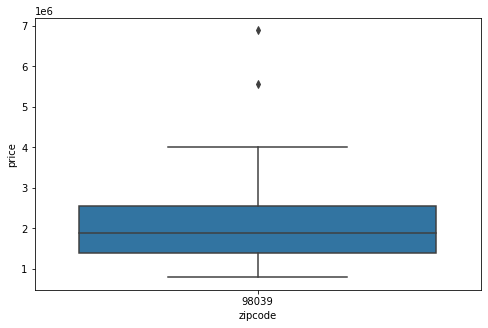

()

In [45]:
#checking data distribution for each zipcode
plotting(data,'price')

In [46]:
#I´m going to clean outliers by zipcode to preserve the very high differences between locations

In [47]:
def outl_cleaning(dataframe,target):
    
    Xf=dataframe.drop([target], axis=1)
    yf=dataframe[target]
    categorical = dataframe.select_dtypes(object)
    zipcodes = dataframe['zipcode'] 
    
    codes = dataframe['zipcode'].unique()
    exit = pd.DataFrame(columns=Xf.select_dtypes(include = np.number).columns)
    
    for zipc in codes:
        temp = Xf[Xf['zipcode'] == zipc]
        
        numerical = temp.select_dtypes(include = np.number)
        #print(numerical)
        for x in numerical.columns:
            q75,q25 = np.percentile(numerical.loc[:,x],[75,25])
            intr_qr = q75-q25
            max = q75+(1.5*intr_qr)
            min = q25-(1.5*intr_qr)
            numerical.loc[numerical[x] < min,x] = np.nan
            numerical.loc[numerical[x] > max,x] = np.nan

        exit = pd.concat([exit,numerical], axis =0)
        
    #print(exit)
    return(pd.concat([zipcodes,categorical,exit,yf], axis =1))

In [48]:
check = outl_cleaning(data,'price')

C:\Users\Kyre\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [49]:
print_nan(check)

           header  percentage_nulls
8          floors              2.36
9      sqft_above              2.98
10  sqft_basement              6.04
11  sqft_living15              2.08
12     sqft_lot15              8.82
13            age              3.32


()

In [50]:
check

zipcode bedrooms bathrooms waterfront view condition grade zipcode  \
0       98178        3       1.0          0    0         3     7   98178   
1       98125        3      2.25          0    0         3     7   98125   
2       98028        2       1.0          0    0         3     6   98028   
3       98136        4       3.0          0    0         5     7   98136   
4       98074        3       2.0          0    0         3     8   98074   
...       ...      ...       ...        ...  ...       ...   ...     ...   
21592   98103        3       2.5          0    0         3     8   98103   
21593   98146        4       2.5          0    0         3     8   98146   
21594   98144        2      0.75          0    0         3     7   98144   
21595   98027        3       2.5          0    0         3     8   98027   
21596   98144        2      0.75          0    0         3     7   98144   

       floors  sqft_above  sqft_basement  sqft_living15  sqft_lot15      age  \
0         1.0      1180.0            0.0         1340.0      5650.0  21835.0   
1         2.0      2170.0          400.0         1690.0      7639.0  23353.0   
2         1.0       770.0            0.0         2720.0      8062.0  30005.0   
3         1.0      1050.0          910.0         1360.0      5000.0  18239.0   
4         1.0      1680.0            0.0         1800.0      7503.0  10275.0   
...       ...         ...            ...            ...         ...      ...   
21592     3.0      1530.0            0.0         1530.0      1509.0   1966.0   
21593     2.0      2310.0            0.0         1830.0      7200.0      NaN   
21594     2.0      1020.0            0.0         1020.0      2007.0   1999.0   
21595     2.0      1600.0            0.0         1410.0      1287.0   4033.0   
21596     2.0      1020.0            0.0         1020.0      1357.0   2479.0   

        price  
0      221900  
1      538000  
2      180000  
3      604000  
4      510000  
...       ...  
21592  360000  
21593  400000  
21594  402101  
21595  400000  
21596  325000  

[21597 rows x 15 columns]

In [51]:
df = check.dropna()

In [52]:
print_nan(df)

Empty DataFrame
Columns: [header, percentage_nulls]
Index: []


()

In [53]:
df

zipcode bedrooms bathrooms waterfront view condition grade zipcode  \
0       98178        3       1.0          0    0         3     7   98178   
1       98125        3      2.25          0    0         3     7   98125   
2       98028        2       1.0          0    0         3     6   98028   
3       98136        4       3.0          0    0         5     7   98136   
4       98074        3       2.0          0    0         3     8   98074   
...       ...      ...       ...        ...  ...       ...   ...     ...   
21589   98056        4       2.5          0    0         3     9   98056   
21592   98103        3       2.5          0    0         3     8   98103   
21594   98144        2      0.75          0    0         3     7   98144   
21595   98027        3       2.5          0    0         3     8   98027   
21596   98144        2      0.75          0    0         3     7   98144   

       floors  sqft_above  sqft_basement  sqft_living15  sqft_lot15      age  \
0         1.0      1180.0            0.0         1340.0      5650.0  21835.0   
1         2.0      2170.0          400.0         1690.0      7639.0  23353.0   
2         1.0       770.0            0.0         2720.0      8062.0  30005.0   
3         1.0      1050.0          910.0         1360.0      5000.0  18239.0   
4         1.0      1680.0            0.0         1800.0      7503.0  10275.0   
...       ...         ...            ...            ...         ...      ...   
21589     2.0      2520.0            0.0         2520.0      6023.0    286.0   
21592     3.0      1530.0            0.0         1530.0      1509.0   1966.0   
21594     2.0      1020.0            0.0         1020.0      2007.0   1999.0   
21595     2.0      1600.0            0.0         1410.0      1287.0   4033.0   
21596     2.0      1020.0            0.0         1020.0      1357.0   2479.0   

        price  
0      221900  
1      538000  
2      180000  
3      604000  
4      510000  
...       ...  
21589  610685  
21592  360000  
21594  402101  
21595  400000  
21596  325000  

[17320 rows x 15 columns]

R2: 0.8468129650954336


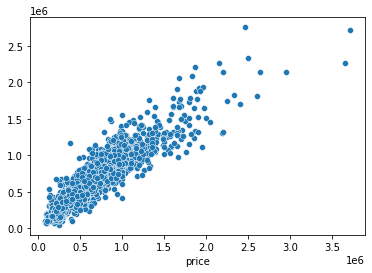

The mean absolute error of the model in the test set is: 75131.86
The mean squared error of the model in the test set is: 12991588028.64
The root mean squared error of the model in the test set is: 113980.65
R2: 0.8468129650954336


In [54]:
modelx =  linear(df,'price',0.3,32)

The mean absolute error of the model in the test set is: 76929.96
The mean squared error of the model in the test set is: 14791377327.59
The root mean squared error of the model in the test set is: 121619.81
R2: 0.8522223791949969


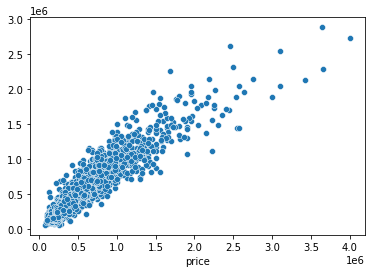

MLPRegressor(hidden_layer_sizes=(6, 2), max_iter=10000, random_state=1)

In [55]:
neuro(df,'price',0.3,semilla)

The mean absolute error of the model in the test set is: 77445.80
The mean squared error of the model in the test set is: 19860389614.45
The root mean squared error of the model in the test set is: 140926.89
R2: 0.8015789158450776


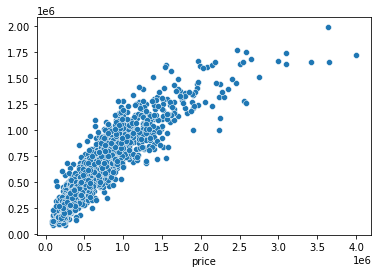

HuberRegressor(max_iter=10000)

In [59]:
Huber(df,'price',0.3,semilla)

The mean absolute error of the model in the test set is: 84908.18
The mean squared error of the model in the test set is: 21759545092.52
The root mean squared error of the model in the test set is: 147511.17
R2: 0.7826048425135506


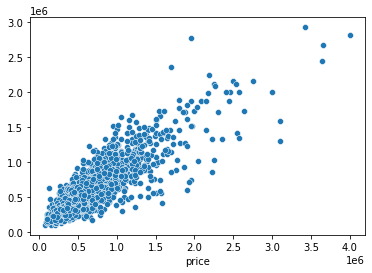

KNeighborsRegressor(n_neighbors=3)

In [60]:
KNN(df,'price',0.3,semilla)

In [61]:
df2 = data[ (data['price'] < 2000000) & (data['sqft_living15'] < 5000) & (data['sqft_basement'] < 2000) & (data['sqft_above'] < 6000)]

In [62]:
df2


bedrooms bathrooms  floors waterfront view condition grade  sqft_above  \
0            3       1.0     1.0          0    0         3     7        1180   
1            3      2.25     2.0          0    0         3     7        2170   
2            2       1.0     1.0          0    0         3     6         770   
3            4       3.0     1.0          0    0         5     7        1050   
4            3       2.0     1.0          0    0         3     8        1680   
...        ...       ...     ...        ...  ...       ...   ...         ...   
21592        3       2.5     3.0          0    0         3     8        1530   
21593        4       2.5     2.0          0    0         3     8        2310   
21594        2      0.75     2.0          0    0         3     7        1020   
21595        3       2.5     2.0          0    0         3     8        1600   
21596        2      0.75     2.0          0    0         3     7        1020   

       sqft_basement zipcode  sqft_living15  sqft_lot15   price    age  
0                  0   98178           1340        5650  221900  21835  
1                400   98125           1690        7639  538000  23353  
2                  0   98028           2720        8062  180000  30005  
3                910   98136           1360        5000  604000  18239  
4                  0   98074           1800        7503  510000  10275  
...              ...     ...            ...         ...     ...    ...  
21592              0   98103           1530        1509  360000   1966  
21593              0   98146           1830        7200  400000    418  
21594              0   98144           1020        2007  402101   1999  
21595              0   98027           1410        1287  400000   4033  
21596              0   98144           1020        1357  325000   2479  

[21301 rows x 14 columns]

R2: 0.841242410483973


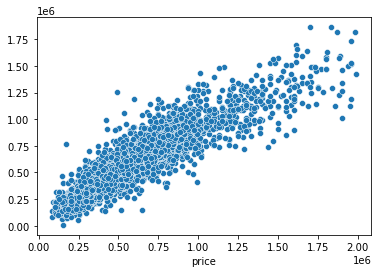

The mean absolute error of the model in the test set is: 75399.65
The mean squared error of the model in the test set is: 12380926606.67
The root mean squared error of the model in the test set is: 111269.61
R2: 0.841242410483973


0.841242410483973

In [63]:
linear(df2,'price',0.3,34)

The mean absolute error of the model in the test set is: 68602.91
The mean squared error of the model in the test set is: 10408162752.32
The root mean squared error of the model in the test set is: 102020.40
R2: 0.8707073466386417


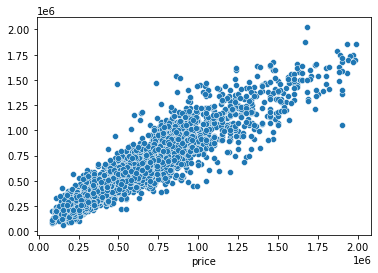

MLPRegressor(hidden_layer_sizes=(6, 2), max_iter=10000, random_state=1)

In [64]:
neuro(df2,'price',0.3,semilla)

The mean absolute error of the model in the test set is: 101318.84
The mean squared error of the model in the test set is: 25541674639.16
The root mean squared error of the model in the test set is: 159817.63
R2: 0.6827152914518534


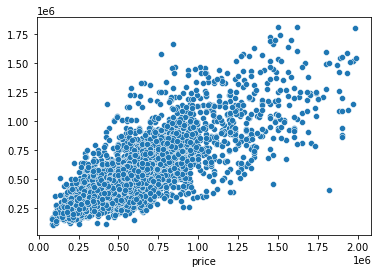

KNeighborsRegressor(n_neighbors=3)

In [65]:
KNN(df2,'price',0.3,semilla)

Exporting best model data for tableau exploration

In [66]:
Xf=data.drop(['price'], axis=1)
yf=data['price']
Xf_num=normaizer(Xf.select_dtypes(include = np.number))
Xf_cat = pd.get_dummies(Xf.select_dtypes(include = 'object'), drop_first=True)
Xf=pd.concat([Xf_num, Xf_cat], axis=1) 

    




predictions = model_ne.predict(Xf)


In [67]:
predictions

array([230244.78985106, 519763.50480419, 301890.69064422, ...,
       329490.74768809, 438952.97922501, 329598.11321122])

In [68]:
out = data.copy()

In [69]:
out['predicted'] = predictions

In [70]:
out

bedrooms bathrooms  floors waterfront view condition grade  sqft_above  \
0            3       1.0     1.0          0    0         3     7        1180   
1            3      2.25     2.0          0    0         3     7        2170   
2            2       1.0     1.0          0    0         3     6         770   
3            4       3.0     1.0          0    0         5     7        1050   
4            3       2.0     1.0          0    0         3     8        1680   
...        ...       ...     ...        ...  ...       ...   ...         ...   
21592        3       2.5     3.0          0    0         3     8        1530   
21593        4       2.5     2.0          0    0         3     8        2310   
21594        2      0.75     2.0          0    0         3     7        1020   
21595        3       2.5     2.0          0    0         3     8        1600   
21596        2      0.75     2.0          0    0         3     7        1020   

       sqft_basement zipcode  sqft_living15  sqft_lot15   price    age  \
0                  0   98178           1340        5650  221900  21835   
1                400   98125           1690        7639  538000  23353   
2                  0   98028           2720        8062  180000  30005   
3                910   98136           1360        5000  604000  18239   
4                  0   98074           1800        7503  510000  10275   
...              ...     ...            ...         ...     ...    ...   
21592              0   98103           1530        1509  360000   1966   
21593              0   98146           1830        7200  400000    418   
21594              0   98144           1020        2007  402101   1999   
21595              0   98027           1410        1287  400000   4033   
21596              0   98144           1020        1357  325000   2479   

           predicted  
0      230244.789851  
1      519763.504804  
2      301890.690644  
3      531328.990068  
4      505654.539021  
...              ...  
21592  520320.352077  
21593  457694.061917  
21594  329490.747688  
21595  438952.979225  
21596  329598.113211  

[21597 rows x 15 columns]

In [71]:
Xf

floors  sqft_above  sqft_basement  sqft_living15  sqft_lot15       age  \
0         0.0    0.089602       0.000000       0.161934    0.005742  0.520798   
1         0.4    0.199115       0.082988       0.222165    0.008027  0.556634   
2         0.0    0.044248       0.000000       0.399415    0.008513  0.713669   
3         0.0    0.075221       0.188797       0.165376    0.004996  0.435907   
4         0.0    0.144912       0.000000       0.241094    0.007871  0.247899   
...       ...         ...            ...            ...         ...       ...   
21592     0.8    0.128319       0.000000       0.194631    0.000986  0.051747   
21593     0.4    0.214602       0.000000       0.246257    0.007523  0.015203   
21594     0.4    0.071903       0.000000       0.106866    0.001558  0.052526   
21595     0.4    0.136062       0.000000       0.173980    0.000731  0.100543   
21596     0.4    0.071903       0.000000       0.106866    0.000811  0.063857   

       bedrooms_2  bedrooms_3  bedrooms_4  bedrooms_5  ...  zipcode_98146  \
0               0           1           0           0  ...              0   
1               0           1           0           0  ...              0   
2               1           0           0           0  ...              0   
3               0           0           1           0  ...              0   
4               0           1           0           0  ...              0   
...           ...         ...         ...         ...  ...            ...   
21592           0           1           0           0  ...              0   
21593           0           0           1           0  ...              1   
21594           1           0           0           0  ...              0   
21595           0           1           0           0  ...              0   
21596           1           0           0           0  ...              0   

       zipcode_98148  zipcode_98155  zipcode_98166  zipcode_98168  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
21592              0              0              0              0   
21593              0              0              0              0   
21594              0              0              0              0   
21595              0              0              0              0   
21596              0              0              0              0   

       zipcode_98177  zipcode_98178  zipcode_98188  zipcode_98198  \
0                  0              1              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
21592              0              0              0              0   
21593              0              0              0              0   
21594              0              0              0              0   
21595              0              0              0              0   
21596              0              0              0              0   

       zipcode_98199  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
21592              0  
21593              0  
21594              0  
21595              0  
21596              0  

[21597 rows x 133 columns]

In [74]:
#predicting value for properties renovated an in perfect condition after inversion
Xf['condition_2'] = Xf.apply(lambda x: 0,axis = 1)
Xf['condition_3'] = Xf.apply(lambda x: 0,axis = 1)
Xf['condition_4'] = Xf.apply(lambda x: 0,axis = 1)
Xf['condition_5'] = Xf.apply(lambda x: 1,axis = 1)

Xf['grade_4'] = Xf.apply(lambda x: 0,axis = 1)
Xf['grade_5'] = Xf.apply(lambda x: 0,axis = 1)
Xf['grade_6'] = Xf.apply(lambda x: 0,axis = 1)
Xf['grade_7'] = Xf.apply(lambda x: 0,axis = 1)
Xf['grade_8'] = Xf.apply(lambda x: 0,axis = 1)
Xf['grade_9'] = Xf.apply(lambda x: 0,axis = 1)
Xf['grade_10'] = Xf.apply(lambda x: 0,axis = 1)
Xf['grade_11'] = Xf.apply(lambda x: 0,axis = 1)
Xf['grade_12'] = Xf.apply(lambda x: 0,axis = 1)
Xf['grade_13'] = Xf.apply(lambda x: 1,axis = 1)


In [76]:
check_dtypes(Xf)

float64   0.0   floors
float64   0.08960176991150443   sqft_above
float64   0.0   sqft_basement
float64   0.16193426260540356   sqft_living15
float64   0.005742353388493927   sqft_lot15
float64   0.5207979225684607   age
uint8   0.0   bedrooms_2
uint8   1.0   bedrooms_3
uint8   0.0   bedrooms_4
uint8   0.0   bedrooms_5
uint8   0.0   bedrooms_6
uint8   0.0   bedrooms_7
uint8   0.0   bedrooms_8
uint8   0.0   bedrooms_9
uint8   0.0   bedrooms_10
uint8   0.0   bedrooms_11
uint8   0.0   bedrooms_33
uint8   0.0   bathrooms_0.75
uint8   1.0   bathrooms_1.0
uint8   0.0   bathrooms_1.25
uint8   0.0   bathrooms_1.5
uint8   0.0   bathrooms_1.75
uint8   0.0   bathrooms_2.0
uint8   0.0   bathrooms_2.25
uint8   0.0   bathrooms_2.5
uint8   0.0   bathrooms_2.75
uint8   0.0   bathrooms_3.0
uint8   0.0   bathrooms_3.25
uint8   0.0   bathrooms_3.5
uint8   0.0   bathrooms_3.75
uint8   0.0   bathrooms_4.0
uint8   0.0   bathrooms_4.25
uint8   0.0   bathrooms_4.5
uint8   0.0   bathrooms_4.75
uint8   0.0   ba

()

In [77]:
predictions = model_ne.predict(Xf)

In [78]:
predictions

array([1198224.46377013, 1673161.23903375, 1297276.87301929, ...,
       1632506.8455054 , 1353889.93026058, 1633522.42607263])

In [79]:
out['expected'] = predictions

In [80]:
out

bedrooms bathrooms  floors waterfront view condition grade  sqft_above  \
0            3       1.0     1.0          0    0         3     7        1180   
1            3      2.25     2.0          0    0         3     7        2170   
2            2       1.0     1.0          0    0         3     6         770   
3            4       3.0     1.0          0    0         5     7        1050   
4            3       2.0     1.0          0    0         3     8        1680   
...        ...       ...     ...        ...  ...       ...   ...         ...   
21592        3       2.5     3.0          0    0         3     8        1530   
21593        4       2.5     2.0          0    0         3     8        2310   
21594        2      0.75     2.0          0    0         3     7        1020   
21595        3       2.5     2.0          0    0         3     8        1600   
21596        2      0.75     2.0          0    0         3     7        1020   

       sqft_basement zipcode  sqft_living15  sqft_lot15   price    age  \
0                  0   98178           1340        5650  221900  21835   
1                400   98125           1690        7639  538000  23353   
2                  0   98028           2720        8062  180000  30005   
3                910   98136           1360        5000  604000  18239   
4                  0   98074           1800        7503  510000  10275   
...              ...     ...            ...         ...     ...    ...   
21592              0   98103           1530        1509  360000   1966   
21593              0   98146           1830        7200  400000    418   
21594              0   98144           1020        2007  402101   1999   
21595              0   98027           1410        1287  400000   4033   
21596              0   98144           1020        1357  325000   2479   

           predicted      expected  
0      230244.789851  1.198224e+06  
1      519763.504804  1.673161e+06  
2      301890.690644  1.297277e+06  
3      531328.990068  1.564972e+06  
4      505654.539021  1.469985e+06  
...              ...           ...  
21592  520320.352077  1.935265e+06  
21593  457694.061917  1.502960e+06  
21594  329490.747688  1.632507e+06  
21595  438952.979225  1.353890e+06  
21596  329598.113211  1.633522e+06  

[21597 rows x 16 columns]

In [81]:
check_dtypes(out)

object   3   bedrooms
object   1.0   bathrooms
float64   1.0   floors
object   0   waterfront
object   0   view
object   3   condition
object   7   grade
int64   1180   sqft_above
int64   0   sqft_basement
object   98178   zipcode
int64   1340   sqft_living15
int64   5650   sqft_lot15
int64   221900   price
int32   21835   age
float64   230244.78985105664   predicted
float64   1198224.4637701327   expected


()

In [82]:
out = out.astype({"predicted":'int', "expected":'int'}) 

In [93]:
out.to_csv('business.csv')